## 제주도 여행 계획의 A to Z - 데이터 기반 관광형태 분석

In [1]:
# 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq
!rm ~/.cache/matplotlib -rf

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 123576 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium
import matplotlib.font_manager as fm
from matplotlib import font_manager, rc

In [ ]:
print(pd.__version__)

2.0.3


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 데이터 분석

- 프로젝트 목표
제주도 내 관광지, 숙박시설, 식당 등의 현재 이용 현황 및 선호도 분석
관광객의 소비 행태, 검색량, 여행 계획 패턴의 분석을 통한 관광 트렌드 이해
무장애 관광지 및 마을 관광자원의 접근성과 이용 만족도 분석
데이터 기반의 맞춤형 마케팅 전략 및 지속 가능한 관광 개발 방안 제안
미래 관광 트렌드 예측 및 대응 전략 개발

- 데이터 분석 계획
데이터 수집 및 전처리: 제주 관광 관련 다양한 데이터(관광지 입장 정보, SNS 키워드, 소비 행태 등) 수집 및 전처리
탐색적 데이터 분석 (EDA): 다양한 관광지와 서비스에 대한 현황 및 추세 분석
세부 분석 및 인사이트 도출:
요일별 및 시간대별 관광지 검색량 및 방문객 분석
숙박시설 및 식당 선호도와 관광 소비 행태 분석
동반자 유형별 여행 계획 및 선호도 분석
무장애 관광지 및 마을 관광자원의 이용 현황 분석
예측 모델링: 미래 관광 트렌드 및 소비 패턴 예측
전략 개발 및 제안: 데이터 분석 결과를 기반으로 한 전략적 제안

## 현황분석

In [ ]:
# 데이터 생성
data = {
    "연도": [2020, 2021, 2022, 2023, 2024],
    "전체": [10236445, 12008437, 13889502, 13370529, 2067351],
    "내국인": [10023678, 11960159, 13803058, 12661179, 1857403],
    "외국인": [212767, 48278, 86444, 709350, 209948]
}

# 데이터프레임 생성
tourists_df = pd.DataFrame(data)

# 데이터프레임 출력
print(tourists_df)

In [ ]:
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

# 폰트 설정
plt.rc('font', family='NanumBarunGothic')

In [ ]:
# 그래프 설정
fig, ax1 = plt.subplots(figsize=(10, 5))

# 바 그래프(전체 관광객 수)
ax1.bar(tourists_df["연도"], tourists_df["전체"], color='skyblue', label='전체', alpha=0.6)

# 선 그래프 설정
ax2 = ax1.twinx()
ax2.plot(tourists_df["연도"], tourists_df["내국인"], color='orange', marker='o', label='내국인')
ax2.plot(tourists_df["연도"], tourists_df["외국인"], color='cyan', marker='o', label='외국인')

# x축 틱 설정
ax1.set_xticks(tourists_df["연도"])  # x축에 표시될 위치를 연도 데이터로 설정
ax1.set_xticklabels(tourists_df["연도"])  # 해당 위치에 연도 레이블을 설정

# 제목 및 레이블 설정
ax1.set_xlabel('연도')
ax1.set_ylabel('전체 관광객 수')
ax2.set_ylabel('내국인 및 외국인 관광객 수')

# 범례
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# 그래프 표시
plt.title('연도별 관광객 수')
plt.show()

## 제주 동반자 유형별 여행 계획 데이터

In [ ]:
Companion_type_df = pd.read_csv('/content/drive/MyDrive/Final_Project/제주/제주 동반자 유형별 여행 계획 데이터/제주 동반자 유형별 여행 계획 데이터2023.csv')

In [ ]:
Companion_type_df.head(10)
# 1	CL_NM	분류명	VARCHAR	200	N	N
# 2	PARTN_CO	상대수	DECIMAL	38	N	N
# 3	TOUR_PD	여행기간	DECIMAL	38	N	N
# 4	ALL_KWRD_CN	전체키워드내용	VARCHAR	4000	N	N
# 5	ALL_KWRD_CO	전체키워드수	DECIMAL	38	N	N
# 6	ALL_CNTNTS_CN	전체콘텐츠내용	VARCHAR	4000	N	N
# 7	ALL_CNTNTS_CO	전체콘텐츠수	DECIMAL	38	N	N
# 8	PLAN_YM	계획년월	VARCHAR	6	N	N
# 9	TOUR_BEGIN_YM	여행시작년월	VARCHAR	6	N	N

In [ ]:
Companion_type_df.rename(columns={'CL_NM':'동반자유형', 'PARTN_CO': '동반자수', 'TOUR_PD': '여행기간', 'ALL_KWRD_CN': '전체키워드내용', 'ALL_KWRD_CO': '전체키워드수',
                                   'ALL_CNTNTS_CN': '전체콘텐츠내용', 'ALL_CNTNTS_CO': '전체콘텐츠수', 'PLAN_YM': '계획년월', 'TOUR_BEGIN_YM': '여행시작년월'}, inplace = True)

In [ ]:
Companion_type_df.describe()

In [ ]:
Companion_type_df.info()

In [ ]:
Companion_type_df['동반자유형'] = Companion_type_df['동반자유형'].replace('혼자', '개인')

In [ ]:
Companion_type_df['동반자유형'].value_counts()

In [ ]:
Companion_type_df['조사기간'].value_counts()

In [ ]:
Companion_type_df.head()

### 동반자유형 구성 분석

In [ ]:
cl_nm_counts = Companion_type_df.groupby(['조사기간', '동반자유형']).count().reset_index()
cl_nm_counts = cl_nm_counts[['조사기간', '동반자유형', '동반자수']]
cl_nm_counts.rename(columns={'동반자수': '총합'}, inplace=True)
cl_nm_counts

In [ ]:
# 소수점 세 자리에서 반올림을 하여 백분율 형태로 '비율(%)' 컬럼을 업데이트하는 코드입니다.
# 먼저 각 '조사기간'에 대한 '총합'의 합계를 다시 계산합니다.
total_by_period = cl_nm_counts.groupby('조사기간')['총합'].transform('sum')

# 이제 각 행의 '총합'을 해당 기간의 총합으로 나누어 비율을 계산하고,
# 결과를 백분율로 변환한 후 소수점 세 자리에서 반올림합니다.
cl_nm_counts['비율(%)'] = ((cl_nm_counts['총합'] / total_by_period) * 100).round(3)

# 결과 확인을 위해 데이터프레임의 첫 5행을 출력합니다.
cl_nm_counts.head()


In [ ]:
cl_nm_counts['기간'] = cl_nm_counts['조사기간'].apply(lambda x: '상반기' if str(x)[-2:] in ['03', '06'] else '하반기')
cl_nm_counts.tail()

In [ ]:
cl_nm_counts = cl_nm_counts.groupby(['기간', '동반자유형'])['비율(%)'].mean().reset_index()
cl_nm_counts.head()

In [ ]:
# cl_nm_counts.to_csv('/content/drive/MyDrive/Final_Project/제주/streamlit/cl_nm_counts.csv', index = False)

In [ ]:
# 조사기간을 YYYYMM에서 "YYYY년 M월" 형태로 변환하는 함수 정의
def format_period(period):
    year, month = divmod(period, 100)
    return f"{year}년 {month}월"

# 그래프 객체 생성
fig = go.Figure()

# 조사기간 별로 각각의 트레이스 추가
for 조사기간 in cl_nm_counts['조사기간'].unique():
    filtered_df = cl_nm_counts[cl_nm_counts['조사기간'] == 조사기간]
    fig.add_trace(
        go.Bar(
            visible=False,
            name=f"조사기간: {format_period(조사기간)}",
            x=filtered_df['동반자유형'],
            y=filtered_df['비율(%)'],
            marker_color='skyblue'  # 막대 색상을 하늘색으로 설정
        )
    )

# 첫 번째 트레이스를 보이게 설정
fig.data[0].visible = True

# 슬라이더 생성
steps = []
for i, 조사기간 in enumerate(cl_nm_counts['조사기간'].unique()):
    step = dict(
        method="update",
        args=[{"visible": [False] * len(fig.data)},
              {"title": f"조사기간: {format_period(조사기간)}"}],  # layout attribute
        label=format_period(조사기간)  # 슬라이더 레이블을 "YYYY년 M월" 형태로 설정
    )
    step["args"][0]["visible"][i] = True  # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active=0,
    currentvalue={"prefix": "조사기간 선택: "},
    pad={"t": 50},
    steps=steps
)]

# 자료 출처 추가
annotations = [dict(
    showarrow=False,
    xref="paper",
    yref="paper",
    x=0,
    y=-0.1,
    xanchor="left",
    yanchor="top",
    font=dict(size=12)
)]

# Y축 타이틀 추가 및 배경색 설정
fig.update_layout(
    yaxis_title='비율(%)',
    sliders=sliders,
    title="조사기간별 동반자유형 분석",
    annotations=annotations,
    plot_bgcolor='white',  # 그래프 배경색을 흰색으로 설정
    paper_bgcolor='white'  # 전체 배경색을 흰색으로 설정
)

fig.show()

In [ ]:
fig = go.Figure()

# 기간별로 각각의 트레이스 추가
for period in cl_nm_counts['기간'].unique():
    filtered_df = cl_nm_counts[cl_nm_counts['기간'] == period]
    fig.add_trace(
        go.Bar(
            visible=False,
            name=f"기간: {period}",
            x=filtered_df['동반자유형'],
            y=filtered_df['비율(%)'],
            marker_color='skyblue'
        )
    )

# 첫 번째 트레이스를 보이게 설정
fig.data[0].visible = True

# 슬라이더 생성
steps = []
for i, period in enumerate(cl_nm_counts['기간'].unique()):
    step = dict(
        method="update",
        args=[{"visible": [False] * len(fig.data)},
              {"title": f"기간: {period}"}],
        label=period
    )
    step["args"][0]["visible"][i] = True  # 해당 기간만 보이게 설정
    steps.append(step)

sliders = [dict(
    active=0,
    currentvalue={"prefix": "기간 선택: "},
    pad={"t": 50},
    steps=steps
)]

# Y축 타이틀 추가 및 배경색 설정
fig.update_layout(
    yaxis_title='비율(%)',
    sliders=sliders,
    title="기간별 동반자유형 분석",
    plot_bgcolor='white',
    paper_bgcolor='white'
)

fig.show()

### 동반자유형별 활동 및 관광지 선호도 분석

In [ ]:
from collections import Counter

# 분석을 위한 데이터 준비
keywords_data = []

# 동반자 유형별로 전체콘텐츠내용 분석
for cl_nm in Companion_type_df['동반자유형'].unique():
    # 동반자 유형별 전체콘텐츠내용의 모든 콘텐츠를 추출
    all_keywords = Companion_type_df[Companion_type_df['동반자유형'] == cl_nm]['전체키워드내용'].str.cat(sep=',').split(',')
    # 카운터 생성
    keyword_counts = Counter(all_keywords)
    # 가장 많이 등장하는 키워드를 제외하고 5개 콘텐츠 추출
    top_keywords = keyword_counts.most_common(6)[1:6]
    # 데이터 저장
    for keyword, count in top_keywords:
        keywords_data.append({
            '동반자유형': cl_nm,
            '키워드': keyword.strip().lower(),
            '빈도': count
        })

# 추출된 데이터를 데이터프레임으로 변환
df_top_keywords = pd.DataFrame(keywords_data)

In [ ]:
df_top_keywords

In [ ]:
# df_top_keywords.to_csv('/content/drive/MyDrive/Final_Project/제주/streamlit/df_top_keywords.csv', index = False)

In [ ]:
# fig = go.Figure()

# # 동반자 유형별로 바 차트 추가
# for cl_nm in df_top_keywords['동반자유형'].unique():
#     df_filtered = df_top_keywords[df_top_keywords['동반자유형'] == cl_nm]

#     # 키워드 리스트와 빈도수 리스트 생성
#     keywords = df_filtered['키워드'].tolist()
#     frequencies = df_filtered['빈도'].tolist()

#     # 키워드와 빈도수로 바 차트 생성
#     fig.add_trace(
#         go.Bar(
#             x=keywords,
#             y=frequencies,
#             name=cl_nm,
#             visible=(cl_nm == df_top_keywords['동반자유형'].unique()[0])  # 첫 번째 동반자 유형만 초기에 보이도록 설정
#         )
#     )

# # 각 동반자 유형에 대한 슬라이더 스텝을 생성
# steps = []
# for i, cl_nm in enumerate(df_top_keywords['동반자유형'].unique()):
#     step = dict(
#         method='update',
#         args=[{'visible': [cl_nm == val for val in df_top_keywords['동반자유형'].unique()]},
#               {'title': f'동반자 유형: {cl_nm}'}],  # layout attribute
#         label=cl_nm
#     )
#     steps.append(step)

# # 슬라이더 추가
# sliders = [dict(
#     active=0,
#     currentvalue={'prefix': '동반자 유형: '},
#     steps=steps
# )]

# fig.update_layout(
#     sliders=sliders,
#     title='동반자 유형별 상위 키워드 분석'
# )

# annotations = [dict(
#     text="자료 출처: 제주관광공사",  # 출처 정보를 실제 출처로 대체하세요.
#     showarrow=False,
#     xref="paper",
#     yref="paper",
#     x=0,
#     y=-0.1,
#     xanchor="left",
#     yanchor="top",
#     font=dict(size=12)
# )]

# fig.update_layout(sliders=sliders, title="조사기간별 동반자유형 분석", annotations=annotations)
# fig.show()

In [ ]:
fig = go.Figure()

# 동반자 유형별로 파이 차트 추가
for i, cl_nm in enumerate(df_top_keywords['동반자유형'].unique()):
    df_filtered = df_top_keywords[df_top_keywords['동반자유형'] == cl_nm]
    keywords = df_filtered['키워드'].tolist()
    frequencies = df_filtered['빈도'].tolist()

    fig.add_trace(
        go.Pie(
            labels=keywords,
            values=frequencies,
            name=cl_nm,
            visible=(i == 0)  # 첫 번째 동반자 유형만 초기에 보이도록 설정
        )
    )

# 슬라이더와 스텝 추가 (바 차트의 슬라이더 코드와 유사)
steps = []
for i, cl_nm in enumerate(df_top_keywords['동반자유형'].unique()):
    step = dict(
        method='update',
        args=[{'visible': [(j == i) for j in range(len(df_top_keywords['동반자유형'].unique()))]},
              {'title': f'동반자 유형: {cl_nm}'}],
        label=cl_nm
    )
    steps.append(step)

fig.update_layout(
    sliders=[dict(
        active=0,
        currentvalue={'prefix': '동반자 유형: '},
        steps=steps
    )],
    annotations=[dict(
        text="자료 출처: 제주관광공사",
        showarrow=False,
        xref="paper",
        yref="paper",
        x=0.5,
        y=-0.2,
        xanchor="center",
        yanchor="top",
        font=dict(size=12)
    )],
    title="동반자 유형별 상위 키워드 분석"
)

fig.show()

In [ ]:
from collections import Counter

# 분석을 위한 데이터 준비
CNTNTS_data = []

# 동반자 유형별로 전체콘텐츠내용 분석
for cl_nm in Companion_type_df['동반자유형'].unique():
    # 동반자 유형별 전체콘텐츠내용의 모든 키워드를 추출
    all_CNTNTS = Companion_type_df[Companion_type_df['동반자유형'] == cl_nm]['전체콘텐츠내용'].str.cat(sep=',').split(',')
    # 카운터 생성
    CNTNTS_counts = Counter(all_CNTNTS)
    # 가장 많이 등장하는 키워드를 제외하고 5개 키워드 추출
    top_CNTNTS = CNTNTS_counts.most_common(6)[1:6]
    # 데이터 저장
    for CNTNTS, count in top_CNTNTS:
        CNTNTS_data.append({
            '동반자유형': cl_nm,
            '콘텐츠': CNTNTS.strip().lower(),
            '빈도': count
        })

# 추출된 데이터를 데이터프레임으로 변환
df_top_CNTNTSs = pd.DataFrame(CNTNTS_data)

In [ ]:
df_top_CNTNTSs

In [ ]:
df_top_CNTNTSs.to_csv('/content/drive/MyDrive/Final_Project/제주/streamlit/df_top_CNTNTSs.csv', index = False)

In [ ]:
# fig = go.Figure()

# # 동반자 유형별로 바 차트 추가
# for cl_nm in df_top_CNTNTSs['동반자유형'].unique():
#     df_filtered = df_top_CNTNTSs[df_top_CNTNTSs['동반자유형'] == cl_nm]

#     # 키워드 리스트와 빈도수 리스트 생성
#     keywords = df_filtered['콘텐츠'].tolist()
#     frequencies = df_filtered['빈도'].tolist()

#     # 키워드와 빈도수로 바 차트 생성
#     fig.add_trace(
#         go.Bar(
#             x=keywords,
#             y=frequencies,
#             name=cl_nm,
#             visible=(cl_nm == df_top_CNTNTSs['동반자유형'].unique()[0])  # 첫 번째 동반자 유형만 초기에 보이도록 설정
#         )
#     )

# # 각 동반자 유형에 대한 슬라이더 스텝을 생성
# steps = []
# for i, cl_nm in enumerate(df_top_CNTNTSs['동반자유형'].unique()):
#     step = dict(
#         method='update',
#         args=[{'visible': [cl_nm == val for val in df_top_CNTNTSs['동반자유형'].unique()]},
#               {'title': f'동반자 유형: {cl_nm}'}],  # layout attribute
#         label=cl_nm
#     )
#     steps.append(step)

# # 슬라이더 추가
# sliders = [dict(
#     active=0,
#     currentvalue={'prefix': '동반자 유형: '},
#     steps=steps
# )]

# fig.update_layout(
#     sliders=sliders,
#     title='동반자 유형별 상위 콘텐츠 분석'
# )

# annotations = [dict(
#     text="자료 출처: 제주관광공사",  # 출처 정보를 실제 출처로 대체하세요.
#     showarrow=False,
#     xref="paper",
#     yref="paper",
#     x=0,
#     y=-0.1,
#     xanchor="left",
#     yanchor="top",
#     font=dict(size=12)
# )]

# fig.update_layout(sliders=sliders, title="조사기간별 동반자유형 분석", annotations=annotations)
# fig.show()

In [ ]:
fig = go.Figure()

# 동반자 유형별로 파이 차트 추가
for i, cl_nm in enumerate(df_top_CNTNTSs['동반자유형'].unique()):
    df_filtered = df_top_CNTNTSs[df_top_CNTNTSs['동반자유형'] == cl_nm]
    keywords = df_filtered['콘텐츠'].tolist()
    frequencies = df_filtered['빈도'].tolist()

    fig.add_trace(
        go.Pie(
            labels=keywords,
            values=frequencies,
            name=cl_nm,
            visible=(i == 0)  # 첫 번째 동반자 유형만 초기에 보이도록 설정
        )
    )

# 슬라이더와 스텝 추가
steps = []
for i, cl_nm in enumerate(df_top_CNTNTSs['동반자유형'].unique()):
    step = dict(
        method='update',
        args=[{'visible': [(j == i) for j in range(len(df_top_CNTNTSs['동반자유형'].unique()))]},
              {'title': f'동반자 유형: {cl_nm}'}],
        label=cl_nm
    )
    steps.append(step)

fig.update_layout(
    sliders=[dict(
        active=0,
        currentvalue={'prefix': '동반자 유형: '},
        steps=steps
    )],
    annotations=[dict(
        text="자료 출처: 제주관광공사",
        showarrow=False,
        xref="paper",
        yref="paper",
        x=0.5,
        y=-0.2,
        xanchor="center",
        yanchor="top",
        font=dict(size=12)
    )],
    title="동반자 유형별 상위 키워드 분석"
)

In [ ]:
import pandas as pd

# 데이터 딕셔너리 생성
data = {
    '년도': [2019, 2019, 2019, 2019, 2019,
           2020, 2020, 2020, 2020, 2020,
           2021, 2021, 2021, 2021, 2021,
           2022, 2022, 2022, 2022, 2022,
           2023, 2023, 2023, 2023, 2023],
    '숙박시설': ['펜션', '호텔', '리조트', '게스트하우스', '기타',
             '펜션', '호텔', '리조트', '게스트하우스', '기타',
             '펜션', '호텔', '리조트', '게스트하우스', '기타',
             '펜션', '호텔', '리조트', '게스트하우스', '기타',
             '펜션', '호텔', '리조트', '게스트하우스', '기타'],
    '비율': [18.5, 50.5, 20.0, 5.4, 5.8,
           14.7, 53.5, 13.3, 6.3, 12.2,
           14.9, 53.7, 14.2, 5.8, 11.3,
           15.7, 56.7, 14.8, 5.8, 7.0,
           14.4, 60.2, 17.2, 3.9, 4.3
           ]
}

# 데이터 프레임 생성
df = pd.DataFrame(data)

# 데이터 프레임 출력
df.head()

In [ ]:
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rcParams['font.family'] = font_name

In [ ]:
fig = px.line(df, x='년도', y='비율', color='숙박시설', markers=True,
              labels={
                  "년도": "년도",
                  "비율": "비율 (%)",
                  "숙박시설": "숙박시설"
              },
              title='년도별 숙박시설 비율 변화')

# 그래프의 레이아웃을 설정합니다.
fig.update_layout(
    xaxis_title='년도',
    yaxis_title='비율 (%)',
    legend_title='숙박시설',
    plot_bgcolor='white',
    xaxis=dict(showgrid=True, gridwidth=1, gridcolor='LightGrey'),
    yaxis=dict(showgrid=False)
)

# 그래프를 보여줍니다.
fig.show()

In [ ]:
# 데이터프레임 df를 사용하여 Plotly 라인 그래프를 생성합니다.
fig = px.line(df, x='년도', y='비율', color='숙박시설', markers=True,
              labels={
                  "년도": "년도",
                  "비율": "비율 (%)",
                  "숙박시설": "숙박시설"
              },
              title='년도별 숙박시설 비율 변화')

# 그래프의 레이아웃을 설정합니다.
fig.update_layout(
    xaxis_title='년도',
    yaxis_title='비율 (%)',
    plot_bgcolor='white',
    xaxis=dict(showgrid=False),  # X축 격자 제거
    yaxis=dict(showgrid=False),  # Y축 격자 제거
    legend_title='숙박시설',
    legend=dict(
        x=0.5,  # 범례를 가로축의 중앙에 배치
        y=-0.3, # 범례를 세로축 아래로 이동
        xanchor='center',  # 범례의 중앙이 x 위치에 맞춤
        yanchor='top',     # 범례의 위쪽이 y 위치에 맞춤
        orientation='h'    # 범례 항목을 수평으로 배열
    )
)

# 그래프를 보여줍니다.
fig.show()

## 제주 무장애 관광지 입장 데이터

In [ ]:
Free_tourist_df = pd.read_csv('/content/drive/MyDrive/Final_Project/제주/제주 무장애 관광지 입장 데이터/제주 무장애 관광지 입장 데이터2023.csv')

# 1	CL_NM	분류명	VARCHAR	200	N	N
# 2	TRRSRT_NM	관광지명	VARCHAR	200	N	N
# 3	ADDR	주소	VARCHAR	500	N	N
# 4	TEL_NO	전화번호	VARCHAR	20	N	N
# 5	ENTRN_FLAG_NM	입장구분명	VARCHAR	200	N	N
# 6	ENTRN_NMPR_CO	입장인원수	DECIMAL	38	N	N
# 7	ENTRN_DE	입장일자	VARCHAR	8	N	N

In [ ]:
Free_tourist_df.rename(columns = {'CL_NM': '분류명', 'TRRSRT_NM': '관광지명', 'ADDR': '주소', 'TEL_NO': '전화번호',
                                  'ENTRN_FLAG_NM': '입장구분명', 'ENTRN_NMPR_CO': '입장인원수', 'ENTRN_DE': '입장일자'},
                       inplace = True)

In [ ]:
Free_tourist_df.head()

In [ ]:
Free_tourist_df.info()

In [ ]:
Free_tourist_df['분류명'].value_counts()

In [ ]:
Free_tourist_df['입장구분명'].value_counts()

In [ ]:
Free_tourist_df['입장구분명'] = Free_tourist_df['입장구분명'].replace('[도외]65세이상', '무료경로')
Free_tourist_df['입장구분명'] = Free_tourist_df['입장구분명'].replace('[도외]장애인', '무료장애인')

In [ ]:
Free_tourist_df['입장구분명'].value_counts()

In [ ]:
Free_tourist_df['입장일자'] = pd.to_datetime(Free_tourist_df['입장일자'], format='%Y%m%d')
Free_tourist_df['입장일자']

In [ ]:
Free_tourist_df['월'] = Free_tourist_df['입장일자'].dt.month

In [ ]:
Free_tourist_df['년'] = Free_tourist_df['입장일자'].dt.year

In [ ]:
Free_tourist_df['방문기간'] = Free_tourist_df['입장일자'].astype(str).str[:7]

### 입장 인원 분석

In [ ]:
Sum_df = Free_tourist_df.groupby(['방문기간', '관광지명'])['입장인원수'].sum().reset_index()
Sum_df

In [ ]:
# Sum_df.to_csv('/content/drive/MyDrive/Final_Project/제주/streamlit/Sum_df.csv', index = False)

In [ ]:
# Plotly Express를 사용하여 '방문기간' 별로 각 '관광지명'에 대한 '입장인원수'를 라인 그래프로 그립니다.
fig = px.line(Sum_df, x='방문기간', y='입장인원수', color='관광지명',
              title='방문기간별 관광지 입장인원수',
              labels={'방문기간': '방문 기간', '입장인원수': '입장 인원수', '관광지명': '관광지 명'})

# 그래프 레이아웃 설정
fig.update_layout(
    xaxis_title='방문 기간',
    yaxis_title='입장 인원수',
    legend_title='관광지'
)

# 그래프 표시
fig.show()

### 대상 그룹 분석

In [ ]:
Free_tourist_df

In [ ]:
Group_df = Free_tourist_df.groupby(['입장구분명', '관광지명'])['입장인원수'].sum().reset_index()
Group_df

In [ ]:
Group_df = Free_tourist_df.groupby(['입장구분명', '관광지명'], as_index=False)['입장인원수'].sum()

sorted_group_df = Group_df.sort_values(by=['입장구분명', '입장인원수'], ascending=[True, False])

sorted_group_df.head()

In [ ]:
# sorted_group_df.to_csv('/content/drive/MyDrive/Final_Project/제주/streamlit/sorted_group_df.csv', index = False)

In [ ]:
fig = go.Figure()

unique_entry_types = sorted_group_df['입장구분명'].unique()

for entry_type in unique_entry_types:
    filtered_df = sorted_group_df[sorted_group_df['입장구분명'] == entry_type]
    fig.add_trace(
        go.Bar(
            x=filtered_df['관광지명'],
            y=filtered_df['입장인원수'],
            name=entry_type,
            visible=False
        )
    )


buttons = []
for i, entry_type in enumerate(unique_entry_types):
    visibility = [False] * len(unique_entry_types)
    visibility[i] = True
    buttons.append(
        dict(
            label=entry_type,
            method="update",
            args=[{"visible": visibility},
                  {"title": f"{entry_type} - 관광지별 입장인원수"}]
        )
    )

fig.update_layout(
    updatemenus=[{
        "buttons": buttons,
        "direction": "down",
        "pad": {"r": 10, "t": 10},
        "showactive": True,
        "x": 0.1,
        "xanchor": "left",
        "y": 1.15,
        "yanchor": "top"
    }],
    title=f"{unique_entry_types[0]} - 관광지별 입장인원수"
)

fig.data[0].visible = True

fig.show()

## 제주관광공사 관광 소비행태 데이터 카드사 음식 급상승 데이터

In [ ]:
Food_consumption_behavior_df = pd.read_csv('/content/drive/MyDrive/Final_Project/제주/제주관광공사 관광 소비행태 데이터 카드사 음식 급상승 데이터/제주관광공사 관광 소비행태 데이터 카드사 음식 급상승 데이터(21~23).csv')

# 1. 소비 행태 변화 분석
# 기간별 소비 변화: 다양한 기간(예: 월별, 분기별)에 걸쳐 음식 관련 소비가 어떻게 변화했는지 분석. <- 특정 시즌이나 이벤트 ?
# 급상승 품목 분석: 소비가 급상승한 음식 품목을 식별하고, 이러한 변화가 발생한 원인을 분석.
# 2. 지역별 소비 행태 분석
# 지역별 소비 패턴: 제주도 내 다양한 지역에서의 음식 관련 소비 패턴을 비교 분석합니다. 지역별로 선호하는 음식 종류나 가격대가 다를 수 있음. -> 이를 분석
# 지역 경제에 미치는 영향: 음식 관련 소비의 증가가 해당 지역의 경제에 미치는 영향을 평가.
# 3. 관광객과 지역 주민의 소비 비교
# 관광객 vs 지역 주민 소비 분석: 가능한 경우, 관광객과 지역 주민의 소비 패턴을 비교 분석하여 두 그룹 간의 차이를 식별.
# 관광객 유형별 소비 분석: 다양한 유형의 관광객(국내 관광객, 외국인 관광객 등)의 소비 패턴을 분석.
# 4. 소비 트렌드와 마케팅 전략
# 소비 트렌드 파악: 최근의 소비 데이터를 통해 현재 음식 관련 소비 트렌드를 파악하고, 이를 바탕으로 마케팅 전략을 수립.
# 타겟 마케팅 전략 개발: 급상승 품목이나 특정 소비 패턴을 타겟으로 한 마케팅 전략을 개발.
# 5. 예측 모델링
# 미래 소비 추세 예측: 과거 및 현재의 소비 데이터를 활용하여 미래의 음식 관련 소비 추세를 예측하는 모델을 구축.

# 1	ANALS_YM	분석년월	VARCHAR	6	N	N
# 2	CMPNM_NM	상호명	VARCHAR	200	N	N
# 3	SIGNGU_NM	시군구명	VARCHAR	200	N	N
# 4	ADSTRD_NM	행정동명	VARCHAR	200	N	N
# 5	AREA_NM	지역명	VARCHAR	200	N	N
# 6	MLSFC_NM	중분류명	VARCHAR	200	N	N
# 7	SCLAS_NM	소분류명	VARCHAR	200	N	N
# 8	JJINHBT_SALES_PRICE_RATE	제주도민매출금액비율	DECIMAL	28,5	N	N
# 9	JJINHBT_SALES_CO_RATE	제주도민매출수비율	DECIMAL	28,5	N	N
# 10	OTSD_SALES_PRICE_RATE	외지인매출금액비율	DECIMAL	28,5	N	N
# 11	OTSD_SALES_CO_RATE	외지인매출수비율	DECIMAL	28,5	N	N
# 12	ALL_SALES_PRICE_RATE	전체매출금액비율	DECIMAL	28,5	N	N
# 13	ALL_SALES_CO_RATE	전체매출수비율	DECIMAL	28,5	N	N
# 14	VARTION_RT	변화율	DECIMAL	28,5	N	N
# 15	RANK_CO	순위수	DECIMAL	28,5	N	N
# 16	GID_ID	격자ID	VARCHAR	50	N	N

# 시간에 따른 소비 트렌드 분석: ANALS_YM을 활용하여 시간의 흐름에 따른 소비 패턴 변화를 분석할 수 있습니다.
# 지역별 소비 패턴 분석: SIGNGU_NM, ADSTRD_NM, AREA_NM을 활용하여 지역별 소비 패턴을 분석할 수 있습니다.
# 음식 종류별 선호도 분석: MLSFC_NM과 SCLAS_NM을 기준으로 음식 종류별 선호도와 그 변화를 분석할 수 있습니다.
# 제주 내외 소비 비교 분석: JJINHBT_SALES_PRICE_RATE, OTSD_SALES_PRICE_RATE, JJINHBT_SALES_CO_RATE, OTSD_SALES_CO_RATE 등을 활용하여 제주도 내외의 소비 차이를 분석할 수 있습니다.
# 상승 트렌드 분석: VARTION_RT와 RANK_CO를 활용하여 급상승하는 음식 종류나 지역을 파악할 수 있습니다.

In [ ]:
Food_consumption_behavior_df.rename(columns = {'ANALS_YM': '분석년월', 'CMPNM_NM': '상호명', 'SIGNGU_NM': '시군구명',
                                     'ADSTRD_NM': '행정동명', 'AREA_NM': '지역명', 'MLSFC_NM': '중분류명',
                                     'SCLAS_NM': '소분류명', 'JJINHBT_SALES_PRICE_RATE': '제주도민매출금액비율',
                                     'JJINHBT_SALES_CO_RATE': '제주도민매출수비율', 'OTSD_SALES_PRICE_RATE': '외지인매출금액비율',
                                     'OTSD_SALES_CO_RATE': '외지인매출수비율', 'ALL_SALES_PRICE_RATE': '전체매출금액비율',
                                     'ALL_SALES_CO_RATE': '전체매출수비율', 'VARTION_RT': '변화율', 'RANK_CO': '순위수', 'GID_ID': '격자ID'}, inplace = True)

In [ ]:
Food_consumption_behavior_df.head()

In [ ]:
Food_consumption_behavior_df['전체매출금액비율'].max()

In [ ]:
Food_consumption_behavior_df.info()

In [ ]:
Food_consumption_behavior_df['시군구명'].value_counts()

In [ ]:
Food_consumption_behavior_df[Food_consumption_behavior_df['시군구명'] == '0']

In [ ]:
Food_consumption_behavior_df.loc[Food_consumption_behavior_df['시군구명'] == '0', '시군구명'] = '서귀포시'
#Food_consumption_behavior_df['CMPNM_NM'].replace('0', '새로운값')

In [ ]:
Food_consumption_behavior_df['시군구명'].value_counts()

In [ ]:
Food_consumption_behavior_df['행정동명'].value_counts()

In [ ]:
Food_consumption_behavior_df[Food_consumption_behavior_df['행정동명'] == '0']

In [ ]:
Food_consumption_behavior_df.loc[Food_consumption_behavior_df['행정동명'] == '0', '행정동명'] = '동홍동'

In [ ]:
Food_consumption_behavior_df['지역명'].value_counts()

In [ ]:
Food_consumption_behavior_df[Food_consumption_behavior_df['행정동명'] == '동홍동']

In [ ]:
Food_consumption_behavior_df['지역명'] = Food_consumption_behavior_df['지역명'].replace('0', '서귀포시내')

In [ ]:
Food_consumption_behavior_df['지역명'].value_counts()

In [ ]:
Food_consumption_behavior_df['지역명'] = Food_consumption_behavior_df['지역명'].replace('제주시 동지역', '제주시내')
Food_consumption_behavior_df['지역명'] = Food_consumption_behavior_df['지역명'].replace('서귀포시 동지역', '서귀포시내')

In [ ]:
Food_consumption_behavior_df['지역명'].value_counts()

In [ ]:
Food_consumption_behavior_df['분석년월'].value_counts()

In [ ]:
Food_consumption_behavior_df['중분류명'].value_counts()

In [ ]:
Food_consumption_behavior_df['소분류명'].value_counts()

In [ ]:
Food_consumption_behavior_df['분석년월'] = pd.to_datetime(Food_consumption_behavior_df['분석년월'], format='%Y%m')
Food_consumption_behavior_df.head()

In [ ]:
Food_consumption_behavior_df['월'] = Food_consumption_behavior_df['분석년월'].dt.month
Food_consumption_behavior_df['년'] = Food_consumption_behavior_df['분석년월'].dt.year

### 지역별 총 소비량 분석

In [ ]:
Food_consumption_behavior_df.head()

In [ ]:
region_consumption = Food_consumption_behavior_df.groupby(['시군구명', '지역명'])[['제주도민매출금액비율', '제주도민매출수비율']].mean().reset_index()
region_consumption_sorted1 = region_consumption.sort_values(by=['시군구명', '제주도민매출금액비율'], ascending=[False, False])
region_consumption_sorted1['제주도민매출금액비율'] = region_consumption_sorted1['제주도민매출금액비율'].round(2)
region_consumption_sorted1['제주도민매출수비율'] = region_consumption_sorted1['제주도민매출수비율'].round(2)
region_consumption_sorted1.head(10)

In [ ]:
# region_consumption_sorted1.to_csv('/content/drive/MyDrive/Final_Project/제주/streamlit/region_consumption_sorted1.csv', index = False)

In [ ]:
# '년' 컬럼을 문자열로 변환
region_consumption_sorted1['시군구명'] = region_consumption_sorted1['시군구명'].astype(str)

# 빈 그래프 객체 생성
fig = go.Figure()

# 고유 '년' 목록 생성
unique_years = region_consumption_sorted1['시군구명'].unique()

# 모든 '년' 및 '지역명'에 대해 트레이스 추가, 처음에는 모두 숨김 처리
for year in unique_years:
    for region in region_consumption_sorted1[region_consumption_sorted1['시군구명'] == year]['지역명'].unique():
        filtered_df = region_consumption_sorted1[(region_consumption_sorted1['시군구명'] == year) & (region_consumption_sorted1['지역명'] == region)]
        fig.add_trace(
            go.Bar(
                x=filtered_df['지역명'],
                y=filtered_df['제주도민매출금액비율'],
                name=region,
                visible=False, # 초기에 모든 트레이스를 숨김
                customdata=[year] * len(filtered_df) # 트레이스에 '년' 정보 추가
            )
        )

# 버튼 생성 로직 수정
buttons = []

for i, year in enumerate(unique_years):
    visibility = [year == trace.customdata[0] for trace in fig.data] # '년'에 따라 가시성 설정

    buttons.append(
        dict(
            label=year,
            method="update",
            args=[{"visible": visibility},
                  {"title": f"{year}년 지역별 제주도민매출금액비율"}]
        )
    )

# 업데이트된 버튼 로직 적용
fig.update_layout(
    updatemenus=[{
        "buttons": buttons,
        "direction": "down",
        "pad": {"r": 10, "t": 10},
        "showactive": True,
        "x": 0.1,
        "xanchor": "left",
        "y": 1.15,
        "yanchor": "top"
    }],
    title=f"{unique_years[0]}년 지역별 제주도민매출금액비율"
)

# 초기 가시성 설정
initial_year = unique_years[0]
for trace in fig.data:
    trace.visible = trace.customdata[0] == initial_year

# 차트 보여주기
fig.show()

In [ ]:
# 제주 / 외지 별로 구버튼 시간대 그려도 ㄱㅊ을듯 ?

### 지역별 소비 변동성 분석

In [ ]:
Food_consumption_behavior_df[Food_consumption_behavior_df['변화율'].isnull()]

In [ ]:
Food_consumption_behavior_df[Food_consumption_behavior_df['상호명'] == '반올림피자샵 제주점']

In [ ]:
Food_consumption_behavior_df['변화율'].fillna(0, inplace=True)

In [ ]:
# 지역별 소비 변동성 분석 (변화율의 표준편차 계산)
region_variation = Food_consumption_behavior_df.groupby(['년', '지역명'])['변화율'].std().reset_index()

# 결과를 변화율 표준편차 기준으로 내림차순 정렬하여 변동성이 높은 상위 지역 확인
region_variation_sorted = region_variation.sort_values(by=['년', '변화율'], ascending=False)
region_variation_sorted.head(10)

In [ ]:
# region_variation_sorted.to_csv('/content/drive/MyDrive/Final_Project/제주/streamlit/region_variation_sorted.csv', index = False)

In [ ]:
# '년' 컬럼을 문자열로 변환
region_variation_sorted['년'] = region_variation_sorted['년'].astype(str)

# 빈 그래프 객체 생성
fig = go.Figure()

# 고유 '년' 목록 생성
unique_years = region_variation_sorted['년'].unique()

# 모든 '년' 및 '지역명'에 대해 트레이스 추가, 처음에는 모두 숨김 처리
for year in unique_years:
    for region in region_variation_sorted[region_variation_sorted['년'] == year]['지역명'].unique():
        filtered_df = region_variation_sorted[(region_variation_sorted['년'] == year) & (region_variation_sorted['지역명'] == region)]
        fig.add_trace(
            go.Bar(
                x=filtered_df['지역명'],
                y=filtered_df['변화율'],
                name=region,
                visible=False, # 초기에 모든 트레이스를 숨김
                customdata=[year] * len(filtered_df) # 트레이스에 '년' 정보 추가
            )
        )

# 버튼 생성 로직 수정
buttons = []

for i, year in enumerate(unique_years):
    visibility = [year == trace.customdata[0] for trace in fig.data] # '년'에 따라 가시성 설정

    buttons.append(
        dict(
            label=year,
            method="update",
            args=[{"visible": visibility},
                  {"title": f"{year}년 지역별 변화율"}]
        )
    )

# 업데이트된 버튼 로직 적용
fig.update_layout(
    updatemenus=[{
        "buttons": buttons,
        "direction": "down",
        "pad": {"r": 10, "t": 10},
        "showactive": True,
        "x": 0.1,
        "xanchor": "left",
        "y": 1.15,
        "yanchor": "top"
    }],
    title=f"{unique_years[0]}년 지역별 변화율"
)

# 초기 가시성 설정
initial_year = unique_years[0]
for trace in fig.data:
    trace.visible = trace.customdata[0] == initial_year

# 차트 보여주기
fig.show()

### 현지인 & 외지인 선호식당 분석

In [ ]:
Food_consumption_behavior_df['월'] = Food_consumption_behavior_df['분석년월'].dt.month
Food_consumption_behavior_df['년'] = Food_consumption_behavior_df['분석년월'].dt.year
Food_consumption_behavior_df.head()

In [ ]:
grouped_data = Food_consumption_behavior_df.groupby(['년', '상호명']).agg({
    '제주도민매출금액비율': 'mean',
    '외지인매출금액비율': 'mean'
}).reset_index()

grouped_data

In [ ]:
# 제외할 상호명 목록
exclude_names = ['한국맥도날드(유)제주일도DT점', '한국맥도날드(유)제주노형점', '한국맥도날드(유)제주시청점',
                 '(유)아웃백스테이크하우스코리아제주점', '주식회사 바스코', '한국맥도날드(유)서귀포DT점', '(주)그랜드부민',
                 '씨제이푸드빌(주) 빕스 제주점', '파리바게뜨 제주제스코본점', '한국맥도날드(유)제주공항DT점',
                 '한국맥도날드유한회사 제주도남DT점', 'CJ푸드빌(주)빕스제주연동', '(유)아웃백스테이크하우스 제주아일랜드점',
                 '(유)아웃백스테이크하우스 제주아일랜드점', '주식회사써니', '글래드호텔앤리조트(주)메종글래드제주', '주식회사 한라축산',
                 '서귀포시축산업협동조합축산물플라자', '한국맥도날드(유)제주월드컵스타디움OT점', '(주)파리크라상파리바게뜨 제주공항점',
                 '(주)파리크라상파리바게뜨제주공항탑승점', '파리바게뜨제주공항렌트카하우스점', '주식회사 와인창고']

# 상호명이 목록에 없는 행들만 필터링
grouped_data = grouped_data[~grouped_data['상호명'].isin(exclude_names)]

grouped_data

In [ ]:
# 제주도민 매출금액비율 총합이 가장 높은 상호명 10개를 뽑기
top_local_sales = grouped_data.sort_values(by=['년', '제주도민매출금액비율'], ascending=[True, False]).groupby('년').head(10)
top_local_sales_cleaned = top_local_sales.drop(columns=['외지인매출금액비율'])
top_local_sales_cleaned['제주도민매출금액비율'] = top_local_sales_cleaned['제주도민매출금액비율'].round(2)


# 외지인 매출금액비율 총합이 가장 높은 상호명 10개를 뽑기
top_foreign_sales = grouped_data.sort_values(by=['년', '외지인매출금액비율'], ascending=[True, False]).groupby('년').head(10)
top_foreign_sales_cleaned = top_foreign_sales.drop(columns=['제주도민매출금액비율'])
top_foreign_sales_cleaned['외지인매출금액비율'] = top_foreign_sales_cleaned['외지인매출금액비율'].round(2)

In [ ]:
top_local_sales_cleaned

In [ ]:
# top_local_sales_cleaned.to_csv('/content/drive/MyDrive/Final_Project/제주/streamlit/top_local_sales_cleaned.csv', index = False)

In [ ]:
top_foreign_sales_cleaned

In [ ]:
# top_foreign_sales_cleaned.to_csv('/content/drive/MyDrive/Final_Project/제주/streamlit/top_foreign_sales_cleaned.csv', index = False)

In [ ]:
top_local_sales_cleaned['년'] = top_local_sales_cleaned['년'].astype(str)

# 빈 그래프 객체 생성
fig = go.Figure()

# 고유 '년' 목록 생성
unique_years = top_local_sales_cleaned['년'].unique()

# 모든 '년' 및 '관광지명'에 대해 트레이스 추가, 처음에는 모두 숨김 처리
for year in unique_years:
    for region in top_local_sales_cleaned[top_local_sales_cleaned['년'] == year]['상호명'].unique():
        filtered_df = top_local_sales_cleaned[(top_local_sales_cleaned['년'] == year) & (top_local_sales_cleaned['상호명'] == region)]
        fig.add_trace(
            go.Bar(
                x=[region],  # x축에는 관광지명
                y=filtered_df['제주도민매출금액비율'],  # y축에는 제주도민매출금액비율
                name=region,
                visible=False,  # 초기에 모든 트레이스를 숨김
                customdata=[year] * len(filtered_df)  # 트레이스에 '년' 정보 추가
            )
        )

# 버튼 생성 로직 수정
buttons = []

for i, year in enumerate(unique_years):
    visibility = [year == trace.customdata[0] for trace in fig.data]  # '년'에 따라 가시성 설정
    buttons.append(
        dict(
            label=year,
            method="update",
            args=[{"visible": visibility},
                  {"title": f"{year}년 식당별 제주도민매출금액비율"}]
        )
    )

# 업데이트된 버튼 로직 적용
fig.update_layout(
    updatemenus=[{
        "buttons": buttons,
        "direction": "down",
        "pad": {"r": 10, "t": 10},
        "showactive": True,
        "x": 0.1,
        "xanchor": "left",
        "y": 1.15,
        "yanchor": "top"
    }],
    title=f"{unique_years[0]}년 식당별 제주도민매출금액비율"
)

# 초기 가시성 설정
initial_year = unique_years[0]
for trace in fig.data:
    trace.visible = trace.customdata[0] == initial_year

# 차트 보여주기
fig.show()

In [ ]:
# '년' 컬럼을 문자열로 변환
top_foreign_sales_cleaned['년'] = top_foreign_sales_cleaned['년'].astype(str)

# 빈 그래프 객체 생성
fig = go.Figure()

# 고유 '년' 목록 생성
unique_years = top_foreign_sales_cleaned['년'].unique()

# 모든 '년' 및 '상호명'에 대해 트레이스 추가, 처음에는 모두 숨김 처리
for year in unique_years:
    for region in top_foreign_sales_cleaned[top_foreign_sales_cleaned['년'] == year]['상호명'].unique():
        filtered_df = top_foreign_sales_cleaned[(top_foreign_sales_cleaned['년'] == year) & (top_foreign_sales_cleaned['상호명'] == region)]
        fig.add_trace(
            go.Bar(
                x=[region],  # x축에는 상호명
                y=filtered_df['외지인매출금액비율'],  # y축에는 제주도민매출금액비율
                name=region,
                visible=False,  # 초기에 모든 트레이스를 숨김
                customdata=[year] * len(filtered_df)  # 트레이스에 '년' 정보 추가
            )
        )

# 버튼 생성 로직 수정
buttons = []

for i, year in enumerate(unique_years):
    visibility = [year == trace.customdata[0] for trace in fig.data]  # '년'에 따라 가시성 설정
    buttons.append(
        dict(
            label=year,
            method="update",
            args=[{"visible": visibility},
                  {"title": f"{year}년 식당별 관광객매출금액비율"}]
        )
    )

# 업데이트된 버튼 로직 적용
fig.update_layout(
    updatemenus=[{
        "buttons": buttons,
        "direction": "down",
        "pad": {"r": 10, "t": 10},
        "showactive": True,
        "x": 0.1,
        "xanchor": "left",
        "y": 1.15,
        "yanchor": "top"
    }],
    title=f"{unique_years[0]}년 식당별 관광객매출금액비율"
)

# 초기 가시성 설정
initial_year = unique_years[0]
for trace in fig.data:
    trace.visible = trace.customdata[0] == initial_year

# 차트 보여주기
fig.show()

### 음식 종류별 지역 선호도 분석

In [ ]:
grouped_df = Food_consumption_behavior_df.groupby(['지역명', '소분류명'])[['외지인매출금액비율','외지인매출수비율']].mean().reset_index()
grouped_df.head(20)

In [ ]:
# '년'과 '지역명'으로 그룹화한 후 전체 매출 금액 비율과 전체 매출 수 비율을 내림차순으로 정렬
sorted_grouped_df = grouped_df.groupby('지역명').apply(lambda x: x.sort_values(by=['외지인매출금액비율', '외지인매출수비율'], ascending=False)).reset_index(drop=True)
sorted_grouped_df['외지인매출금액비율'] = sorted_grouped_df['외지인매출금액비율'].round(2)
sorted_grouped_df['외지인매출수비율'] = sorted_grouped_df['외지인매출수비율'].round(2)
sorted_grouped_df.head(20)

In [ ]:
# sorted_grouped_df.to_csv('/content/drive/MyDrive/Final_Project/제주/streamlit/sorted_grouped_df.csv', index=False)

In [ ]:
# # '년'과 '지역명'으로 그룹화한 후 각 그룹에서 전체 매출 금액 비율과 전체 매출 수 비율이 가장 높은 상위 5개를 선택
# top_5_grouped_df = sorted_grouped_df.groupby('지역명').apply(lambda x: x.nlargest(10, ['전체매출금액비율', '전체매출수비율'])).reset_index(drop=True)

# top_5_grouped_df.head(20)

In [ ]:
# top_5_grouped_df.to_csv('/content/drive/MyDrive/Final_Project/제주/streamlit/top_5_grouped_df.csv', index=False)

In [ ]:
sorted_grouped_df['외지인매출금액비율'].max()

In [ ]:
sorted_grouped_df['외지인매출수비율'].max()

In [ ]:
fig = px.scatter(sorted_grouped_df,
                 x="외지인매출금액비율",
                 y="외지인매출수비율",
                 animation_frame="지역명",
                 animation_group="소분류명",
                 size="외지인매출금액비율",
                 color="소분류명",
                 hover_name="소분류명",
                 log_x=True,
                 log_y=True,
                 size_max=55,  # 마커의 최대 크기
                 range_x=[0.01, 12],  # 로그 스케일이므로, 실제 데이터의 최소/최대값을 사용
                 range_y=[0.005, 65])

fig["layout"].pop("updatemenus")  # 애니메이션 버튼 제거

fig.show()

### 시간의 흐름에 따른 소비변화 분석

In [ ]:
Food_consumption_behavior_df.head()

In [ ]:
Food_consumption_behavior_df['년'] = Food_consumption_behavior_df['년'].astype(str)
Food_consumption_behavior_df['월'] = Food_consumption_behavior_df['월'].astype(str).str.zfill(2)



Food_consumption_behavior_df['분석년월'] = Food_consumption_behavior_df['년'] + '-' + Food_consumption_behavior_df['월']
Food_consumption_behavior_df.head()

In [ ]:
Food_consumption_behavior_df[Food_consumption_behavior_df['중분류명'] == '간식'].head()

In [ ]:
filtered_df = Food_consumption_behavior_df[
    (Food_consumption_behavior_df['중분류명'] == '간식') &
    (Food_consumption_behavior_df['분석년월'] == '2021-01')
]

# 결과 확인을 위해 처음 20행을 출력
filtered_df.head(100)

In [ ]:
time_df = Food_consumption_behavior_df.groupby(['분석년월', '중분류명'])['외지인매출금액비율'].mean().reset_index()
time_df.head()

In [ ]:
time_df[time_df['중분류명'] == '고기']

In [ ]:
# time_df.to_csv('/content/drive/MyDrive/Final_Project/제주/streamlit/time_df.csv', index=False)

In [ ]:
# Create figure
fig = go.Figure()

# 데이터프레임에서 유니크한 '중분류명'을 가져옵니다.
categories = time_df['중분류명'].unique()

# '중분류명'별로 데이터를 그래프에 추가합니다.
for category in categories:
    category_df = time_df[time_df['중분류명'] == category]
    fig.add_trace(go.Scatter(x=category_df['분석년월'], y=category_df['외지인매출금액비율'], name=category))

# Set title
fig.update_layout(title_text="Time series of food consumption behavior")

# Add range slider
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=1, label="YTD", step="year", stepmode="todate"),
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(visible=True),
        type="date"
    )
)

# Show plot
fig.show()

## [NH농협카드] 일자별 소비현황_제주

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
Consumption_status_by_date_NH = pd.read_csv('/content/drive/MyDrive/Final_Project/제주/[NH농협카드] 일자별 소비현황_제주/Consumption status by date_Jeju(2123).csv', parse_dates=['승인일자'], index_col='승인일자')
# '승인일자' 컬럼을 파싱하여 datetime 객체로 변환하고, 데이터프레임의 인덱스로 설정

In [ ]:
Consumption_status_by_date_NH.info()

In [ ]:
Consumption_status_by_date_NH.head()

In [ ]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)

In [ ]:
Consumption_status_by_date_NH.tail()

In [ ]:
Consumption_status_by_date_NH.describe()

### 계절성 분석


- 데이터에 명확한 계절 패턴이 있는지 확인
- 계절성이 있는 경우 SARIMA나 Prophet 같은 계절성을 지원하는 모델을 고려할 수 있음


In [ ]:
# 계절성 확인
df_reset = Consumption_status_by_date_NH.reset_index()

# '승인일자' 컬럼을 x축으로 사용하여 Plotly Express로 선 그래프를 그립니다.
fig = px.line(df_reset, x='승인일자', y='이용금액_전체', title='Daily Consumption in Jeju')

# 그래프에 레이블 추가
fig.update_layout(
    xaxis_title='승인일자',
    yaxis_title='이용금액_전체',
    template='plotly_dark'
)

# 그래프 표시
from statsmodels.tsa.seasonal import seasonal_decompose
fig.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

consumption_data = Consumption_status_by_date_NH['이용금액_전체']

result = seasonal_decompose(consumption_data, model='additive', period=365)

# seasonal_decompose 결과에서 계절성 요소를 데이터프레임으로 변환
# 인덱스를 리셋하여 'date'로 설정하고, 'seasonal'이라는 이름을 계절성 데이터 컬럼에 부여
seasonal_df = pd.DataFrame(result.seasonal).reset_index()
seasonal_df.columns = ['date', 'seasonal']  # 'index'를 'date'로, 0을 'seasonal'로 이름 변경

# Plotly Express를 사용하여 계절성 요소를 시각화
fig = px.line(seasonal_df, x='date', y='seasonal', title='Seasonal Component of Consumption', labels={'seasonal': 'Seasonality'},
              template='plotly_dark')

# 그래프 표시
fig.show()

# seasonal_decompose 함수는 시계열 데이터를 입력받아 선택한 모델에 따라 데이터를 추세, 계절성, 잔차로 분해
# additive 모델은 데이터의 변동이 시간에 따라 일정하다고 가정,
# 시계열 데이터의 구성 요소들이 서로 독립적으로 더해져 최종 데이터를 형성한다는 의미
# result: seasonal_decompose로부터 반환된 객체로, 추세(trend), 계절성(seasonal), 잔차(residual) 그리고 관측치(observed) 등의 속성을 포함

In [ ]:
consumption_data = Consumption_status_by_date_NH['이용금액_전체']
result = seasonal_decompose(consumption_data, model='additive', period=365)

# 계절성 요소를 데이터프레임으로 변환
seasonal_df = pd.DataFrame(result.seasonal).reset_index()
seasonal_df.columns = ['date', 'seasonal']  # 'index'를 'date'로, 0을 'seasonal'로 이름 변경

# seaborn을 사용한 시각화
plt.figure(figsize=(10, 6))
sns.lineplot(data=seasonal_df, x='date', y='seasonal', color='blue')
plt.title('Seasonal Component of Consumption')
plt.xlabel('Date')
plt.ylabel('Seasonality')
plt.xticks(rotation=45)  # 날짜 레이블 회전
plt.grid(False)  # 그리드 비활성화
plt.tight_layout()  # 레이아웃 조정
plt.show()

In [ ]:
# plot_acf(Consumption_status_by_date_NH['이용금액_전체'], lags=50)
# plt.title('Autocorrelation Function')
# plt.show()

# 자기상관함수 (ACF)
# plot_acf 함수: statsmodels 라이브러리의 plot_acf 함수는 시계열 데이터의 자기상관함수를 계산하고 시각화
# 자기상관함수는 시계열 데이터 내의 각 시점 간의 선형 관계를 측정. 이는 시계열 값이 이전의 값에 얼마나 영향을 받는지를 나타내는 지표.
# lags=50: 이 매개변수는 50개의 시차(lag)까지의 자기상관을 계산하라는 것을 의미.
# 즉, 현재 값이 과거의 어느 시점의 값과 얼마나 관련이 있는지 50개의 다른 지점까지 계산.

In [ ]:
nlags = int(len(Consumption_status_by_date_NH) * 0.1)  # 데이터 길이의 10%로 nlags 설정

acf_values = acf(Consumption_status_by_date_NH['이용금액_전체'], nlags=nlags)

# Lag 값
lags = list(range(len(acf_values)))

# Plotly로 ACF 그래프 생성
fig = go.Figure()
fig.add_trace(go.Scatter(x=lags, y=acf_values, mode='lines+markers', name='ACF'))

# 그래프 레이아웃 설정
fig.update_layout(
    title='Autocorrelation Function',
    xaxis_title='Lags',
    yaxis_title='Autocorrelation',
    template='plotly_dark'  # 옵션, 다른 템플릿을 사용할 수도 있습니다.
)

# 그래프 표시
fig.show()


# 자기상관함수 (ACF)
# plot_acf 함수: statsmodels 라이브러리의 plot_acf 함수는 시계열 데이터의 자기상관함수를 계산하고 시각화
# 자기상관함수는 시계열 데이터 내의 각 시점 간의 선형 관계를 측정. 이는 시계열 값이 이전의 값에 얼마나 영향을 받는지를 나타내는 지표.
# lags=50: 이 매개변수는 50개의 시차(lag)까지의 자기상관을 계산하라는 것을 의미.
# 즉, 현재 값이 과거의 어느 시점의 값과 얼마나 관련이 있는지 50개의 다른 지점까지 계산.

In [ ]:
# plot_pacf(Consumption_status_by_date_NH['이용금액_전체'], lags=50)
# plt.title('Partial Autocorrelation Function')
# plt.show()

# 부분자기상관함수 (PACF)
# plot_pacf 함수: statsmodels의 plot_pacf 함수는 부분자기상관함수를 계산하고 시각회.
# 부분자기상관함수는 다른 모든 관련 시차의 영향을 제외하고 특정 시차의 값만이 현재 값에 미치는 영향을 측정.
# 이는 모델의 파라미터, 특히 AR 모델에서의 p 값을 결정하는 데 도.

In [ ]:
# 올바른 컬럼 이름을 사용하여 PACF 계산
pacf_values = pacf(Consumption_status_by_date_NH['이용금액_전체'], nlags=nlags)  # '올바른 컬럼 이름'으로 수정

# Lag 값
lags = list(range(len(pacf_values)))

# Plotly로 PACF 그래프 생성
fig = go.Figure()
fig.add_trace(go.Scatter(x=lags, y=pacf_values, mode='lines+markers', name='PACF'))

# 그래프 레이아웃 설정
fig.update_layout(
    title='Partial Autocorrelation Function',
    xaxis_title='Lags',
    yaxis_title='Partial Autocorrelation',
    template='plotly_dark'  # 템플릿 선택은 사용자 취향에 따라 변경 가능
)

# 그래프 표시
fig.show()


원본 시계열 데이터: 첫 번째 그래프는 이용금액_전체에 대한 시간에 따른 변화를 나타냅니다. 데이터에는 명확한 계절성이 있으며, 몇몇 이상치가 눈에 띕니다.
계절성 분해 그래프: 두 번째 그래프는 계절성 요소를 분해하여 보여줍니다. 계절성 패턴이 명확하며, 연중 특정 시기에 소비가 증가하는 경향이 있음을 나타냅니다. 특정한 주기로 반복되는 패턴이 보입니다.
자기상관 함수 (ACF): 세 번째 그래프는 시차(lag)에 따른 데이터의 자기상관성을 나타내는 ACF입니다. 높은 자기상관값은 주기적 패턴을 시사하며, 특히 초기 시차에서 높은 상관성을 보여주는 것은 강한 계절성을 의미합니다.
부분 자기상관 함수 (PACF): 네 번째 그래프는 시차에 따른 데이터의 부분 자기상관성을 나타내는 PACF입니다. 초기 시차에서 뚜렷한 봉우리가 있으며, 이는 특정 시차에서 미래의 값이 과거의 값들과 어느 정도 독립적으로 상관성을 가짐을 나타냅니다.
해석을 기반으로, 이 데이터는 명확한 계절성을 갖는 것으로 보이며, 예측 모델링 시 계절성을 반영해야 할 것입니다. ARIMA나 SARIMA 같은 모델을 사용하여 계절성을 포함시킬 수 있으며, 이는 ACF와 PACF의 결과를 바탕으로 적절한 매개변수를 선택하는 데 도움이 됩니다.

시계열 분석 결과, 모델링에 앞서 데이터에서 이상치를 처리하고, 계절성 및 추세를 반영하는 적절한 모델을 선택해야 합니다. 이를 위해 추가적인 데이터 전처리가 필요할 수 있으며, 계절성을 고려한 시계열 예측 모델을 구축해야 할 것입니다.

### 추세 분석


- 추세를 파악하는 것은 시계열 데이터를 분석할 때 중요한 단계 중 하나
- 추세는 데이터가 시간에 따라 일관된 방향으로 이동하는 경향을 보일 때 존재
- 선형적(지속적으로 상승 또는 하락) 또는 비선형적일 수 있음

In [ ]:
# Consumption_status_by_date_NH['7_day_rolling_avg'] = Consumption_status_by_date_NH['이용금액_전체'].rolling(window=7).mean()
# Consumption_status_by_date_NH['30_day_rolling_avg'] = Consumption_status_by_date_NH['이용금액_전체'].rolling(window=30).mean()

# # 원본 시계열 데이터와 이동 평균 플롯
# plt.figure(figsize=(14, 7))
# plt.plot(Consumption_status_by_date_NH['이용금액_전체'], label='Original')
# plt.plot(Consumption_status_by_date_NH['7_day_rolling_avg'], label='7 Day Rolling Average')
# plt.plot(Consumption_status_by_date_NH['30_day_rolling_avg'], label='30 Day Rolling Average')
# plt.title('Daily 이용금액_전체 with Rolling Average')
# plt.xlabel('Date')
# plt.ylabel('Consumption')
# plt.legend()
# plt.show()

In [ ]:
Consumption_status_by_date_NH['7_day_rolling_avg'] = Consumption_status_by_date_NH['이용금액_전체'].rolling(window=7).mean()
Consumption_status_by_date_NH['30_day_rolling_avg'] = Consumption_status_by_date_NH['이용금액_전체'].rolling(window=30).mean()


# 원본 시계열 데이터와 이동 평균 데이터를 포함한 그래프 생성
fig = go.Figure()

# 원본 데이터
fig.add_trace(go.Scatter(x=Consumption_status_by_date_NH.index, y=Consumption_status_by_date_NH['이용금액_전체'], mode='lines', name='Original'))

# 7일 이동 평균 데이터
fig.add_trace(go.Scatter(x=Consumption_status_by_date_NH.index, y=Consumption_status_by_date_NH['7_day_rolling_avg'], mode='lines', name='7 Day Rolling Average'))

# 30일 이동 평균 데이터
fig.add_trace(go.Scatter(x=Consumption_status_by_date_NH.index, y=Consumption_status_by_date_NH['30_day_rolling_avg'], mode='lines', name='30 Day Rolling Average'))

# 그래프 레이아웃 설정
fig.update_layout(
    title='Daily 이용금액_전체 with Rolling Average',
    xaxis_title='Date',
    yaxis_title='Consumption',
    template='plotly_dark'  # 템플릿 선택은 사용자 취향에 따라 변경 가능
)

# 그래프 표시
fig.show()

In [ ]:
# 이동 평균 계산
Consumption_status_by_date_NH['7_day_rolling_avg'] = Consumption_status_by_date_NH['이용금액_전체'].rolling(window=7).mean()
Consumption_status_by_date_NH['30_day_rolling_avg'] = Consumption_status_by_date_NH['이용금액_전체'].rolling(window=30).mean()

# 데이터프레임 인덱스 확인
Consumption_status_by_date_NH.reset_index(inplace=True)
Consumption_status_by_date_NH.rename(columns={'index': 'Date'}, inplace=True)

# 그래프 그리기
plt.figure(figsize=(12, 6))

# 원본 데이터
sns.lineplot(x=Consumption_status_by_date_NH.index, y=Consumption_status_by_date_NH['이용금액_전체'], label='Original', color='skyblue')

# 7일 이동 평균 데이터
sns.lineplot(x=Consumption_status_by_date_NH.index, y=Consumption_status_by_date_NH['7_day_rolling_avg'], label='7 Day Rolling Average', color='green')

# 30일 이동 평균 데이터
sns.lineplot(x=Consumption_status_by_date_NH.index, y=Consumption_status_by_date_NH['30_day_rolling_avg'], label='30 Day Rolling Average', color='red')

# 그래프 타이틀 및 레이블 설정
plt.title('Daily 이용금액_전체 with Rolling Average')
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.xticks(rotation=45)  # 날짜 레이블 회전
plt.legend()  # 범례 표시
plt.grid(False)  # 그리드 표시
plt.tight_layout()  # 레이아웃 조정
plt.show()

In [ ]:
!pip install pymannkendall

In [ ]:
import pymannkendall as mk

# Mann-Kendall 트렌드 테스트 수행
result = mk.original_test(Consumption_status_by_date_NH['이용금액_전체'])

# 결과 출력
print('Trend:', result.trend)
print('p-value:', result.p)

# Mann-Kendall 테스트는 각 데이터 포인트가 시계열에서 다른 모든 데이터 포인트와 비교될 때 일관된 증가 또는 감소 경향이 있는지를 평가.
# 이 테스트의 결과로는 검정 통계량(S)과 p-값이 제공되는데, p-값이 작으면 (일반적으로 0.05 미만) 귀무 가설(데이터에 추세가 없다는 가설)을 기각하고 데이터에 추세가 있다고 결론

In [ ]:
# from statsmodels.tsa.seasonal import seasonal_decompose

# result = seasonal_decompose(Consumption_status_by_date_NH['이용금액_전체'], model='additive')
# trend = result.trend
# trend.plot()
# plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# 이용금액_전체 컬럼을 사용하여 시계열 분해 수행
result = seasonal_decompose(Consumption_status_by_date_NH['이용금액_전체'], model='additive', period=12)
trend = result.trend

# 날짜와 추세 데이터를 포함하는 데이터프레임 생성
trend_df = pd.DataFrame({
    'Date': Consumption_status_by_date_NH.index,
    'Trend': trend
})

# Plotly를 사용하여 추세 그래프 생성
fig = go.Figure()

# 추세 데이터 추가
fig.add_trace(go.Scatter(x=trend_df['Date'], y=trend_df['Trend'], mode='lines', name='Trend'))

# 그래프 레이아웃 설정
fig.update_layout(
    title='Trend Component of Consumption',
    xaxis_title='Date',
    yaxis_title='Trend of Consumption',
    template='plotly_dark'  # 템플릿 선택은 사용자 취향에 따라 변경 가능
)

# 그래프 표시
fig.show()

Rolling Average Graph: 첫 번째 그래프는 원본 데이터와 함께 7일 및 30일 이동 평균을 나타냅니다. 이동 평균은 단기적인 변동성을 줄이고, 장기적인 추세를 더 명확하게 보여줍니다. 그래프에는 일정한 계절 변동성과 함께 증가하거나 감소하는 장기 추세가 보입니다.
Trend Component Graph: 두 번째 그래프는 시계열 데이터의 추세 구성 요소를 나타냅니다. 이 그래프는 시간이 지남에 따른 전반적인 추세를 보여주며, 이는 시계열이 어떻게 변화하는지를 나타내는 중요한 지표입니다.
Mann-Kendall Trend Test: 세 번째 이미지는 Mann-Kendall 추세 테스트의 결과로, 데이터 내의 추세 존재 여부를 검정합니다. 결과에서 'Trend: increasing'과 'p-value: 0.0'은 통계적으로 유의한 증가 추세가 존재함을 나타냅니다. p-value가 0.05 이하일 때 통계적으로 유의미하다고 간주되며, 여기서는 0으로 나타나 추세가 매우 강하다는 것을 의미합니다.
이 분석을 바탕으로 '이용금액_전체'에 대한 시계열 예측 모델을 만들 때, 데이터에는 증가하는 추세가 있다는 것을 고려해야 합니다. 이는 시계열 모델이 추세를 포함해야 한다는 것을 시사

### 정상성 분석

- 정상 시계열은 시간의 흐름에 따라 그 평균과 분산이 일정하고, 자기 상관 구조가 시간에 따라 변하지 않는 시계열
- 시계열 데이터가 정상성을 갖는지 여부를 확인하는 일반적인 방법은 시각적 분석과 통계적 검정을 모두 사용
- 데이터가 비정상 시계열로 판명되면, 차분을 통해 정상화를 시도
- 차분은 연속된 관측치 간의 차이를 계산하는 것으로, 시계열 데이터의 비정상성을 제거하는 데 도움
- 차분 후 다시 ADF 검정을 수행하여 정상 시계열로 변환됐는지 확인

In [ ]:
# # 시계열 그래프 그리기
# Consumption_status_by_date_NH['이용금액_전체'].plot()
# plt.show()

In [ ]:
fig = px.line(Consumption_status_by_date_NH, y='이용금액_전체', title='Daily Consumption Amount')

# 그래프 레이아웃 조정
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Consumption Amount',
    template='plotly_dark'  # 템플릿 선택은 사용자 취향에 따라 변경 가능
)

# 그래프 표시
fig.show()

In [ ]:
# ACF 그래프 그리기
plot_acf(Consumption_status_by_date_NH['이용금액_전체'])
plt.show()

In [ ]:
# ACF 계산
acf_values = acf(Consumption_status_by_date_NH['이용금액_전체'], fft=False, nlags=nlags)  # '올바른_컬럼_이름'으로 수정

# Lag 값
lags = list(range(len(acf_values)))

# Plotly로 ACF 그래프 생성
fig = go.Figure()
fig.add_trace(go.Scatter(x=lags, y=acf_values, mode='lines+markers', name='ACF'))

# 그래프 레이아웃 설정
fig.update_layout(
    title='Autocorrelation Function',
    xaxis_title='Lags',
    yaxis_title='ACF',
    paper_bgcolor='white',  # 그래프 전체 배경색
    plot_bgcolor='white',  # 그래프 내부 배경색
    font=dict(
        family="Arial, sans-serif",  # 폰트 스타일
        size=12,  # 폰트 크기
        color="black"  # 폰트 색상
    )
)

# 그래프 표시
fig.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

# 단위근 검정 (ADF Test) 수행
adf_test_result = adfuller(Consumption_status_by_date_NH['이용금액_전체'].dropna())

# ADF 검정 결과 출력
adf_statistic = adf_test_result[0]  # ADF 검정 통계량
p_value = adf_test_result[1]  # p-value
critical_values = adf_test_result[4]  # Critical values for the test statistic at the 1 %, 5 %, and 10 % levels

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
for key, value in critical_values.items():
    print(f'Critical Value ({key}): {value}')

# p-value가 0.05 이하인 경우 데이터는 정상 시계열로 간주될 수 있음. 그렇지 않다면,
# 비정상 시계열로 간주되고 차분을 통해 정상화할 필요가 있을 수 있음.
# 출력된 ADF Statistic이 Critical Value보다 작으면 데이터에 단위근이 없다고 할 수 있음.
# ADF Statistic: 검정 통계량 값으로, 이 값이 ‘Critical Values’보다 작을 경우 데이터에 단위근이 없다고 할 수 있음.
# p-value: 이 값이 0.05 이하일 경우, 귀무 가설을 기각하고 데이터가 정상 시계열이라고 할 수 있음.
# Critical Values: 주어진 신뢰 수준에서의 검정 통계량의 임계값.
# ADF Statistic이 이 값들보다 작아야 데이터가 정상성을 가진다고 볼 수 있음.

원본 시계열 데이터: 첫 번째 그래프는 이용금액_전체의 시간에 따른 변동을 보여줍니다. 그래프에는 명확한 계절적 변동과 더불어 불규칙적인 이상치도 관찰됩니다.
자기상관 함수 (ACF): 두 번째 그래프는 시간의 지연(lag)에 따른 데이터의 자기상관성을 보여줍니다. 뚜렷한 주기적 패턴이 관찰되며, 이는 계절성을 나타낼 수 있습니다.
ADF 테스트 결과: 제공된 코드 스니펫과 그 결과는 Augmented Dickey-Fuller (ADF) 테스트를 통한 시계열 데이터의 정상성 검정 결과를 나타냅니다. ADF 테스트 결과에 따르면, p-value는 약 0.025로, 일반적인 유의수준 0.05보다 작습니다. 이는 테스트 통계량이 해당 크리티컬 값(1%, 5%, 10%)보다 작거나 같아, 시계열 데이터에 단위근이 없으며 정상적(stationary)일 가능성이 높다는 것을 의미합니다.
즉, 데이터에는 계절성이 있으나, 시간의 흐름에 따라 평균과 분산이 일정하다고 볼 수 있어, 비정상성을 가정하는 추가적인 차분(differencing) 없이 시계열 예측 모델을 적용해야함

### 노이즈 분석

In [ ]:
# # 시계열 데이터 플롯
# plt.figure(figsize=(15, 7))
# plt.plot(Consumption_status_by_date_NH['이용금액_전체'], label='Original Data')
# plt.title('Time Series Plot')
# plt.xlabel('Time')
# plt.ylabel('Value')
# plt.legend()
# plt.show()

In [ ]:
# Plotly Express를 사용하여 시계열 데이터 플롯 생성
fig = px.line(Consumption_status_by_date_NH, x=Consumption_status_by_date_NH.index, y='이용금액_전체', title='Time Series Plot')

# 그래프 레이아웃 조정
fig.update_layout(xaxis_title='Date', yaxis_title='Consumption Amount', template='plotly_dark')

# 그래프 표시
fig.show()

In [ ]:
# # 이동 평균을 사용하여 스무딩
# rolling_window = 7  # 예를 들어, 12개의 포인트를 사용하여 이동 평균을 계산
# Consumption_status_by_date_NH['smoothed'] = Consumption_status_by_date_NH['이용금액_전체'].rolling(window=rolling_window).mean()

# # 스무딩된 데이터 플롯
# plt.figure(figsize=(15, 7))
# plt.plot(Consumption_status_by_date_NH['이용금액_전체'], label='Original Data')
# plt.plot(Consumption_status_by_date_NH['smoothed'], label='Smoothed Data', color='red')
# plt.title('Time Series with Smoothing')
# plt.xlabel('Time')
# plt.ylabel('Value')
# plt.legend()
# plt.show()

In [ ]:
rolling_window = 7  # 예를 들어, 12개의 포인트를 사용하여 이동 평균을 계산
Consumption_status_by_date_NH['smoothed'] = Consumption_status_by_date_NH['이용금액_전체'].rolling(window=rolling_window).mean()


# 원본 시계열 데이터와 스무딩 데이터를 포함한 그래프 생성
fig = go.Figure()

# 원본 데이터
fig.add_trace(go.Scatter(
    x=Consumption_status_by_date_NH.index,  # 또는 'Date' 컬럼을 사용
    y=Consumption_status_by_date_NH['이용금액_전체'],
    mode='lines',
    name='Original Data'
))

# 스무딩된 데이터
fig.add_trace(go.Scatter(
    x=Consumption_status_by_date_NH.index,  # 또는 'Date' 컬럼을 사용
    y=Consumption_status_by_date_NH['smoothed'],
    mode='lines',
    name='Smoothed Data',
    line=dict(color='red')
))

# 그래프 레이아웃 설정
fig.update_layout(
    title='Time Series with Smoothing',
    xaxis_title='Time',
    yaxis_title='Value',
    paper_bgcolor='white',  # 그래프 전체 배경색
    plot_bgcolor='white',  # 그래프 내부 배경색
    font=dict(
        family="Arial, sans-serif",  # 폰트 스타일
        size=12,  # 폰트 크기
        color="black"  # 폰트 색상
    )
)

# 그래프 표시
fig.show()

In [ ]:
# from scipy.signal import butter, filtfilt

# # 로우-패스 필터의 설정
# def butter_lowpass(cutoff, fs, order=5):
#     nyq = 0.5 * fs  # Nyquist Frequency
#     normal_cutoff = cutoff / nyq
#     b, a = butter(order, normal_cutoff, btype='low', analog=False)
#     return b, a

# # 이 함수는 데이터를 필터링하는 데 사용됩니다.
# def butter_lowpass_filter(data, cutoff, fs, order=5):
#     b, a = butter_lowpass(cutoff, fs, order=order)
#     y = filtfilt(b, a, data)
#     return y

# # 사용자 데이터에 맞는 매개변수 설정
# fs = 30       # 샘플 레이트 (샘플/일)
# cutoff = 3.667  # 원하는 컷오프 주파수 (주/일)

# # 로우-패스 필터 적용
# filtered_signal = butter_lowpass_filter(Consumption_status_by_date_NH['이용금액_전체'], cutoff, fs)

# # 필터링된 신호를 DataFrame에 추가
# Consumption_status_by_date_NH['filtered'] = filtered_signal

# # 필터링된 신호를 플롯
# plt.figure(figsize=(10, 6))
# plt.plot(Consumption_status_by_date_NH['이용금액_전체'], label='Original signal')
# plt.plot(Consumption_status_by_date_NH['filtered'], label='Filtered signal', color='red')
# plt.title('Low-Pass Filter')
# plt.xlabel('Sample Number')
# plt.ylabel('Signal Value')
# plt.legend()
# plt.show()

In [ ]:
from scipy.signal import butter, filtfilt

# 필터 설계 함수
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

# 필터 적용 함수
def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order)
    y = filtfilt(b, a, data)
    return y

data = Consumption_status_by_date_NH['이용금액_전체'].values

# 샘플 레이트와 컷오프 주파수 설정
fs = 30  # 예: 일 단위 데이터의 경우 일년 동안의 데이터 포인트 수 / 한달기준
cutoff = 3.667  # 주파수를 일/주로 설정 (주당 변동을 부드럽게)

# 필터 적용
filtered_data = butter_lowpass_filter(data, cutoff, fs)

fig = go.Figure()

# 원본 데이터 트레이스 추가
fig.add_trace(go.Scatter(
    y=data,
    mode='lines',
    name='Original'
))

# 필터링된 데이터 트레이스 추가
fig.add_trace(go.Scatter(
    y=filtered_data,
    mode='lines',
    name='Filtered'
))

# 그래프 레이아웃 설정
fig.update_layout(
    title='Low-Pass Filter Application',
    xaxis_title='Days',
    yaxis_title='Consumption',
    template='plotly_dark'
)

# 그래프 표시
fig.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 분산 안정화 변환
# 로그 변환은 데이터에 0이 없고, 모든 값이 양수일 때 사용할 수 있습니다.
Consumption_status_by_date_NH['log_transformed'] = np.log(Consumption_status_by_date_NH['이용금액_전체'])

# 제곱근 변환도 비슷한 목적으로 사용될 수 있습니다.
Consumption_status_by_date_NH['sqrt_transformed'] = np.sqrt(Consumption_status_by_date_NH['이용금액_전체'])

# 자기상관함수 (ACF) 및 부분자기상관함수 (PACF) 시각화
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 로그 변환된 데이터의 ACF
plot_acf(Consumption_status_by_date_NH['log_transformed'].dropna(), ax=axes[0, 0], title='ACF for Log Transformed Data')

# 로그 변환된 데이터의 PACF
plot_pacf(Consumption_status_by_date_NH['log_transformed'].dropna(), ax=axes[0, 1], title='PACF for Log Transformed Data')

# 제곱근 변환된 데이터의 ACF
plot_acf(Consumption_status_by_date_NH['sqrt_transformed'].dropna(), ax=axes[1, 0], title='ACF for Square Root Transformed Data')

# 제곱근 변환된 데이터의 PACF
plot_pacf(Consumption_status_by_date_NH['sqrt_transformed'].dropna(), ax=axes[1, 1], title='PACF for Square Root Transformed Data')

plt.show()

# 분산 안정화 변환 결과로 얻은 새로운 시계열에 대해 ACF와 PACF를 계산합니다.
# 이를 통해 변환 후의 데이터가 노이즈가 감소하였는지 평가할 수 있습니다.

In [ ]:
# 로그 변환된 데이터와 제곱근 변환된 데이터에 대한 ACF 및 PACF 계산
acf_log = acf(Consumption_status_by_date_NH['log_transformed'].dropna(), fft=False, nlags=40)
pacf_log = pacf(Consumption_status_by_date_NH['log_transformed'].dropna(), nlags=40)
acf_sqrt = acf(Consumption_status_by_date_NH['sqrt_transformed'].dropna(), fft=False, nlags=40)
pacf_sqrt = pacf(Consumption_status_by_date_NH['sqrt_transformed'].dropna(), nlags=40)

# Lag 값 생성
lags = np.arange(len(acf_log))

# Plotly를 사용하여 ACF와 PACF 그래프 생성
fig = go.Figure()

# 로그 변환된 데이터의 ACF
fig.add_trace(go.Scatter(x=lags, y=acf_log, mode='lines+markers', name='ACF Log'))

# 로그 변환된 데이터의 PACF
fig.add_trace(go.Scatter(x=lags, y=pacf_log, mode='lines+markers', name='PACF Log'))

# 제곱근 변환된 데이터의 ACF
fig.add_trace(go.Scatter(x=lags, y=acf_sqrt, mode='lines+markers', name='ACF Sqrt'))

# 제곱근 변환된 데이터의 PACF
fig.add_trace(go.Scatter(x=lags, y=pacf_sqrt, mode='lines+markers', name='PACF Sqrt'))

# 그래프 레이아웃 설정
fig.update_layout(
    title='ACF and PACF for Log and Square Root Transformed Data',
    xaxis_title='Lag',
    yaxis_title='Autocorrelation',
    template='plotly_dark'
)

# 그래프를 표시합니다.
fig.show()

In [ ]:
# from statsmodels.tsa.seasonal import seasonal_decompose

# # 시계열 데이터 로드
# # 이 경우에는 이미 데이터가 로드되었다고 가정하며, '이용금액_전체' 컬럼이 데이터에 포함되어 있다고 가정합니다.

# # 시계열 분해를 수행합니다. 여기서는 데이터의 주기성을 가정하고 'period' 값을 설정해야 합니다.
# # 예를 들어, 데이터가 일간 데이터이고 주간 패턴을 보인다면, period=7을 설정할 수 있습니다.

# # 시계열 분해를 위해 누락된 값이 없는지 확인하고, 필요한 경우 누락된 값을 처리합니다.
# # Consumption_status_by_date_NH.dropna(inplace=True)

# # 주기적 패턴의 예상 길이를 바탕으로 시계열 분해를 수행합니다.
# # 여기서는 예를 들어 주간 데이터의 주기성을 가정하여 period를 7로 설정합니다.
# decompose_result = seasonal_decompose(Consumption_status_by_date_NH['이용금액_전체'], model='additive', period=7)

# # 시계열 분해 결과 시각화
# decompose_result.plot()
# plt.show()

# # 분해 결과의 잔차를 분석하여 노이즈를 확인합니다.
# residuals = decompose_result.resid
# residuals.plot(title='Residuals')
# plt.show()

# # 잔차의 통계적 분석을 위한 추가적인 검정을 수행할 수 있습니다. 예를 들어, 잔차의 정규성 검정 등입니다.

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

Consumption_status_by_date_NH.dropna(subset=['이용금액_전체'], inplace=True)

# 시계열 분해 수행
result = seasonal_decompose(Consumption_status_by_date_NH['이용금액_전체'], model='additive', period=7)

# 분해 결과의 각 구성 요소 추출
trend = result.trend.dropna()
seasonal = result.seasonal.dropna()
residual = result.resid.dropna()

# 추세(Trend) 시각화
fig_trend = px.line(x=trend.index, y=trend, labels={'y': 'Trend'}, title='Trend Component')
fig_trend.update_layout(template='plotly_dark')
fig_trend.show()

# 계절성(Seasonality) 시각화
fig_seasonal = px.line(x=seasonal.index, y=seasonal, labels={'y': 'Seasonality'}, title='Seasonal Component')
fig_seasonal.update_layout(template='plotly_dark')
fig_seasonal.show()

# 잔차(Residual) 시각화
fig_residual = px.scatter(x=residual.index, y=residual, labels={'y': 'Residual'}, title='Residual Component')
fig_residual.update_traces(mode='markers')
fig_residual.update_layout(template='plotly_dark')
fig_residual.show()

Time Series Plot: 이 그래프는 원본 시계열 데이터를 나타냅니다. 시간에 따른 소비 금액의 변동을 보여주며, 몇몇 이상치들이 눈에 띕니다.
Time Series with Smoothing: 이 그래프는 원본 데이터에 스무딩 기법을 적용한 것으로 보입니다. 이는 데이터의 단기적 변동을 줄이고 장기적인 트렌드를 부각시키기 위함입니다.
Low-Pass Filter Application: 이 그래프는 로우-패스 필터를 적용하여 잡음을 줄인 것으로 추정됩니다. 이를 통해 높은 빈도의 변동성을 줄이고 데이터의 기본적인 구조를 드러내려고 합니다.
ACF and PACF for Log and Square Root Transformed Data: 이 그래프는 로그 변환과 제곱근 변환을 적용한 데이터의 자기상관성(ACF)과 부분 자기상관성(PACF)을 나타냅니다. 변환을 통해 데이터의 변동성을 안정화시키고자 하는 목적입니다.
Seasonality and Residual Component: 마지막 두 그래프는 데이터의 계절성과 잔차를 나타냅니다. 계절성 그래프는 시간의 흐름에 따른 명확한 패턴을 보여줍니다. 잔차 그래프는 모델에서 설명되지 않는 변동성을 나타내며, 이 잔차가 무작위로 분포되어 있다면 좋은 모델링을 의미합니다.
예측 모델링에 있어 긍정적인 신호

### 통계적 모델: SARIMA(Seasonal AutoRegressive Integrated Moving Average)
-파라미터(p,d,q)(P,D,Q)s에서 p와 P는 데이터의 자기상관을, d와 D는 차분을, q와 Q는 이동 평균을, s는 계절성의 주기

In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

In [ ]:
Consumption_status_by_date_NH = pd.read_csv('/content/drive/MyDrive/Final_Project/제주/[NH농협카드] 일자별 소비현황_제주/Consumption status by date_Jeju(2123).csv', parse_dates=['승인일자'], index_col='승인일자')

In [ ]:
Consumption_status_by_date_NH

In [ ]:
# Consumption_status_by_date_NH['이용금액_전체'] = Consumption_status_by_date_NH['이용금액_전체'] * 1000000

In [ ]:
Consumption_status_by_date_NH

In [ ]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=Consumption_status_by_date_NH.index,  # 인덱스를 x축으로 사용
        y=Consumption_status_by_date_NH['이용금액_전체'],  # '이용금액_전체' 컬럼을 y축으로 사용
        mode='lines',  # 라인 차트 형태로 표시
        name='Consumption'  # 범례에 표시될 이름
    )
)

# 타이틀과 레이아웃 설정
fig.update_layout(
    title_text='Daily Consumption',  # 차트 타이틀
    xaxis_title='Date',  # x축 타이틀
    yaxis_title='Total Consumption Amount',  # y축 타이틀
    hovermode="x",  # 호버 모드 설정
    template='plotly_dark'  # 템플릿 설정
)

fig.show()

In [ ]:
!pip install pmdarima

In [ ]:
from pmdarima import auto_arima

Consumption_status_by_date_NH.index.freq = 'D'

# auto_arima 함수를 사용하여 최적의 SARIMA 모델 찾기
model = auto_arima(Consumption_status_by_date_NH['이용금액_전체'], seasonal=True, m=7, #ACF확인결과 7 주기로 나타남
                   trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)

# 최적 모델의 요약 출력
print(model.summary())

# 예측
n_periods = 365  # 예측 기간 설정 / 1년으로 했음
forecast, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)

# 예측 결과 시각화
fig, ax = plt.subplots()
ax.plot(Consumption_status_by_date_NH.index[-100:], Consumption_status_by_date_NH['이용금액_전체'][-100:], label='Observed')  # 최근 100개 데이터
ax.plot(pd.date_range(Consumption_status_by_date_NH.index[-1], periods=n_periods, freq='D'), forecast, label='Forecast')
ax.fill_between(pd.date_range(Consumption_status_by_date_NH.index[-1], periods=n_periods, freq='D'), conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)
ax.set_title('Forecast vs Actuals')
ax.legend()
plt.show()

In [ ]:
from pmdarima import auto_arima

Consumption_status_by_date_NH.index.freq = 'D'

# auto_arima 함수를 사용하여 최적의 SARIMA 모델 찾기
model = auto_arima(Consumption_status_by_date_NH['이용금액_전체'], seasonal=True, m=7, #ACF확인결과 7 주기로 나타남
                   trace=True, error_action='ignore', suppress_warnings=True)

# 최적 모델의 요약 출력
print(model.summary())

# 예측
n_periods = 365  # 예측 기간 설정 / 1년으로 했음
forecast, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)

# 예측 결과 시각화
fig, ax = plt.subplots()
ax.plot(Consumption_status_by_date_NH.index[-100:], Consumption_status_by_date_NH['이용금액_전체'][-100:], label='Observed')  # 최근 100개 데이터
ax.plot(pd.date_range(Consumption_status_by_date_NH.index[-1], periods=n_periods, freq='D'), forecast, label='Forecast')
ax.fill_between(pd.date_range(Consumption_status_by_date_NH.index[-1], periods=n_periods, freq='D'), conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)
ax.set_title('Forecast vs Actuals')
ax.legend()
plt.show()

- 구독 돌아오면 그리드서치

In [ ]:
import itertools
import warnings
from statsmodels.tsa.statespace.sarimax import SARIMAX

# 매개변수 공간 정의
p = d = q = range(0, 3)  # ARIMA 매개변수 범위
pdq = list(itertools.product(p, d, q))  # 모든 가능한 (p, d, q) 조합
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in pdq]  # 계절성 매개변수 설정 (주기는 7)

# 그리드 검색을 통해 최적 모델 찾기
best_aic = float("inf")
best_params = None
best_seasonal_params = None
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(Consumption_status_by_date_NH['이용금액_전체'], order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False, freq='D')
            results = mod.fit()
            if results.aic < best_aic:
                best_aic = results.aic
                best_params = param
                best_seasonal_params = param_seasonal
        except:
            continue

# 최적 모델 생성
best_model = SARIMAX(Consumption_status_by_date_NH['이용금액_전체'], order=best_params, seasonal_order=best_seasonal_params, enforce_stationarity=False, enforce_invertibility=False, freq='D')
best_results = best_model.fit()

# 최적 모델 요약 출력
print(best_results.summary())

# 예측
n_periods = 365  # 예측 기간 설정 (1년)
forecast = best_results.get_forecast(steps=n_periods)
forecast_ci = forecast.conf_int()

# 예측 결과 시각화
plt.plot(Consumption_status_by_date_NH.index[-100:], Consumption_status_by_date_NH['이용금액_전체'][-100:], label='Observed')
plt.plot(forecast.index, forecast.predicted_mean, color='red', label='Forecast')
plt.fill_between(forecast.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Forecast vs Actuals')
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# ARIMA(2,1,1)(0,0,2)[7]
# Best model:  ARIMA(2,1,2)(2,0,1)[7] intercept
Consumption_status_by_date_NH.index.freq = 'D'

# SARIMA 모델 설정 (p, d, q)와 계절성 (P, D, Q, S)
model = SARIMAX(Consumption_status_by_date_NH['이용금액_전체'],
                order=(2, 1, 2),
                seasonal_order=(2, 0, 1, 7),
                enforce_stationarity=False,
                enforce_invertibility=False)

# 모델 피팅
results = model.fit()

# 모델 요약 출력
print(results.summary())

- auto arima를 한 결과가 오히려 안좋음... 뭐지 ?

In [ ]:
Consumption_status_by_date_NH.index.freq = 'D'

# 전체 데이터를 훈련 데이터와 테스트 데이터로 분할
train_size = int(len(Consumption_status_by_date_NH) * 0.8)
train_data, test_data = Consumption_status_by_date_NH.iloc[:train_size], Consumption_status_by_date_NH.iloc[train_size:]
# ARIMA(2,1,1)(0,0,2)[7]
# SARIMA 모델 설정
model = SARIMAX(train_data['이용금액_전체'],
                order=(2, 1, 2),
                seasonal_order=(1, 1, 1, 7),
                enforce_stationarity=False,
                enforce_invertibility=False)

# 모델 피팅
results = model.fit()

# 테스트 데이터에 대한 예측
forecast = results.get_forecast(steps=len(test_data))
forecast_mean = forecast.predicted_mean

# 예측 성능 평가
mse = ((forecast_mean - test_data['이용금액_전체']) ** 2).mean()
rmse = np.sqrt(mse)
mae = (abs(forecast_mean - test_data['이용금액_전체'])).mean()
mape = (abs(forecast_mean - test_data['이용금액_전체']) / test_data['이용금액_전체']).mean() * 100

print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Absolute Error (MAE):', mae)
print('Mean Absolute Percentage Error (MAPE):', mape)

In [ ]:
import plotly.graph_objs as go
import plotly.offline as pyo

# 훈련 데이터 플롯
trace_train = go.Scatter(x=train_data.index, y=train_data['이용금액_전체'], mode='lines', name='Training Data')

# 테스트 데이터 플롯
trace_test = go.Scatter(x=test_data.index, y=test_data['이용금액_전체'], mode='lines', name='Test Data')

# 예측 결과 플롯
trace_forecast = go.Scatter(x=test_data.index, y=forecast_mean, mode='lines', name='Forecast', line=dict(color='green'))

# 그래프 레이아웃 설정
layout = go.Layout(title='SARIMA Forecast',
                   xaxis=dict(title='Date'),
                   yaxis=dict(title='Consumption'),
                   legend=dict(x=0, y=1, traceorder='normal'))

# 그래프 객체 생성
fig = go.Figure(data=[trace_train, trace_test, trace_forecast], layout=layout)

# 그래프 출력
pyo.iplot(fig)

In [ ]:
# import pickle

# model_path = '/content/drive/MyDrive/Final_Project/제주/[NH농협카드] 일자별 소비현황_제주/sarima_model.pkl'  # 원하는 경로로 변경하세요.
# with open(model_path, 'wb') as pkl:
#     pickle.dump(results, pkl)

In [ ]:
# 진단 플롯
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [ ]:
#잔차의 정규성

import plotly.graph_objs as go

residuals = results.resid

# 'residuals'는 잔차 값을 포함하고 있는 pandas Series 또는 numpy 배열이라고 가정합니다.
# 잔차의 히스토그램을 그리기 위해:
fig_hist = go.Figure(data=[go.Histogram(x=residuals, nbinsx=30, histnorm='probability density')])
fig_hist.update_layout(
    title_text='잔차의 분포',
    xaxis_title_text='잔차',
    yaxis_title_text='밀도',
    bargap=0.1
)
fig_hist.show()

In [ ]:
#잔차의 정규성

import scipy.stats as stats

# Q-Q 데이터 계산
quantiles = np.percentile(residuals, q=np.linspace(0, 100, num=len(residuals)))
norm_quantiles = stats.norm.ppf(np.linspace(0.01, 0.99, num=len(residuals)))

# Q-Q 플롯 생성
fig = go.Figure()
fig.add_trace(go.Scatter(x=norm_quantiles, y=quantiles, mode='markers', name='Quantiles'))
fig.add_trace(go.Line(x=[min(norm_quantiles), max(norm_quantiles)], y=[min(norm_quantiles), max(norm_quantiles)], name='Y=X'))

# 레이아웃 설정
fig.update_layout(
    title='Q-Q Plot of Residuals',
    xaxis_title='Theoretical Quantiles',
    yaxis_title='Sample Quantiles'
)

fig.show()

In [ ]:
#잔차의 자기상관

from statsmodels.tsa.stattools import acf

# ACF 계산
lag_acf = acf(residuals, nlags=30)

# Plotly로 ACF 그래프 생성
fig = go.Figure()
fig.add_trace(go.Bar(
    x=np.arange(len(lag_acf)),
    y=lag_acf,
    marker=dict(color='blue')  # 막대 색상 설정
))

# 레이아웃 설정
fig.update_layout(
    title='Autocorrelation of Residuals',
    xaxis_title='Lag',
    yaxis_title='Autocorrelation',
    template='plotly_white'
)

# 그래프 표시
fig.show()

In [ ]:
# 잔차의 시간에 따른 플롯 생성
plt.plot(residuals)
plt.title('Residuals over Time')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

In [ ]:
#잔차의 등분산

# Plotly 그래프 객체 생성
fig = go.Figure()

time_points = Consumption_status_by_date_NH.index

# 트레이스 추가
fig.add_trace(go.Scatter(
    x=time_points,  # 시간 데이터
    y=residuals,  # 잔차 데이터
    mode='lines',  # 선으로 연결
    name='Residuals'
))

# 레이아웃 설정
fig.update_layout(
    title='Residuals over Time',
    xaxis_title='Time',
    yaxis_title='Residuals',
    template='plotly_white'
)

# 그래프 표시
fig.show()

사용한 SARIMA 모델이 데이터의 주요 패턴을 어느 정도 캡처했지만, 잔차에 아직 비정규성과 자기상관성이 남아있음, 모델의 적합성을 더 개선하기 위해 모델 파라미터를 조정하거나, 다른 변환을 적용하는 등 추가적인 모델링 접근 방식을 고려

In [ ]:
Consumption_status_by_date_NH.index.freq = 'D'

# 전체 데이터를 훈련 데이터와 테스트 데이터로 분할
train_size = int(len(Consumption_status_by_date_NH) * 0.8)
train_data, test_data = Consumption_status_by_date_NH.iloc[:train_size], Consumption_status_by_date_NH.iloc[train_size:]
# ARIMA(2,1,1)(0,0,2)[7]
# SARIMA 모델 설정
model = SARIMAX(train_data['이용금액_전체'],
                order=(2, 1, 1),
                seasonal_order=(0, 0, 2, 7),
                enforce_stationarity=False,
                enforce_invertibility=False)

# 모델 피팅
results = model.fit()

# 테스트 데이터에 대한 예측
forecast = results.get_forecast(steps=len(test_data))
forecast_mean = forecast.predicted_mean

# 예측 성능 평가
mse = ((forecast_mean - test_data['이용금액_전체']) ** 2).mean()
mae = (abs(forecast_mean - test_data['이용금액_전체'])).mean()
mape = (abs(forecast_mean - test_data['이용금액_전체']) / test_data['이용금액_전체']).mean() * 100

print('Mean Squared Error (MSE):', mse)
print('Mean Absolute Error (MAE):', mae)
print('Mean Absolute Percentage Error (MAPE):', mape)

In [ ]:
import plotly.graph_objs as go
import plotly.offline as pyo

# 훈련 데이터 플롯
trace_train = go.Scatter(x=train_data.index, y=train_data['이용금액_전체'], mode='lines', name='Training Data')

# 테스트 데이터 플롯
trace_test = go.Scatter(x=test_data.index, y=test_data['이용금액_전체'], mode='lines', name='Test Data')

# 예측 결과 플롯
trace_forecast = go.Scatter(x=test_data.index, y=forecast_mean, mode='lines', name='Forecast', line=dict(color='green'))

# 그래프 레이아웃 설정
layout = go.Layout(title='SARIMA Forecast',
                   xaxis=dict(title='Date'),
                   yaxis=dict(title='Consumption'),
                   legend=dict(x=0, y=1, traceorder='normal'))

# 그래프 객체 생성
fig = go.Figure(data=[trace_train, trace_test, trace_forecast], layout=layout)

# 그래프 출력
pyo.iplot(fig)

#### 반복횟수 늘리기

In [ ]:
Consumption_status_by_date_NH.index.freq = 'D'

# 전체 데이터를 훈련 데이터와 테스트 데이터로 분할
train_size = int(len(Consumption_status_by_date_NH) * 0.8)
train_data, test_data = Consumption_status_by_date_NH.iloc[:train_size], Consumption_status_by_date_NH.iloc[train_size:]

# SARIMA 모델 설정
model = SARIMAX(train_data['이용금액_전체'],
                order=(0, 1, 1),
                seasonal_order=(1, 0, 2, 7),
                enforce_stationarity=False,
                enforce_invertibility=False)

# 모델 피팅
results = model.fit(maxiter=1000)  # 최대 반복 횟수를 1000으로 설정

# 테스트 데이터에 대한 예측
forecast = results.get_forecast(steps=len(test_data))
forecast_mean = forecast.predicted_mean

# 예측 성능 평가
mse = ((forecast_mean - test_data['이용금액_전체']) ** 2).mean()
mae = (abs(forecast_mean - test_data['이용금액_전체'])).mean()
mape = (abs(forecast_mean - test_data['이용금액_전체']) / test_data['이용금액_전체']).mean() * 100

print('Mean Squared Error (MSE):', mse)
print('Mean Absolute Error (MAE):', mae)
print('Mean Absolute Percentage Error (MAPE):', mape)

In [ ]:
# 훈련 데이터 플롯
trace_train = go.Scatter(x=train_data.index, y=train_data['이용금액_전체'], mode='lines', name='Training Data')

# 테스트 데이터 플롯
trace_test = go.Scatter(x=test_data.index, y=test_data['이용금액_전체'], mode='lines', name='Test Data')

# 예측 결과 플롯
trace_forecast = go.Scatter(x=test_data.index, y=forecast_mean, mode='lines', name='Forecast', line=dict(color='green'))

# 그래프 레이아웃 설정
layout = go.Layout(title='SARIMA Forecast',
                   xaxis=dict(title='Date'),
                   yaxis=dict(title='Consumption'),
                   legend=dict(x=0, y=1, traceorder='normal'))

# 그래프 객체 생성
fig = go.Figure(data=[trace_train, trace_test, trace_forecast], layout=layout)

# 그래프 출력
pyo.iplot(fig)

#### 수렴 기준 조정

In [ ]:
Consumption_status_by_date_NH.index.freq = 'D'

# 전체 데이터를 훈련 데이터와 테스트 데이터로 분할
train_size = int(len(Consumption_status_by_date_NH) * 0.8)
train_data, test_data = Consumption_status_by_date_NH.iloc[:train_size], Consumption_status_by_date_NH.iloc[train_size:]

# SARIMA 모델 설정
model = SARIMAX(train_data['이용금액_전체'],
                order=(0, 1, 1),
                seasonal_order=(1, 0, 2, 7),
                enforce_stationarity=False,
                enforce_invertibility=False)

# 모델 피팅
results = model.fit(maxiter=1000, tol=1e-2)  # 수렴 기준을 느슨하게 설정

# 테스트 데이터에 대한 예측
forecast = results.get_forecast(steps=len(test_data))
forecast_mean = forecast.predicted_mean

# 예측 성능 평가
mse = ((forecast_mean - test_data['이용금액_전체']) ** 2).mean()
mae = (abs(forecast_mean - test_data['이용금액_전체'])).mean()
mape = (abs(forecast_mean - test_data['이용금액_전체']) / test_data['이용금액_전체']).mean() * 100

print('Mean Squared Error (MSE):', mse)
print('Mean Absolute Error (MAE):', mae)
print('Mean Absolute Percentage Error (MAPE):', mape)

In [ ]:
# 훈련 데이터 플롯
trace_train = go.Scatter(x=train_data.index, y=train_data['이용금액_전체'], mode='lines', name='Training Data')

# 테스트 데이터 플롯
trace_test = go.Scatter(x=test_data.index, y=test_data['이용금액_전체'], mode='lines', name='Test Data')

# 예측 결과 플롯
trace_forecast = go.Scatter(x=test_data.index, y=forecast_mean, mode='lines', name='Forecast', line=dict(color='green'))

# 그래프 레이아웃 설정
layout = go.Layout(title='SARIMA Forecast',
                   xaxis=dict(title='Date'),
                   yaxis=dict(title='Consumption'),
                   legend=dict(x=0, y=1, traceorder='normal'))

# 그래프 객체 생성
fig = go.Figure(data=[trace_train, trace_test, trace_forecast], layout=layout)

# 그래프 출력
pyo.iplot(fig)

#### 최적화 알고리즘 변경

In [ ]:
Consumption_status_by_date_NH.index.freq = 'D'

# 전체 데이터를 훈련 데이터와 테스트 데이터로 분할
train_size = int(len(Consumption_status_by_date_NH) * 0.8)
train_data, test_data = Consumption_status_by_date_NH.iloc[:train_size], Consumption_status_by_date_NH.iloc[train_size:]

# SARIMA 모델 설정
model = SARIMAX(train_data['이용금액_전체'],
                order=(0, 1, 1),
                seasonal_order=(1, 0, 2, 7),
                enforce_stationarity=False,
                enforce_invertibility=False)

# 모델 피팅
results = model.fit(method='nm')  # 수렴 기준을 느슨하게 설정

# 테스트 데이터에 대한 예측
forecast = results.get_forecast(steps=len(test_data))
forecast_mean = forecast.predicted_mean

# 예측 성능 평가
mse = ((forecast_mean - test_data['이용금액_전체']) ** 2).mean()
mae = (abs(forecast_mean - test_data['이용금액_전체'])).mean()
mape = (abs(forecast_mean - test_data['이용금액_전체']) / test_data['이용금액_전체']).mean() * 100

print('Mean Squared Error (MSE):', mse)
print('Mean Absolute Error (MAE):', mae)
print('Mean Absolute Percentage Error (MAPE):', mape)

In [ ]:
# 훈련 데이터 플롯
trace_train = go.Scatter(x=train_data.index, y=train_data['이용금액_전체'], mode='lines', name='Training Data')

# 테스트 데이터 플롯
trace_test = go.Scatter(x=test_data.index, y=test_data['이용금액_전체'], mode='lines', name='Test Data')

# 예측 결과 플롯
trace_forecast = go.Scatter(x=test_data.index, y=forecast_mean, mode='lines', name='Forecast', line=dict(color='green'))

# 그래프 레이아웃 설정
layout = go.Layout(title='SARIMA Forecast',
                   xaxis=dict(title='Date'),
                   yaxis=dict(title='Consumption'),
                   legend=dict(x=0, y=1, traceorder='normal'))

# 그래프 객체 생성
fig = go.Figure(data=[trace_train, trace_test, trace_forecast], layout=layout)

# 그래프 출력
pyo.iplot(fig)

#### 모델링 & 예측

In [ ]:
Consumption_status_by_date_NH = pd.read_csv('/content/drive/MyDrive/Final_Project/제주/[NH농협카드] 일자별 소비현황_제주/Consumption status by date_Jeju(2123).csv', parse_dates=['승인일자'], index_col='승인일자')

Consumption_status_by_date_NH.index.freq = 'D'

# Best model:  ARIMA(2,1,1)(0,0,2)[7]

# SARIMA 모델 설정 (p, d, q)와 계절성 (P, D, Q, S)
model = SARIMAX(Consumption_status_by_date_NH['이용금액_전체'],
                order=(2, 1, 1),
                seasonal_order=(0, 0, 2, 7),
                enforce_stationarity=False,
                enforce_invertibility=False)

# 모델 피팅
results = model.fit()

In [ ]:
pred = results.get_forecast(steps=180)
pred_summary = pred.summary_frame()
pred_conf = pred.conf_int()

In [ ]:
pred_summary.head()

In [ ]:
pred_summary.to_csv('/content/drive/MyDrive/Final_Project/제주/streamlit/pred_summary.csv', index = False)

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=pred_summary.index,
    y=pred_summary['mean'],
    mode='lines',
    name='Predicted Mean'
))

# 신뢰 구간을 채워진 영역으로 추가
fig.add_trace(go.Scatter(
    x=pred_summary.index.tolist() + pred_summary.index[::-1].tolist(),
    y=pred_summary['mean_ci_lower'].tolist() + pred_summary['mean_ci_upper'][::-1].tolist(),
    fill='toself',
    fillcolor='rgba(0,100,80,0.2)',
    line=dict(color='rgba(255,255,255,0)'),
    name='Confidence Interval'
))

fig.update_layout(
    title='6-Month Sales Forecast for Jeju',
    xaxis_title='Date',
    yaxis_title='Sales Amount',
    legend_title='Legend'
)

fig.show()

### LSTM

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [ ]:
Consumption_status_by_date_NH = pd.read_csv(
    '/content/drive/MyDrive/Final_Project/제주/[NH농협카드] 일자별 소비현황_제주/Consumption status by date_Jeju(2123).csv',
    parse_dates=['승인일자'],
    index_col='승인일자'
)

# 데이터 추출 및 전처리
data = Consumption_status_by_date_NH['이용금액_전체'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

time_step = 100
generator = TimeseriesGenerator(data, data, length=time_step, batch_size=32)

In [ ]:
# LSTM 네트워크 설계
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step, 1)),
    LSTM(50),
    Dense(1)
])


# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# 콜백 설정
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min'), # 과적합 방지하고 모델 개선되지 않으면 훈련 조기 종료
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='min', min_lr=0.00001), # 훈련 중 학습률 동적 조정하여 효율 상승
    ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1) # 훈련 중 모델의 가장 좋은 상태를 저장하여 훈련 후 최적의 모델 쉽게 재사용
]

# 데이터셋 분할
split = int(split_percent * len(data))
train_generator = TimeseriesGenerator(data[:split], data[:split], length=time_step, batch_size=32)
valid_generator = TimeseriesGenerator(data[split:], data[split:], length=time_step, batch_size=32)

# 모델 훈련
model.fit(train_generator, epochs=50, validation_data=valid_generator, callbacks=callbacks)

In [ ]:
last_steps = data[-(time_step+prediction_steps):]  # 예측을 위한 마지막 데이터
last_steps_scaled = scaler.transform(last_steps)  # 데이터 스케일링
X_test = []
for i in range(time_step, len(last_steps_scaled)):
    X_test.append(last_steps_scaled[i-time_step:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))  # 모델 입력 형태로 변환

In [ ]:
predicted_output = model.predict(X_test)
predicted_output = scaler.inverse_transform(predicted_output)  # 스케일 역변환

In [ ]:
# 예측 기간에 대한 날짜 생성
prediction_dates = pd.date_range(start=Consumption_status_by_date_NH.index[-1] + pd.Timedelta(days=1), periods=len(predicted_output), freq='D')

# 실제 데이터와 예측 데이터 플롯 생성
fig = go.Figure()
fig.add_trace(go.Scatter(x=Consumption_status_by_date_NH.index[-100:], y=Consumption_status_by_date_NH['이용금액_전체'][-100:], mode='lines', name='Actual Data'))
fig.add_trace(go.Scatter(x=prediction_dates, y=predicted_output.flatten(), mode='lines', name='Predicted Data'))

fig.update_layout(title='LSTM Forecast Comparison',
                  xaxis_title='Date',
                  yaxis_title='Total Usage Amount',
                  legend_title='Legend')

fig.show()

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# 실제 데이터를 예측 데이터와 같은 길이로 조정
actual_data = Consumption_status_by_date_NH['이용금액_전체'][-len(predicted_output):]

# RMSE 계산
rmse = np.sqrt(mean_squared_error(actual_data, predicted_output.flatten()))
print('Root Mean Squared Error:', rmse)

### TBATS

In [ ]:
pip install tbats

In [ ]:
from tbats import TBATS, BATS

# TBATS 모델 인스턴스화
estimator = TBATS(seasonal_periods=[7, 365.25])

# 모델 피팅
model = estimator.fit(Consumption_status_by_date_NH['이용금액_전체'])

# 예측을 위한 기간 설정
future_periods = 365
forecast = model.forecast(steps=future_periods)

In [ ]:
# 실제값과 예측값을 포함하는 DataFrame 생성
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
}, index=y_test.index)

# Plotly 그래프 객체 생성
fig = go.Figure()

# 실제 값에 대한 시각화 트레이스
fig.add_trace(go.Scatter(
    x=results_df.index,
    y=results_df['Actual'],
    mode='lines',
    name='Actual Values'
))

# 예측 값에 대한 시각화 트레이스
fig.add_trace(go.Scatter(
    x=results_df.index,
    y=results_df['Predicted'],
    mode='lines',
    name='Predicted Values',
    line=dict(dash='dash')
))

# 레이아웃 설정
fig.update_layout(
    title='Comparison of Actual and Predicted Values',
    xaxis_title='Date',
    yaxis_title='Consumption Amount',
    legend_title='Legend',
    template='plotly_dark'
)

# 그래프 표시
fig.show()

### Prophet

In [ ]:
!pip install pystan==2.19.1.1
!pip install prophet

In [ ]:
from prophet import Prophet

# 데이터 로딩
Consumption_status_by_date_NH = pd.read_csv('/content/drive/MyDrive/Final_Project/제주/[NH농협카드] 일자별 소비현황_제주/Consumption status by date_Jeju(2023).csv')
Consumption_status_by_date_NH['ds'] = pd.to_datetime(Consumption_status_by_date_NH['승인일자'], format='%Y%m%d')
Consumption_status_by_date_NH['y'] = Consumption_status_by_date_NH['이용금액_전체']
prophet_data = Consumption_status_by_date_NH[['ds', 'y']]

In [ ]:
model = Prophet()
model.fit(prophet_data)

# 이 정보는 일반적으로 모델의 학습 과정이 정상적으로 진행되었고, 문제가 발생하지 않았음
# 걱정할 필요가 없으며, 모델이 성공적으로 학습되었음을 의미

In [ ]:
# import pickle
# model_path = '/content/drive/MyDrive/Final_Project/제주/[NH농협카드] 일자별 소비현황_제주/prophet_model(초안).pkl'  # 원하는 경로로 변경하세요.
# with open(model_path, 'wb') as pkl:
#     pickle.dump(model, pkl)

In [ ]:
future = model.make_future_dataframe(periods=180)  # 다음 365일에 대한 데이터프레임 생성
forecast = model.predict(future)

In [ ]:
fig1 = model.plot(forecast)
plt.title('Prophet Model Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

# 컴포넌트별 결과 시각화 (트렌드, 계절성 등)
fig2 = model.plot_components(forecast)
plt.show()

In [ ]:
import plotly.graph_objs as go
from prophet.plot import plot_plotly, plot_components_plotly

# Prophet 모델의 예측 결과인 'forecast' 데이터프레임이 있다고 가정

# 예측 결과를 Plotly로 시각화
fig = plot_plotly(model, forecast)
fig.show()

# 컴포넌트별 시각화 (트렌드, 주간, 연간 계절성 등)
components_fig = plot_components_plotly(model, forecast)
components_fig.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

forecasted = forecast.set_index('ds')[['yhat']].join(prophet_data.set_index('ds').y).reset_index()

# 실제 값과 예측 값이 있는 행만 필터링합니다.
forecasted = forecasted.dropna()

# 실제 값과 예측 값
y_true = forecasted['y']
y_pred = forecasted['yhat']

# RMSE 계산
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# MAE 계산
mae = mean_absolute_error(y_true, y_pred)

# MAPE 계산 함수 정의
def mean_absolute_percentage_error(y_true, y_pred):
    # 실제 값이 0인 경우를 제외하고 MAPE 계산
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero = y_true != 0
    return np.mean(np.abs((y_true[non_zero] - y_pred[non_zero]) / y_true[non_zero])) * 100

# MAPE 계산
mape = mean_absolute_percentage_error(y_true, y_pred)


print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')

#### holidays 변수 추가

In [ ]:
# 2020년부터 2023년까지의 공휴일 날짜 리스트
holidays_dates = [
    # 2020년
    '2020-01-01', '2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
    '2020-03-01', '2020-04-15', '2020-04-30', '2020-05-05', '2020-06-06',
    '2020-08-15', '2020-09-30', '2020-10-01', '2020-10-02', '2020-10-03', '2020-10-09',
    '2020-12-25',

    # 2021년
    '2021-01-01', '2021-02-11', '2021-02-12', '2021-02-13', '2021-03-01', '2021-05-05',
    '2021-05-19', '2021-06-06', '2021-08-15', '2021-08-16', '2021-09-20', '2021-09-21',
    '2021-09-22', '2021-10-03', '2021-10-04', '2021-10-09', '2021-10-11', '2021-12-25',

    # 2022년
    '2022-01-01', '2022-01-31', '2022-02-01', '2022-02-02', '2022-03-01', '2022-03-09',
    '2022-05-05', '2022-05-08', '2022-06-01', '2022-06-06', '2022-07-17', '2022-08-15',
    '2022-09-09', '2022-09-10', '2022-09-11', '2022-09-12', '2022-10-03', '2022-10-09',
    '2022-10-10', '2022-12-25',

    # 2023년
    '2023-01-01', '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24', '2023-03-01',
    '2023-05-05', '2023-05-27', '2023-06-06', '2023-08-15', '2023-09-28', '2023-09-29',
    '2023-09-30', '2023-10-03', '2023-10-09', '2023-12-25'
]

# 2020년부터 2023년까지의 공휴일명 리스트
holidays_names = [
    # 2020년
    "신정", "설날", "설날", "설날", "대체공휴일",
    "삼일절", "국회의원선거", "부처님오신날", "어린이날", "현충일",
    "광복절", "추석", "추석", "추석", "개천절", "한글날", "크리스마스",

    # 2021년
    "신정", "설날", "설날", "설날", "삼일절", "어린이날", "부처님오신날",
    "현충일", "광복절", "대체공휴일", "추석", "추석", "추석",
    "개천절", "대체공휴일", "한글날", "대체공휴일", "크리스마스",

    # 2022년
    "신정", "설날", "설날", "설날", "삼일절", "대통령선거",
    "어린이날", "부처님오신날", "지방선거", "현충일", "제헌절", "광복절",
    "추석","추석", "추석", "대체공휴일", "개천절", "한글날", "대체공휴일", "크리스마스",

    # 2023년
    "신정", "설날", "설날", "설날", "대체공휴일", "삼일절", "어린이날", "부처님오신날",
    "현충일", "광복절", "추석", "추석", "추석", "개천절", "한글날", "크리스마스"
]

# 데이터프레임 생성
holidays_df = pd.DataFrame({
    '공휴일_이름': holidays_names,
    '공휴일_날짜': pd.to_datetime(holidays_dates),
    'lower_window': -3,
    'upper_window': 3,
})

holidays_df

In [ ]:
holidays_df.rename(columns={'공휴일_이름': 'holiday', '공휴일_날짜': 'ds'}, inplace=True)

In [ ]:
Consumption_status_by_date_NH = pd.read_csv('/content/drive/MyDrive/Final_Project/제주/[NH농협카드] 일자별 소비현황_제주/Consumption status by date_Jeju(2023).csv')
Consumption_status_by_date_NH['ds'] = pd.to_datetime(Consumption_status_by_date_NH['승인일자'], format='%Y%m%d')
Consumption_status_by_date_NH['y'] = Consumption_status_by_date_NH['이용금액_전체']
prophet_data = Consumption_status_by_date_NH[['ds', 'y']]

In [ ]:
model = Prophet(holidays=holidays_df)
model.fit(Consumption_status_by_date_NH)

In [ ]:
future = model.make_future_dataframe(periods=180)  # 다음 365일에 대한 데이터프레임 생성
forecast = model.predict(future)

In [ ]:
# 예측 결과를 Plotly로 시각화
fig = plot_plotly(model, forecast)
fig.show()

# 컴포넌트별 시각화 (트렌드, 주간, 연간 계절성 등)
components_fig = plot_components_plotly(model, forecast)
components_fig.show()

In [ ]:
forecasted = forecast.set_index('ds')[['yhat']].join(prophet_data.set_index('ds').y).reset_index()

# 실제 값과 예측 값이 있는 행만 필터링합니다.
forecasted = forecasted.dropna()

# 실제 값과 예측 값
y_true = forecasted['y']
y_pred = forecasted['yhat']

# RMSE 계산
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# MAE 계산
mae = mean_absolute_error(y_true, y_pred)

def mean_absolute_percentage_error(y_true, y_pred):
    # 실제 값이 0인 경우를 제외하고 MAPE 계산
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero = y_true != 0
    return np.mean(np.abs((y_true[non_zero] - y_pred[non_zero]) / y_true[non_zero])) * 100

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mean_absolute_percentage_error(y_true, y_pred)}')

window 값을 늘릴 수록 RMSE값은 줄어들지만 너무 비현실적이고 과적합을 발생시킴.

#### 추가 계절성 추가

In [ ]:
Consumption_status_by_date_NH = pd.read_csv('/content/drive/MyDrive/Final_Project/제주/[NH농협카드] 일자별 소비현황_제주/Consumption status by date_Jeju(2023).csv')
Consumption_status_by_date_NH['ds'] = pd.to_datetime(Consumption_status_by_date_NH['승인일자'], format='%Y%m%d')
Consumption_status_by_date_NH['y'] = Consumption_status_by_date_NH['이용금액_전체']
prophet_data = Consumption_status_by_date_NH[['ds', 'y']]

In [ ]:
model = Prophet(weekly_seasonality=True)  # 주간 계절성 활성화
# 추가적인 계절성을 더 정밀하게 설정할 경우:
model.add_seasonality(name='weekly', period=7, fourier_order=3)
model.fit(prophet_data)

In [ ]:
future = model.make_future_dataframe(periods=180)  # 다음 365일에 대한 데이터프레임 생성
forecast = model.predict(future)

In [ ]:
# 예측 결과를 Plotly로 시각화
fig = plot_plotly(model, forecast)
fig.show()

# 컴포넌트별 시각화 (트렌드, 주간, 연간 계절성 등)
components_fig = plot_components_plotly(model, forecast)
components_fig.show()

In [ ]:
forecasted = forecast.set_index('ds')[['yhat']].join(prophet_data.set_index('ds').y).reset_index()

# 실제 값과 예측 값이 있는 행만 필터링합니다.
forecasted = forecasted.dropna()

# 실제 값과 예측 값
y_true = forecasted['y']
y_pred = forecasted['yhat']

# RMSE 계산
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# MAE 계산
mae = mean_absolute_error(y_true, y_pred)

def mean_absolute_percentage_error(y_true, y_pred):
    # 실제 값이 0인 경우를 제외하고 MAPE 계산
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero = y_true != 0
    return np.mean(np.abs((y_true[non_zero] - y_pred[non_zero]) / y_true[non_zero])) * 100

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mean_absolute_percentage_error(y_true, y_pred)}')

#### 변화점 조정

In [ ]:
from prophet.diagnostics import cross_validation, performance_metrics

Consumption_status_by_date_NH = pd.read_csv('/content/drive/MyDrive/Final_Project/제주/[NH농협카드] 일자별 소비현황_제주/Consumption status by date_Jeju(2023).csv')
Consumption_status_by_date_NH['ds'] = pd.to_datetime(Consumption_status_by_date_NH['승인일자'], format='%Y%m%d')
Consumption_status_by_date_NH['y'] = Consumption_status_by_date_NH['이용금액_전체']
prophet_data = Consumption_status_by_date_NH[['ds', 'y']]

# changepoint_prior_scale 값의 범위 설정
cps_values = [0.01, 0.05, 0.1, 0.2]

# 각 changepoint_prior_scale 값에 대해 교차 검증을 수행
for cps in cps_values:
    # Prophet 모델 생성
    model = Prophet(changepoint_prior_scale=cps)
    model.fit(prophet_data)

    # 교차 검증 수행
    df_cv = cross_validation(model, initial='730 days', period='180 days', horizon='365 days')

    # 성능 메트릭 계산
    df_p = performance_metrics(df_cv)

    # 결과 출력
    print(f'changepoint_prior_scale {cps}:')
    print(df_p[['rmse', 'mae']].head())

- changepoint_prior_scale 값이 0.05일 때 모델이 가장 낮은 RMSE와 MAE를 기록 / 할 필요가 없네 ..

#### 하이퍼파라미터 튜닝

In [ ]:
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from sklearn.model_selection import ParameterGrid

In [ ]:
Consumption_status_by_date_NH = pd.read_csv('/content/drive/MyDrive/Final_Project/제주/[NH농협카드] 일자별 소비현황_제주/Consumption status by date_Jeju(2023).csv')
Consumption_status_by_date_NH['ds'] = pd.to_datetime(Consumption_status_by_date_NH['승인일자'], format='%Y%m%d')
Consumption_status_by_date_NH['y'] = Consumption_status_by_date_NH['이용금액_전체']
prophet_data = Consumption_status_by_date_NH[['ds', 'y']]

In [ ]:
param_grid = {
  'changepoint_prior_scale': [0.01, 0.05, 0.1, 0.5],
  'holidays_prior_scale': [0.01, 0.1, 1.0, 10.0]
}


In [ ]:
grid = ParameterGrid(param_grid)

In [ ]:
for params in grid:
    m = Prophet(
        changepoint_prior_scale=params['changepoint_prior_scale'],
        holidays_prior_scale=params['holidays_prior_scale']
    ).fit(prophet_data)  # 모델 학습
    df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')
    df_p = performance_metrics(df_cv)

    # 결과를 출력하거나 저장합니다.
    print(params, df_p['rmse'].mean(), df_p['mae'].mean())

In [ ]:
# 모델 초기화
model = Prophet(holidays_prior_scale=0.1, changepoint_prior_scale=0.1)

# 모델 학습
model.fit(prophet_data)

In [ ]:
future = model.make_future_dataframe(periods=180)  # 다음 365일에 대한 데이터프레임 생성
forecast = model.predict(future)

In [ ]:
import plotly.graph_objs as go
from prophet.plot import plot_plotly, plot_components_plotly

# Prophet 모델의 예측 결과인 'forecast' 데이터프레임이 있다고 가정

# 예측 결과를 Plotly로 시각화
fig = plot_plotly(model, forecast)
fig.show()

# 컴포넌트별 시각화 (트렌드, 주간, 연간 계절성 등)
components_fig = plot_components_plotly(model, forecast)
components_fig.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

forecasted = forecast.set_index('ds')[['yhat']].join(prophet_data.set_index('ds').y).reset_index()

# 실제 값과 예측 값이 있는 행만 필터링합니다.
forecasted = forecasted.dropna()

# 실제 값과 예측 값
y_true = forecasted['y']
y_pred = forecasted['yhat']

# RMSE 계산
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# MAE 계산
mae = mean_absolute_error(y_true, y_pred)

def mean_absolute_percentage_error(y_true, y_pred):
    # 실제 값이 0인 경우를 제외하고 MAPE 계산
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero = y_true != 0
    return np.mean(np.abs((y_true[non_zero] - y_pred[non_zero]) / y_true[non_zero])) * 100

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mean_absolute_percentage_error(y_true, y_pred)}')

#### 최종 모델

제주여행의 체류기간은 평균 3.82일 - 출처 제주관광공사

In [ ]:
# 2020년부터 2023년까지의 공휴일 날짜 리스트
holidays_dates = [
    # 2020년
    '2020-01-01', '2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
    '2020-03-01', '2020-04-15', '2020-04-30', '2020-05-05', '2020-06-06',
    '2020-08-15', '2020-09-30', '2020-10-01', '2020-10-02', '2020-10-03', '2020-10-09',
    '2020-12-25',

    # 2021년
    '2021-01-01', '2021-02-11', '2021-02-12', '2021-02-13', '2021-03-01', '2021-05-05',
    '2021-05-19', '2021-06-06', '2021-08-15', '2021-08-16', '2021-09-20', '2021-09-21',
    '2021-09-22', '2021-10-03', '2021-10-04', '2021-10-09', '2021-10-11', '2021-12-25',

    # 2022년
    '2022-01-01', '2022-01-31', '2022-02-01', '2022-02-02', '2022-03-01', '2022-03-09',
    '2022-05-05', '2022-05-08', '2022-06-01', '2022-06-06', '2022-07-17', '2022-08-15',
    '2022-09-09', '2022-09-10', '2022-09-11', '2022-09-12', '2022-10-03', '2022-10-09',
    '2022-10-10', '2022-12-25',

    # 2023년
    '2023-01-01', '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24', '2023-03-01',
    '2023-05-05', '2023-05-27', '2023-06-06', '2023-08-15', '2023-09-28', '2023-09-29',
    '2023-09-30', '2023-10-03', '2023-10-09', '2023-12-25'
]

# 2020년부터 2023년까지의 공휴일명 리스트
holidays_names = [
    # 2020년
    "신정", "설날", "설날", "설날", "대체공휴일",
    "삼일절", "국회의원선거", "부처님오신날", "어린이날", "현충일",
    "광복절", "추석", "추석", "추석", "개천절", "한글날", "크리스마스",

    # 2021년
    "신정", "설날", "설날", "설날", "삼일절", "어린이날", "부처님오신날",
    "현충일", "광복절", "대체공휴일", "추석", "추석", "추석",
    "개천절", "대체공휴일", "한글날", "대체공휴일", "크리스마스",

    # 2022년
    "신정", "설날", "설날", "설날", "삼일절", "대통령선거",
    "어린이날", "부처님오신날", "지방선거", "현충일", "제헌절", "광복절",
    "추석","추석", "추석", "대체공휴일", "개천절", "한글날", "대체공휴일", "크리스마스",

    # 2023년
    "신정", "설날", "설날", "설날", "대체공휴일", "삼일절", "어린이날", "부처님오신날",
    "현충일", "광복절", "추석", "추석", "추석", "개천절", "한글날", "크리스마스"
]

# 데이터프레임 생성
holidays_df = pd.DataFrame({
    '공휴일_이름': holidays_names,
    '공휴일_날짜': pd.to_datetime(holidays_dates),
    'lower_window': -4,
    'upper_window': 4,
})

holidays_df

In [ ]:
holidays_df.rename(columns={'공휴일_이름': 'holiday', '공휴일_날짜': 'ds'}, inplace=True)

In [ ]:
# holidays_df.to_csv('/content/drive/MyDrive/Final_Project/제주/[NH농협카드] 일자별 소비현황_제주/공휴일자료.csv', index = False)

In [ ]:
Consumption_status_by_date_NH = pd.read_csv('/content/drive/MyDrive/Final_Project/제주/[NH농협카드] 일자별 소비현황_제주/Consumption status by date_Jeju(2023).csv')
Consumption_status_by_date_NH['ds'] = pd.to_datetime(Consumption_status_by_date_NH['승인일자'], format='%Y%m%d')
Consumption_status_by_date_NH['y'] = Consumption_status_by_date_NH['이용금액_전체']
prophet_data = Consumption_status_by_date_NH[['ds', 'y']]

In [ ]:
model = Prophet(holidays=holidays_df, weekly_seasonality=True, holidays_prior_scale=0.1, changepoint_prior_scale=0.1)
model.add_seasonality(name='weekly', period=7, fourier_order=3)
model.fit(prophet_data)

In [ ]:
# model_path = '/content/drive/MyDrive/Final_Project/제주/[NH농협카드] 일자별 소비현황_제주/prophet_model(최종).pkl'  # 원하는 경로로 변경하세요.
# with open(model_path, 'wb') as pkl:
#     pickle.dump(model, pkl)

In [ ]:
future = model.make_future_dataframe(periods=180)  # 다음 365일에 대한 데이터프레임 생성
forecast = model.predict(future)

In [ ]:
# 예측 결과를 Plotly로 시각화
fig = plot_plotly(model, forecast)
fig.show()

# 컴포넌트별 시각화 (트렌드, 주간, 연간 계절성 등)
components_fig = plot_components_plotly(model, forecast)
components_fig.show()

In [ ]:
forecasted = forecast.set_index('ds')[['yhat']].join(prophet_data.set_index('ds').y).reset_index()

# 실제 값과 예측 값이 있는 행만 필터링합니다.
forecasted = forecasted.dropna()

# 실제 값과 예측 값
y_true = forecasted['y']
y_pred = forecasted['yhat']

# RMSE 계산
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# MAE 계산
mae = mean_absolute_error(y_true, y_pred)

def mean_absolute_percentage_error(y_true, y_pred):
    # 실제 값이 0인 경우를 제외하고 MAPE 계산
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero = y_true != 0
    return np.mean(np.abs((y_true[non_zero] - y_pred[non_zero]) / y_true[non_zero])) * 100

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mean_absolute_percentage_error(y_true, y_pred)}')


끝

# 키워드

## SNS 제주 관광 키워드별 수집 통계_월

In [ ]:
SNS_keyword_month_df = pd.read_csv('/content/drive/MyDrive/Final_Project/제주/SNS 제주 관광 키워드별 수집 통계_월 데이터/SNS 제주 관광 키워드별 수집 통계_월(22~23).csv')

# 1. 월별/기간별 관광 키워드 언급 변화 분석: 시간에 따른 관광 키워드의 인기도 변화분석
# 2. 출처별 (SNS 플랫폼별) 키워드 언급 분석: 다른 SNS 플랫폼에서의 키워드 언급 차이분석
# 3. 키워드 관련성 분석: 대표 키워드와 연관된 다른 키워드들의 언급을 분석하여 관광 트렌드 분석
# 4. 가장 많이 언급된 키워드 분석: 전체 기간 동안 또는 특정 기간에 가장 인기 있는 관광 키워드식별

# 1	SRCHWRD_NM	검색어명	VARCHAR	200	N	N
# 2	SRCHWRD_MENTN_CO	검색어언급수	DECIMAL	38	N	N
# 3	ORIGIN_CL_NM	출처분류명	VARCHAR	200	N	N
# 4	REPRSNT_KWRD_NM	대표키워드명	VARCHAR	200	N	N
# 5	REPRSNT_KWRD_MENTN_CO	대표키워드언급수	DECIMAL	38	N	N
# 6	ALL_KWRD_CN	전체키워드내용	VARCHAR	4000	N	N
# 7	ALL_KWRD_CO	전체키워드수	DECIMAL	38	N	N
# 8	NTCE_YM	게시년월	VARCHAR	6	N	N

In [ ]:
SNS_keyword_month_df.rename(columns = {'SRCHWRD_NM': '검색어명', 'SRCHWRD_MENTN_CO': '검색어언급수', 'ORIGIN_CL_NM': '출처분류명',
                                       'REPRSNT_KWRD_NM': '대표키워드명', 'REPRSNT_KWRD_MENTN_CO': '대표키워드언급수',
                                       'ALL_KWRD_CN': '전체키워드내용', 'ALL_KWRD_CO': '전체키워드수', 'NTCE_YM': '게시년월'},
                            inplace = True)

In [ ]:
SNS_keyword_month_df.head()

In [ ]:
SNS_keyword_month_df['게시년월'] = pd.to_datetime(SNS_keyword_month_df['게시년월'], format='%Y%m')
SNS_keyword_month_df['게시년월'] = SNS_keyword_month_df['게시년월'].dt.to_period('M')
SNS_keyword_month_df['게시년월']

In [ ]:
SNS_keyword_month_df.info()

In [ ]:
SNS_keyword_month_df.isna().sum()

In [ ]:
SNS_keyword_month_df[SNS_keyword_month_df['대표키워드명'].notnull()].head()

In [ ]:
SNS_keyword_month_df[SNS_keyword_month_df['대표키워드명'].isnull()].head()

In [ ]:
SNS_keyword_month_df['출처분류명'].value_counts()

In [ ]:
SNS_keyword_month_df[SNS_keyword_month_df['대표키워드명'].isnull()]['출처분류명'].value_counts()

In [ ]:
SNS_keyword_month_df['검색어명'].value_counts()

### 시간대별 - 검색어 분석

In [ ]:
year_df = SNS_keyword_month_df.groupby(['게시년월', '검색어명'])['검색어언급수'].sum().reset_index()
year_df

In [ ]:
# '검색어명'이 '제주여행'이나 '제주도여행'인 행을 제외
year_df = year_df[~year_df['검색어명'].isin(['제주여행', '제주도여행', '제주맛집', '제주도맛집', '제주카페', '제주도카페', '제주가볼만한곳', '제주도가볼만한곳'])]

In [ ]:
year_df.sort_values(by=['게시년월', '검색어언급수'], ascending=[True, False], inplace=True)
year_df.head(10)

In [ ]:
# year_df.to_csv('/content/drive/MyDrive/Final_Project/제주/streamlit/year_df.csv', index = False)

In [ ]:
year_df['게시년월'] = year_df['게시년월'].astype(str)

# 빈 그래프 객체 생성
fig = go.Figure()

# 고유 게시년월 목록 생성
unique_months = year_df['게시년월'].unique()

# 모든 게시년월 및 검색어명에 대해 트레이스 추가하지만, 처음에는 모두 숨김 처리
for month in unique_months:
    for spot in year_df[year_df['게시년월'] == month]['검색어명'].unique():
        filtered_df = year_df[(year_df['게시년월'] == month) & (year_df['검색어명'] == spot)]
        fig.add_trace(
            go.Bar(
                x=[spot],
                y=filtered_df['검색어언급수'],
                name=spot,
                visible=False,
                legendgroup=month,
                legendgrouptitle_text=month
            )
        )

# 각 게시년월에 해당하는 버튼을 통해 해당 월의 데이터만 보이도록 설정
buttons = []

for i, month in enumerate(unique_months):
    visibility = [month == m for m in year_df['게시년월']]
    # 각 게시년월별로 트레이스의 가시성 배열을 생성
    visibility = visibility * int(len(fig.data) / len(unique_months))

    buttons.append(
        dict(
            label=month,
            method="update",
            args=[{"visible": visibility},
                  {"title": f"{month} - 검색어별 언급수"}]
        )
    )

# 버튼을 레이아웃에 추가하여 드롭다운 메뉴 생성
fig.update_layout(
    updatemenus=[dict(
        active=0,
        buttons=buttons,
        direction="down",
        pad={"r": 10, "t": 10},
        showactive=True,
        x=0.1,
        xanchor="left",
        y=1.15,
        yanchor="top"
    )],
    title=f"{unique_months[0]} - 검색어별 언급수"
)

# 첫 번째 게시년월의 데이터를 기본적으로 보이게 설정
initial_visibility = [unique_months[0] in m.legendgroup for m in fig.data]
fig.update_traces(visible=False)
fig.update_traces(visible=True, selector=dict(legendgroup=unique_months[0]))

# 차트 보여주기
fig.show()

### 시간대별 - 키워드 분석

In [ ]:
SNS_keyword_month_df['조사년도'] = SNS_keyword_month_df['게시년월'].dt.year
year_df2 = SNS_keyword_month_df.groupby(['조사년도', '대표키워드명'])['대표키워드언급수'].sum().reset_index()
year_df2

In [ ]:
# '검색어명'이 '제주여행'이나 '제주도여행'인 행을 제외
year_df2 = year_df2[~year_df2['대표키워드명'].isin(['제주여행', '제주도여행', '제주맛집', '제주도맛집', '제주카페', '제주도카페', '제주가볼만한곳', '제주도가볼만한곳', '제주도'])]

In [ ]:
year_df2.sort_values(by=['조사년도', '대표키워드언급수'], ascending=[True, False], inplace=True)
year_df2.tail(10)

In [ ]:
# 각 '조사년도'별로 상위 10개씩만 선택
year_df2 = year_df2.groupby('조사년도').head(10)

In [ ]:
# year_df2.to_csv('/content/drive/MyDrive/Final_Project/제주/streamlit/year_df2.csv', index = False)

In [ ]:
year_df2['조사년도'] = year_df2['조사년도'].astype(str)

# 빈 그래프 객체 생성
fig = go.Figure()

# 고유 게시년월 목록 생성
unique_months = year_df2['조사년도'].unique()

# 모든 게시년월 및 검색어명에 대해 트레이스 추가하지만, 처음에는 모두 숨김 처리
for month in unique_months:
    for spot in year_df2[year_df2['조사년도'] == month]['대표키워드명'].unique():
        filtered_df = year_df2[(year_df2['조사년도'] == month) & (year_df2['대표키워드명'] == spot)]
        fig.add_trace(
            go.Bar(
                x=[spot],
                y=filtered_df['대표키워드언급수'],
                name=spot,
                visible=False,
                legendgroup=month,
                legendgrouptitle_text=month
            )
        )

# 각 게시년월에 해당하는 버튼을 통해 해당 월의 데이터만 보이도록 설정
buttons = []

for i, month in enumerate(unique_months):
    visibility = [month == m for m in year_df2['조사년도']]
    # 각 게시년월별로 트레이스의 가시성 배열을 생성
    visibility = visibility * int(len(fig.data) / len(unique_months))

    buttons.append(
        dict(
            label=month,
            method="update",
            args=[{"visible": visibility},
                  {"title": f"{month} - 키워드별 언급수"}]
        )
    )

# 버튼을 레이아웃에 추가하여 드롭다운 메뉴 생성
fig.update_layout(
    updatemenus=[dict(
        active=0,
        buttons=buttons,
        direction="down",
        pad={"r": 10, "t": 10},
        showactive=True,
        x=0.1,
        xanchor="left",
        y=1.15,
        yanchor="top"
    )],
    title=f"{unique_months[0]} - 키워드별 언급수"
)

# 첫 번째 게시년월의 데이터를 기본적으로 보이게 설정
initial_visibility = [unique_months[0] in m.legendgroup for m in fig.data]
fig.update_traces(visible=False)
fig.update_traces(visible=True, selector=dict(legendgroup=unique_months[0]))

# 차트 보여주기
fig.show()

### SNS - 검색어 분석

In [ ]:
sns_df = SNS_keyword_month_df.groupby(['출처분류명', '검색어명'])['검색어언급수'].sum().reset_index()
sns_df.head()

In [ ]:
# '검색어명'이 '제주여행'이나 '제주도여행'인 행을 제외
sns_df = sns_df[~sns_df['검색어명'].isin(['제주여행', '제주도여행', '제주맛집', '제주도맛집', '제주카페', '제주도카페', '제주가볼만한곳', '제주도가볼만한곳', '제주도'])]

In [ ]:
sns_df.sort_values(by=['출처분류명', '검색어언급수'], ascending=[True, False], inplace=True)
sns_df.head(10)

In [ ]:
# sns_df.to_csv('/content/drive/MyDrive/Final_Project/제주/streamlit/sns_df.csv', index = False)

In [ ]:
fig = go.Figure()

# 고유 출처분류명 목록 생성
unique_sources = sns_df['출처분류명'].unique()

# 모든 출처분류명 및 검색어명에 대해 트레이스 추가하지만, 처음에는 모두 숨김 처리
for source in unique_sources:
    for spot in sns_df[sns_df['출처분류명'] == source]['검색어명'].unique():
        filtered_df = sns_df[(sns_df['출처분류명'] == source) & (sns_df['검색어명'] == spot)]
        fig.add_trace(
            go.Bar(
                x=[spot],
                y=filtered_df['검색어언급수'],
                name=spot,
                visible=False,
                legendgroup=source,
                legendgrouptitle_text=source
            )
        )

# 각 출처분류명에 해당하는 버튼을 통해 해당 출처의 데이터만 보이도록 설정
buttons = []

for i, source in enumerate(unique_sources):
    visibility = [source == s for s in sns_df['출처분류명']]
    # 각 출처분류명별로 트레이스의 가시성 배열을 생성
    visibility = visibility * int(len(fig.data) / len(unique_sources))

    buttons.append(
        dict(
            label=source,
            method="update",
            args=[{"visible": visibility},
                  {"title": f"{source} - 검색어별 언급수"}]
        )
    )

# 버튼을 레이아웃에 추가하여 드롭다운 메뉴 생성
fig.update_layout(
    updatemenus=[dict(
        active=0,
        buttons=buttons,
        direction="down",
        pad={"r": 10, "t": 10},
        showactive=True,
        x=0.1,
        xanchor="left",
        y=1.15,
        yanchor="top"
    )],
    title=f"{unique_sources[0]} - 검색어별 언급수"
)

# 첫 번째 출처분류명의 데이터를 기본적으로 보이게 설정
fig.update_traces(visible=False)
fig.update_traces(visible=True, selector=dict(legendgroup=unique_sources[0]))

# 차트 보여주기
fig.show()

### SNS - 키워드 분석

In [ ]:
sns_df2 = SNS_keyword_month_df.groupby(['출처분류명', '대표키워드명'])['대표키워드언급수'].sum().reset_index()
sns_df2.head()

In [ ]:
# '검색어명'이 '제주여행'이나 '제주도여행'인 행을 제외
sns_df2 = sns_df2[~sns_df2['대표키워드명'].isin(['제주여행', '제주도여행', '제주맛집', '제주도맛집', '제주카페', '제주도카페', '제주가볼만한곳', '제주도가볼만한곳', '제주도'])]

In [ ]:
sns_df2.sort_values(by=['출처분류명', '대표키워드언급수'], ascending=[True, False], inplace=True)
sns_df2.head(10)

In [ ]:
# sns_df2.to_csv('/content/drive/MyDrive/Final_Project/제주/streamlit/sns_df2.csv', index = False)

In [ ]:
# 빈 그래프 객체 생성
fig = go.Figure()

# 고유 출처분류명 목록 생성
unique_sources = sns_df2['출처분류명'].unique()

# 모든 출처분류명 및 대표키워드명에 대해 트레이스 추가하지만, 처음에는 모두 숨김 처리
for source in unique_sources:
    for keyword in sns_df2[sns_df2['출처분류명'] == source]['대표키워드명'].unique():
        filtered_df = sns_df2[(sns_df2['출처분류명'] == source) & (sns_df2['대표키워드명'] == keyword)]
        fig.add_trace(
            go.Bar(
                x=[keyword],
                y=filtered_df['대표키워드언급수'],
                name=keyword,
                visible=False,
                legendgroup=source,
                legendgrouptitle_text=source
            )
        )

# 각 출처분류명에 해당하는 버튼을 통해 해당 출처의 데이터만 보이도록 설정
buttons = []

for i, source in enumerate(unique_sources):
    visibility = [(source == s) for s in sns_df2['출처분류명']]
    # 각 출처분류명별로 트레이스의 가시성 배열을 생성
    visibility = visibility * len(sns_df2[sns_df2['출처분류명'] == source]['대표키워드명'].unique())

    buttons.append(
        dict(
            label=source,
            method="update",
            args=[{"visible": visibility},
                  {"title": f"{source} - 대표키워드별 언급수"}]
        )
    )

# 버튼을 레이아웃에 추가하여 드롭다운 메뉴 생성
fig.update_layout(
    updatemenus=[dict(
        active=0,
        buttons=buttons,
        direction="down",
        pad={"r": 10, "t": 10},
        showactive=True,
        x=0.1,
        xanchor="left",
        y=1.15,
        yanchor="top"
    )],
    title=f"{unique_sources[0]} - 대표키워드별 언급수"
)

# 첫 번째 출처분류명의 데이터를 기본적으로 보이게 설정
fig.update_traces(visible=False)
fig.update_traces(visible=True, selector=dict(legendgroup=unique_sources[0]))

# 차트 보여주기
fig.show()

## 월 별 관광지 검색량 목록

In [ ]:
Attraction_searches_month_df = pd.read_csv('/content/drive/MyDrive/Final_Project/제주/제주 관광수요예측 데이터_비짓제주 로그 데이터 월/제주 관광수요예측 데이터_비짓제주 로그 데이터 월2023.csv')

# 1	CL_CD	분류코드	VARCHAR	30	N	N
# 2	CL_NM	분류명	VARCHAR	200	N	N
# 3	AREA_NM	지역명	VARCHAR	200	N	N
# 4	ADDR	주소	VARCHAR	500	N	N
# 5	BASE_YEAR	기준년도	VARCHAR	4	N	N
# 6	ALL_TOTAL_CO	전체총합수	DECIMAL	38	N	N
# 7	JAN_VIEWS_CO	1월조회수	DECIMAL	28,5	N	N
# 8	FEB_VIEWS_CO	2월조회수	DECIMAL	28,5	N	N
# 9	MAR_VIEWS_CO	3월조회수	DECIMAL	28,5	N	N
# 10	APR_VIEWS_CO	4월조회수	DECIMAL	28,5	N	N
# 11	MAY_VIEWS_CO	5월조회수	DECIMAL	28,5	N	N
# 12	JUN_VIEWS_CO	6월조회수	DECIMAL	28,5	N	N
# 13	JULY_VIEWS_CO	7월조회수	DECIMAL	28,5	N	N
# 14	AUG_VIEWS_CO	8월조회수	DECIMAL	28,5	N	N
# 15	SEP_VIEWS_CO	9월조회수	DECIMAL	28,5	N	N
# 16	OCT_VIEWS_CO	10월조회수	DECIMAL	28,5	N	N
# 17	NOV_VIEWS_CO	11월조회수	DECIMAL	28,5	N	N
# 18	DEC_VIEWS_CO	12월조회수	DECIMAL	28,5	N	N

In [ ]:
Attraction_searches_month_df.rename(columns = {'CL_CD': '분류코드', 'CL_NM': '분류명', 'AREA_NM': '지역명', 'ADDR': '주소', 'BASE_YEAR': '기준년도', 'ALL_TOTAL_CO': '전체조회',
                                               'JAN_VIEWS_CO': '1월조회수', 'FEB_VIEWS_CO': '2월조회수', 'MAR_VIEWS_CO': '3월조회수', 'APR_VIEWS_CO': '4월조회수', 'MAY_VIEWS_CO': '5월조회수',
                                               'JUN_VIEWS_CO': '6월조회수', 'JULY_VIEWS_CO': '7월조회수','AUG_VIEWS_CO': '8월조회수', 'SEP_VIEWS_CO': '9월조회수', 'OCT_VIEWS_CO': '10월조회수',
                                               'NOV_VIEWS_CO': '11월조회수', 'DEC_VIEWS_CO': '12월조회수'}, inplace = True)
Attraction_searches_month_df.head()

In [ ]:
Attraction_searches_month_df['분류명'].value_counts()

### 계절별 검색어 분석

In [ ]:
def determine_season(month):
    if month in [3, 4, 5]:
        return '봄'
    elif month in [6, 7, 8]:
        return '여름'
    elif month in [9, 10, 11]:
        return '가을'
    else:
        return '겨울'

Attraction_searches_month_df['계절'] = Attraction_searches_month_df['BASE_MT'].apply(lambda x: determine_season(int(str(x)[4:6])))

Attraction_searches_month_df.head()

In [ ]:
Season_df = Attraction_searches_month_df.groupby(['계절', '지역명'])[['전체조회']].sum().reset_index()
Season_df

In [ ]:
season_order = {'봄': 0, '여름': 1, '가을': 2, '겨울': 3}

# '계절' 컬럼을 정렬 순서에 맞게 정렬합니다.
Season_df['계절'] = pd.Categorical(Season_df['계절'], categories=season_order.keys(), ordered=True)

# 계절별로 그룹화하고 '전체조회'가 가장 높은 10개의 지역명을 선택하여 내림차순으로 정렬합니다.
top_seasons = (Season_df.sort_values(by=['계절', '전체조회'], ascending=[True, False]).groupby('계절').head(10))

# 결과 출력
top_seasons

In [ ]:
# top_seasons.to_csv('/content/drive/MyDrive/Final_Project/제주/streamlit/top_seasons.csv', index=False)

In [ ]:
# 빈 그래프 객체 생성
fig = go.Figure()

# 고유 출처분류명 목록 생성
unique_sources = top_seasons['계절'].unique()

# 모든 출처분류명 및 대표키워드명에 대해 트레이스 추가하지만, 처음에는 모두 숨김 처리
for source in unique_sources:
    for keyword in top_seasons[top_seasons['계절'] == source]['지역명'].unique():
        filtered_df = top_seasons[(top_seasons['계절'] == source) & (top_seasons['지역명'] == keyword)]
        fig.add_trace(
            go.Bar(
                x=[keyword],
                y=filtered_df['전체조회'],
                name=keyword,
                visible=False,
                legendgroup=source,
                legendgrouptitle_text=source
            )
        )

# 각 출처분류명에 해당하는 버튼을 통해 해당 출처의 데이터만 보이도록 설정
buttons = []

for i, source in enumerate(unique_sources):
    visibility = [(source == s) for s in top_seasons['계절']]
    # 각 출처분류명별로 트레이스의 가시성 배열을 생성
    visibility = visibility * len(top_seasons[top_seasons['계절'] == source]['지역명'].unique())

    buttons.append(
        dict(
            label=source,
            method="update",
            args=[{"visible": visibility},
                  {"title": f"{source} - 검색어 언급수"}]
        )
    )

# 버튼을 레이아웃에 추가하여 드롭다운 메뉴 생성
fig.update_layout(
    updatemenus=[dict(
        active=0,
        buttons=buttons,
        direction="down",
        pad={"r": 10, "t": 10},
        showactive=True,
        x=0.1,
        xanchor="left",
        y=1.15,
        yanchor="top"
    )],
    title=f"{unique_sources[0]} - 계절별 검색어 언급수"
)

# 첫 번째 출처분류명의 데이터를 기본적으로 보이게 설정
fig.update_traces(visible=False)
fig.update_traces(visible=True, selector=dict(legendgroup=unique_sources[0]))

# 차트 보여주기
fig.show()

### 분류별 검색어 언급수

In [ ]:
Attraction_searches_month_df.head()

In [ ]:
Classification_df = Attraction_searches_month_df.groupby(['분류명', '지역명'])[['전체조회']].sum().reset_index()
Classification_df

In [ ]:
top10_classification_df = Classification_df.groupby('분류명').apply(
    lambda x: x.nlargest(10, '전체조회')
).reset_index(drop=True)

# 결과 확인
top10_classification_df

In [ ]:
# top10_classification_df.to_csv('/content/drive/MyDrive/Final_Project/제주/streamlit/top10_classification_df.csv', index=False)

In [ ]:
# 빈 그래프 객체 생성
fig = go.Figure()

# 고유 출처분류명 목록 생성
unique_sources = top10_classification_df['분류명'].unique()

# 모든 출처분류명 및 대표키워드명에 대해 트레이스 추가하지만, 처음에는 모두 숨김 처리
for source in unique_sources:
    for keyword in top10_classification_df[top10_classification_df['분류명'] == source]['지역명'].unique():
        filtered_df = top10_classification_df[(top10_classification_df['분류명'] == source) & (top10_classification_df['지역명'] == keyword)]
        fig.add_trace(
            go.Bar(
                x=[keyword],
                y=filtered_df['전체조회'],
                name=keyword,
                visible=False,
                legendgroup=source,
                legendgrouptitle_text=source
            )
        )

# 각 출처분류명에 해당하는 버튼을 통해 해당 출처의 데이터만 보이도록 설정
buttons = []

for i, source in enumerate(unique_sources):
    visibility = [(source == s) for s in top10_classification_df['분류명']]
    # 각 출처분류명별로 트레이스의 가시성 배열을 생성
    visibility = visibility * len(top10_classification_df[top10_classification_df['분류명'] == source]['지역명'].unique())

    buttons.append(
        dict(
            label=source,
            method="update",
            args=[{"visible": visibility},
                  {"title": f"{source} - 검색어 언급수"}]
        )
    )

# 버튼을 레이아웃에 추가하여 드롭다운 메뉴 생성
fig.update_layout(
    updatemenus=[dict(
        active=0,
        buttons=buttons,
        direction="down",
        pad={"r": 10, "t": 10},
        showactive=True,
        x=0.1,
        xanchor="left",
        y=1.15,
        yanchor="top"
    )],
    title=f"{unique_sources[0]} - 분류별 검색어 언급수"
)

# 첫 번째 출처분류명의 데이터를 기본적으로 보이게 설정
fig.update_traces(visible=False)
fig.update_traces(visible=True, selector=dict(legendgroup=unique_sources[0]))

# 차트 보여주기
fig.show()

# 맵

## 제주 마을 관광자원 맵 데이터(2023)

In [ ]:
Tourism_resource_map = pd.read_csv('/content/drive/MyDrive/Final_Project/제주/제주 마을 관광자원 맵 데이터(2023).csv')
Tourism_resource_map.head()

# 1. 지역별 관광자원 분포 분석
# 마을별 관광자원 개수: 제주도 내 각 마을별로 보유한 관광자원의 개수를 분석하여, 관광자원이 풍부한 지역과 그렇지 않은 지역을 식별.
# 관광자원 유형 분포: 자연, 문화, 역사, 레저 등 다양한 유형의 관광자원 분포를 분석하여, 각 지역의 관광자원 특성을 파악.
# 2. 관광자원 접근성 분석
# 접근성 평가: 교통수단, 도로 상황, 관광자원까지의 거리 등을 고려하여, 각 관광자원의 접근성을 평가.

In [ ]:
Tourism_resource_map.rename(columns = {'TRRSRT_NM': '관광지명', 'CL_NM': '관광지분류', 'TRRSRT_ADDR': '주소',
                                       'OPER_TIME_CN': '운영상세사항', 'TRRSRT_INFO_CN': '관광지설명',
                                       'X_CRDNT_VALUE': '경도', 'Y_CRDNT_VALUE': '위도'},
                            inplace = True)
Tourism_resource_map['분류'] = '마을 관광자원'
Tourism_resource_map.head()

In [ ]:
Tourism_resource_map.info()

In [ ]:
# 제주도의 중심 좌표
jeju_center = [33.3617, 126.5292]

# Folium을 사용하여 지도 생성
map_jeju = folium.Map(location=jeju_center, zoom_start=10)

# 각 관광지에 대한 마커 추가
for idx, row in Tourism_resource_map.iterrows():
    # 마커 생성
    marker = folium.Marker([row['위도'], row['경도']],
                           popup=folium.Popup(
                               f"<strong>{row['관광지명']}</strong><br>"
                               f"{row['관광지분류']}<br>"
                               f"{row['주소']}<br>"
                               f"{row['관광지설명']}", max_width=300))

    # 마커 지도에 추가
    marker.add_to(map_jeju)


map_jeju

## 제주 반려견 동반 관광지 맵 데이터

In [ ]:
Pet_tourist_map_df = pd.read_csv('/content/drive/MyDrive/Final_Project/제주/제주 반려견 동반 관광지 맵 데이터.csv')
Pet_tourist_map_df.head()
# 맵은 비

In [ ]:
Pet_tourist_map_df.rename(columns = {'TRRSRT_NM': '관광지명', 'CL_NM': '관광지분류', 'TRRSRT_ADDR': '주소',
                                     'OPER_TIME_CN': '운영상세사항', 'ACEPTNC_PET_CN': '반려견제한사항', 'TRRSRT_INFO_CN': '관광지설명',
                                     'X_CRDNT_VALUE': '경도', 'Y_CRDNT_VALUE': '위도'}, inplace = True)
Pet_tourist_map_df['분류'] = '반려견 동반 관광지'
Pet_tourist_map_df.head()

In [ ]:
Pet_tourist_map_df.info()

## 제주 안전여행 스탬프 관광지 맵 데이터(2023)

In [ ]:
Safe_travel_map_df = pd.read_csv('/content/drive/MyDrive/Final_Project/제주/제주 안전여행 스탬프 관광지 맵 데이터(2023).csv')
Safe_travel_map_df.head()

In [ ]:
Safe_travel_map_df.rename(columns = {'TRRSRT_NM': '관광지명', 'CL_NM': '관광지분류', 'TRRSRT_ADDR': '주소',
                                     'OPER_TIME_CN': '운영상세사항', 'TRRSRT_INFO_CN': '관광지설명',
                                     'X_CRDNT_VALUE': '경도', 'Y_CRDNT_VALUE': '위도'}, inplace = True)
Safe_travel_map_df['분류'] = '안전여행 스탬프 관광지'
Safe_travel_map_df.head()

In [ ]:
Safe_travel_map_df.info()

## 종합맵

In [ ]:
combined_df = pd.concat([Tourism_resource_map, Pet_tourist_map_df, Safe_travel_map_df])

In [ ]:
combined_df.info()

In [ ]:
combined_df = combined_df.drop('반려견제한사항', axis=1)
combined_df.head()

In [ ]:
combined_df[combined_df['주소'].isnull()]

In [ ]:
combined_df.loc[combined_df['관광지명'] == '테디베어박물관', '주소'] = '제주특별자치도 서귀포시 중문관광로110번길 31'
combined_df.loc[combined_df['관광지명'] == '제주토이파크뮤지엄', '주소'] = '제주특별자치도 서귀포시 안덕면 동광로 267-7'

In [ ]:
# 출력할 최대 행 수 및 최대 열 수 설정
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# '관광지분류' 열의 각 값의 개수 세기
value_counts = combined_df['관광지분류'].value_counts()

# 결과 출력
value_counts.head(1000)

In [ ]:
combined_df[combined_df['관광지분류'] == '오름']

In [ ]:
combined_df['관광지분류'] = combined_df['관광지분류'].str.strip()


In [ ]:
combined_df['관광지분류'] = combined_df['관광지분류'].replace(['관광지', '오름', '자연', '문화유적지', '자연명소', '동굴', '해변', '해수욕장', '포구', '섬', '숲길', '자연공원', '해수욕장+해변', '항구', '산', '유적지', '호수', '무인도', '등대', '곶자왈', '봉우리', '자연+생태공원', '자연물', '자전거길', '기념물', '휴양림', '천연기념물', '지역명소', '돌 염전', '정원', '마을길', '굴', '산림목', '수목원', '종합공원', '근린공원', '관광+명소',
                                                     '해수욕장풀장', '오름', '공원+수목원', '도립공원', '벽화길', '마을공원', '연못', '사찰', '관광', '전망대', '오름', '전망대', '계곡', '페리', '숲', '공원'], '관광지')

In [ ]:
combined_df['관광지분류'] = combined_df['관광지분류'].replace(['숙박시설', '숙박업', '캠핑장'], '숙박')

In [ ]:
combined_df['관광지분류'] = combined_df['관광지분류'].replace(['음식점', '카페', '농장카페', '음식/카페', '음식점업', '음식점/카페'], '음식/카페')

In [ ]:
combined_df['관광지분류'] = combined_df['관광지분류'].replace(['박물관', '전시관', '미술관', '문화재', '기념관', '문화공원', '관광공원', '민속촌', '갤러리', '복합문화공간', '문화거리', '축제', '포토스팟', '공연장', '거리+도로'], '문화/예술')

In [ ]:
combined_df['관광지분류'] = combined_df['관광지분류'].replace(['테마파크', '워터파크', '레포츠시설', '레저+테마', '온천', '골프장', '서핑', '경마장', '카트장', '온천+스파', '식물원+수목원', '승마장', '식물원'], '레저/테마')

In [ ]:
combined_df['관광지분류'] = combined_df['관광지분류'].replace(['체험', '관람', '관람+체험', '체험마을', '체험여행', '과실재배', '유기농산물', '아쿠아리움', '농장', '자연목장', '관람공원', '관광농원'], '체험/관람')

In [ ]:
combined_df['관광지분류'] = combined_df['관광지분류'].replace('여행업', '기타')

In [ ]:
# 출력할 최대 행 수 및 최대 열 수 설정
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

filtered_df = combined_df[~combined_df['관광지분류'].isin(['숙박', '음식/카페'])]

# '관광지분류' 열의 각 값의 개수 세기
value_counts = filtered_df['관광지분류'].value_counts()

# 결과 출력
value_counts.head(1000)

In [ ]:
filtered_df.to_csv('/content/drive/MyDrive/Final_Project/제주/맵자료정리.csv', index=False)

In [ ]:
import folium

# 제주도의 중심 좌표
jeju_center = [33.3617, 126.5292]

# Folium을 사용하여 지도 생성
map_jeju = folium.Map(location=jeju_center, zoom_start=10)

# 분류명별로 마커 색상과 모양을 지정 (임의 지정)
marker_colors = {
    '반려견 동반 관광지': 'blue',
    '마을 관광자원': 'green',
    '안전여행 스탬프 관광지': 'red'
}

# 데이터에 따라 마커 추가
for idx, row in combined_df.iterrows():
    color = marker_colors.get(row['분류'], 'gray')  # 색상 선택
    popup_text = f"<strong>{row['관광지명']}</strong><br>" \
                 f"{row['관광지분류']}<br>" \
                 f"{row['주소']}<br>" \
                 f"{row['관광지설명']}"

    # 마커 아이콘 설정
    icon = folium.Icon(color=color)
    marker = folium.Marker([row['위도'], row['경도']],
                           popup=folium.Popup(popup_text, max_width=300),
                           icon=icon)

    # 마커 지도에 추가
    marker.add_to(map_jeju)

# 지도 표시
map_jeju

In [ ]:
import folium
from folium.plugins import MarkerCluster

# 제주도의 중심 좌표
jeju_center = [33.3617, 126.5292]

# Folium을 사용하여 지도 생성
map_jeju = folium.Map(location=jeju_center, zoom_start=10)

# 분류명별로 마커 색상과 모양을 지정 (임의 지정)
marker_colors = {
    '반려견 동반 관광지': 'blue',
    '마을 관광자원': 'green',
    '안전여행 스탬프 관광지': 'red'
}

# MarkerCluster 객체 생성
marker_cluster = MarkerCluster().add_to(map_jeju)

# 데이터에 따라 마커 추가
for idx, row in combined_df.iterrows():
    color = marker_colors.get(row['분류'], 'gray')  # 색상 선택
    popup_text = f"<strong>{row['관광지명']}</strong><br>" \
                 f"{row['관광지분류']}<br>" \
                 f"{row['주소']}<br>" \
                 f"{row['관광지설명']}"

    # 마커 아이콘 설정
    icon = folium.Icon(color=color)

    # MarkerCluster에 마커 추가
    folium.Marker(location=[row['위도'], row['경도']],
                  popup=folium.Popup(popup_text, max_width=300),
                  icon=icon).add_to(marker_cluster)

# 지도 표시
map_jeju

# 숙박시설 분석

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Final_Project/제주/숙박시설 부대시설 정보_2023.csv')
# 1	LDGS_NM	숙박업명	VARCHAR	200	N	N
# 2	CTPRVN_NM	시도명	VARCHAR	200	N	N
# 3	GUGUN_NM	구군명	VARCHAR	200	N	N
# 4	CFR_LDGS_LIST_CN	주변숙박업목록내용	VARCHAR	1000	N	N
# 5	ONE_QUARTER_AVRG_PRC	1분기평균가격	DECIMAL	28,5	N	N
# 6	TWO_QUARTER_AVRG_PRC	2분기평균가격	DECIMAL	28,5	N	N
# 7	GSRM_CO	객실수	DECIMAL	38	N	N
# 8	PRKPLCE_EXST_AT	주차장존재여부	VARCHAR	1	N	N
# 9	RSTRNT_EXST_AT	식당존재여부	VARCHAR	1	N	N
# 10	BAR_AT	바여부	VARCHAR	1	N	N
# 11	CAFE_HOLD_AT	카페보유여부	VARCHAR	1	N	N
# 12	FITNES_CNTER_AT	피트니스센터여부	VARCHAR	1	N	N
# 13	OUTDOOR_POOL_AT	야외수영장여부	VARCHAR	1	N	N
# 14	SPA_AT	스파여부	VARCHAR	1	N	N
# 15	SAUNA_AT	사우나여부	VARCHAR	1	N	N
# 16	BNQTHL_AT	연회장여부	VARCHAR	1	N	N
# 17	BSINES_CNTER_AT	비즈니스센터여부	VARCHAR	1	N	N
# 18	BEACH_AT	해변여부	VARCHAR	1	N	N

In [ ]:
df.rename(columns = {'LDGS_NM': '숙박업명', 'CTPRVN_NM': '시도명', 'GUGUN_NM': '구군명',
                                     'CFR_LDGS_LIST_CN': '주변숙박업목록내용', 'ONE_QUARTER_AVRG_PRC': '1분기평균가격', 'TWO_QUARTER_AVRG_PRC': '2분기평균가격',
                                     'GSRM_CO': '객실수', 'PRKPLCE_EXST_AT': '주차장존재여부', 'RSTRNT_EXST_AT': '식당존재여부', 'BAR_AT': '바여부',
                                     'CAFE_HOLD_AT': '카페보유여부', 'FITNES_CNTER_AT': '피트니스센터여부','OUTDOOR_POOL_AT': '야외수영장여부',
                                               'SPA_AT': '스파여부', 'SAUNA_AT': '사우나여부', 'BNQTHL_AT': '연회장여부',
                                               'BSINES_CNTER_AT': '비즈니스센터여부', 'BEACH_AT': '해변여부'}, inplace = True)

In [ ]:
df.head()

In [ ]:
Accommodation_Facility_Information_df = df[df['시도명'] == '제주']

In [ ]:
Accommodation_Facility_Information_df.info()

In [ ]:
# Accommodation_Facility_Information_df.to_csv('/content/drive/MyDrive/Final_Project/제주/Accommodation_Facility_Information_df.csv', index=False)

In [126]:
Accommodation_Facility_Information_df = pd.read_csv('/content/drive/MyDrive/Final_Project/제주/정확한위경도.csv')

In [127]:
Accommodation_Facility_Information_df.head()

,숙박업명,시도명,구군명,주변숙박업목록내용,1분기평균가격,2분기평균가격,객실수,주차장존재여부,식당존재여부,바여부,카페보유여부,피트니스센터여부,야외수영장여부,스파여부,사우나여부,연회장여부,비즈니스센터여부,해변여부,위도,경도
0,히든 클리프 호텔 앤 네이처,제주,서귀포시,"스위트 호텔 제주, 제주 신라 호텔, 그랜드 조선 제주, 블룸 호텔",263604,297748,250,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,N,33.254885,126.402341
1,스위트 호텔 제주,제주,서귀포시,"히든 클리프 호텔 앤 네이처, 제주 신라 호텔, 그랜드 조선 제주, 파르나스 호텔 ...",209336,250179,90,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,33.249332,126.408394
2,제주 신라 호텔,제주,서귀포시,"히든 클리프 호텔 앤 네이처, 스위트 호텔 제주, 그랜드 조선 제주, 파르나스 호텔...",470924,521480,429,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,33.247163,126.407955
3,롯데호텔 제주,제주,제주시,"엠버시티호텔(구.아이비호텔), 엠버호텔, 롯데시티호텔 제주, 신라스테이제주, 어반아...",453097,474860,500,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,33.248447,126.410606
4,WE 호텔 제주,제주,서귀포시,없음,257843,299299,103,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,N,33.286140,126.444209


In [128]:
Accommodation_Facility_Information_df.isna().sum()

숙박업명         0
시도명          0
구군명          0
주변숙박업목록내용    0
1분기평균가격      0
2분기평균가격      0
객실수          0
주차장존재여부      0
식당존재여부       0
바여부          0
카페보유여부       0
피트니스센터여부     0
야외수영장여부      0
스파여부         0
사우나여부        0
연회장여부        0
비즈니스센터여부     0
해변여부         0
위도           0
경도           0
dtype: int64

In [129]:
Accommodation_Facility_Information_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   숙박업명       96 non-null     object 
 1   시도명        96 non-null     object 
 2   구군명        96 non-null     object 
 3   주변숙박업목록내용  96 non-null     object 
 4   1분기평균가격    96 non-null     int64  
 5   2분기평균가격    96 non-null     int64  
 6   객실수        96 non-null     int64  
 7   주차장존재여부    96 non-null     object 
 8   식당존재여부     96 non-null     object 
 9   바여부        96 non-null     object 
 10  카페보유여부     96 non-null     object 
 11  피트니스센터여부   96 non-null     object 
 12  야외수영장여부    96 non-null     object 
 13  스파여부       96 non-null     object 
 14  사우나여부      96 non-null     object 
 15  연회장여부      96 non-null     object 
 16  비즈니스센터여부   96 non-null     object 
 17  해변여부       96 non-null     object 
 18  위도         96 non-null     float64
 19  경도         96 non-null     float64
dtypes: float64(2

In [130]:
Accommodation_Facility_Information_df['주변숙박업목록내용'].value_counts()

주변숙박업목록내용
없음                                                                                                                                                                                                                                             26
스위트 호텔 제주, 제주 신라 호텔, 그랜드 조선 제주, 블룸 호텔                                                                                                                                                                                                           2
올레리조트, 수앤수리조트(구.수앤수가족호텔)                                                                                                                                                                                                                        2
제주 웨스턴그레이스 강정                                                                                                                                                                                                                                   1
더베스트제주성산, 브라운 스위트 제주, 

In [131]:
# 주변숙박업소수 컬럼 계산
def calculate_accommodation_count(value):
    if value == '없음':
        return 0
    else:
        return value.count(',') + 1  # 쉼표 수를 세고 1을 더함

# 새 컬럼 추가
Accommodation_Facility_Information_df['주변숙박업소수'] = Accommodation_Facility_Information_df['주변숙박업목록내용'].apply(calculate_accommodation_count)

# 결과 확인
Accommodation_Facility_Information_df[['주변숙박업목록내용', '주변숙박업소수']]

,주변숙박업목록내용,주변숙박업소수
0,"스위트 호텔 제주, 제주 신라 호텔, 그랜드 조선 제주, 블룸 호텔",4
1,"히든 클리프 호텔 앤 네이처, 제주 신라 호텔, 그랜드 조선 제주, 파르나스 호텔 ...",5
2,"히든 클리프 호텔 앤 네이처, 스위트 호텔 제주, 그랜드 조선 제주, 파르나스 호텔...",5
3,"엠버시티호텔(구.아이비호텔), 엠버호텔, 롯데시티호텔 제주, 신라스테이제주, 어반아...",22
4,없음,0
...,...,...
91,없음,0
92,없음,0
93,없음,0
94,"히든 클리프 호텔 앤 네이처, 스위트 호텔 제주, 제주 신라 호텔, 그랜드 조선 제...",5


In [124]:
Accommodation_Facility_Information_df.head()

,숙박업명,시도명,구군명,주변숙박업목록내용,1분기평균가격,2분기평균가격,객실수,주차장존재여부,식당존재여부,바여부,카페보유여부,피트니스센터여부,야외수영장여부,스파여부,사우나여부,연회장여부,비즈니스센터여부,해변여부,위도,경도,주변숙박업소수
0,히든 클리프 호텔 앤 네이처,제주,서귀포시,"스위트 호텔 제주, 제주 신라 호텔, 그랜드 조선 제주, 블룸 호텔",263604,297748,250,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,N,33.254885,126.402341,4
1,스위트 호텔 제주,제주,서귀포시,"히든 클리프 호텔 앤 네이처, 제주 신라 호텔, 그랜드 조선 제주, 파르나스 호텔 ...",209336,250179,90,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,33.249332,126.408394,5
2,제주 신라 호텔,제주,서귀포시,"히든 클리프 호텔 앤 네이처, 스위트 호텔 제주, 그랜드 조선 제주, 파르나스 호텔...",470924,521480,429,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,33.247163,126.407955,5
3,롯데호텔 제주,제주,제주시,"엠버시티호텔(구.아이비호텔), 엠버호텔, 롯데시티호텔 제주, 신라스테이제주, 어반아...",453097,474860,500,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,33.248447,126.410606,22
4,WE 호텔 제주,제주,서귀포시,없음,257843,299299,103,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,N,33.286140,126.444209,0


In [125]:
binary_columns = ['주차장존재여부', '식당존재여부', '바여부', '카페보유여부', '피트니스센터여부', '야외수영장여부', '스파여부', '사우나여부', '연회장여부', '비즈니스센터여부', '해변여부']

Accommodation_Facility_Information_df[binary_columns] = Accommodation_Facility_Information_df[binary_columns].apply(lambda x: x.map({'Y': 1, 'N': 0}))

In [132]:
Accommodation_Facility_Information_df

,숙박업명,시도명,구군명,주변숙박업목록내용,1분기평균가격,2분기평균가격,객실수,주차장존재여부,식당존재여부,바여부,카페보유여부,피트니스센터여부,야외수영장여부,스파여부,사우나여부,연회장여부,비즈니스센터여부,해변여부,위도,경도,주변숙박업소수
0,히든 클리프 호텔 앤 네이처,제주,서귀포시,"스위트 호텔 제주, 제주 신라 호텔, 그랜드 조선 제주, 블룸 호텔",263604,297748,250,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,N,33.254885,126.402341,4
1,스위트 호텔 제주,제주,서귀포시,"히든 클리프 호텔 앤 네이처, 제주 신라 호텔, 그랜드 조선 제주, 파르나스 호텔 ...",209336,250179,90,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,33.249332,126.408394,5
2,제주 신라 호텔,제주,서귀포시,"히든 클리프 호텔 앤 네이처, 스위트 호텔 제주, 그랜드 조선 제주, 파르나스 호텔...",470924,521480,429,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,33.247163,126.407955,5
3,롯데호텔 제주,제주,제주시,"엠버시티호텔(구.아이비호텔), 엠버호텔, 롯데시티호텔 제주, 신라스테이제주, 어반아...",453097,474860,500,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,33.248447,126.410606,22
4,WE 호텔 제주,제주,서귀포시,없음,257843,299299,103,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,N,33.286140,126.444209,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,호텔 케니 모슬포,제주,서귀포시,없음,66026,68079,189,Y,N,Y,Y,N,N,N,N,Y,N,N,33.226052,126.252463,0
92,담모라 리조트,제주,서귀포시,없음,67731,80255,58,Y,Y,N,N,N,Y,N,N,Y,N,N,33.249766,126.305992,0
93,산방산 호텔,제주,서귀포시,없음,103814,131314,67,Y,Y,Y,N,N,N,N,N,Y,Y,N,33.249980,126.293779,0
94,블룸 호텔,제주,서귀포시,"히든 클리프 호텔 앤 네이처, 스위트 호텔 제주, 제주 신라 호텔, 그랜드 조선 제...",114237,169389,70,Y,Y,Y,N,Y,Y,N,N,Y,Y,Y,33.249927,126.408203,5


In [133]:
Accommodation_Facility_Information_df['구군명'].value_counts()

구군명
서귀포시    49
제주시     47
Name: count, dtype: int64

In [134]:
Accommodation_Facility_Information_df.head()

,숙박업명,시도명,구군명,주변숙박업목록내용,1분기평균가격,2분기평균가격,객실수,주차장존재여부,식당존재여부,바여부,카페보유여부,피트니스센터여부,야외수영장여부,스파여부,사우나여부,연회장여부,비즈니스센터여부,해변여부,위도,경도,주변숙박업소수
0,히든 클리프 호텔 앤 네이처,제주,서귀포시,"스위트 호텔 제주, 제주 신라 호텔, 그랜드 조선 제주, 블룸 호텔",263604,297748,250,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,N,33.254885,126.402341,4
1,스위트 호텔 제주,제주,서귀포시,"히든 클리프 호텔 앤 네이처, 제주 신라 호텔, 그랜드 조선 제주, 파르나스 호텔 ...",209336,250179,90,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,33.249332,126.408394,5
2,제주 신라 호텔,제주,서귀포시,"히든 클리프 호텔 앤 네이처, 스위트 호텔 제주, 그랜드 조선 제주, 파르나스 호텔...",470924,521480,429,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,33.247163,126.407955,5
3,롯데호텔 제주,제주,제주시,"엠버시티호텔(구.아이비호텔), 엠버호텔, 롯데시티호텔 제주, 신라스테이제주, 어반아...",453097,474860,500,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,33.248447,126.410606,22
4,WE 호텔 제주,제주,서귀포시,없음,257843,299299,103,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,N,33.286140,126.444209,0


In [14]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(Accommodation_Facility_Information_df[['구군명']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['구군명']))
Accommodation_Facility_Information_df = pd.concat([Accommodation_Facility_Information_df, encoded_df], axis=1)

Accommodation_Facility_Information_df.head()

,숙박업명,시도명,구군명,주변숙박업목록내용,1분기평균가격,2분기평균가격,객실수,주차장존재여부,식당존재여부,바여부,...,스파여부,사우나여부,연회장여부,비즈니스센터여부,해변여부,위도,경도,주변숙박업소수,구군명_서귀포시,구군명_제주시
0,히든 클리프 호텔 앤 네이처,제주,서귀포시,"스위트 호텔 제주, 제주 신라 호텔, 그랜드 조선 제주, 블룸 호텔",263604,297748,250,1,1,1,...,1,1,1,1,0,33.254885,126.402341,4,1.0,0.0
1,스위트 호텔 제주,제주,서귀포시,"히든 클리프 호텔 앤 네이처, 제주 신라 호텔, 그랜드 조선 제주, 파르나스 호텔 ...",209336,250179,90,1,1,1,...,1,1,1,1,1,33.249332,126.408394,5,1.0,0.0
2,제주 신라 호텔,제주,서귀포시,"히든 클리프 호텔 앤 네이처, 스위트 호텔 제주, 그랜드 조선 제주, 파르나스 호텔...",470924,521480,429,1,1,1,...,1,1,1,1,1,33.247163,126.407955,5,1.0,0.0
3,롯데호텔 제주,제주,제주시,"엠버시티호텔(구.아이비호텔), 엠버호텔, 롯데시티호텔 제주, 신라스테이제주, 어반아...",453097,474860,500,1,1,1,...,1,1,1,1,1,33.248447,126.410606,22,0.0,1.0
4,WE 호텔 제주,제주,서귀포시,없음,257843,299299,103,1,1,1,...,1,1,1,1,0,33.286140,126.444209,0,1.0,0.0


In [135]:
Accommodation_Facility_Information_df['평균가격'] = Accommodation_Facility_Information_df[['1분기평균가격', '2분기평균가격']].mean(axis=1)
Accommodation_Facility_Information_df.head()

,숙박업명,시도명,구군명,주변숙박업목록내용,1분기평균가격,2분기평균가격,객실수,주차장존재여부,식당존재여부,바여부,카페보유여부,피트니스센터여부,야외수영장여부,스파여부,사우나여부,연회장여부,비즈니스센터여부,해변여부,위도,경도,주변숙박업소수,평균가격
0,히든 클리프 호텔 앤 네이처,제주,서귀포시,"스위트 호텔 제주, 제주 신라 호텔, 그랜드 조선 제주, 블룸 호텔",263604,297748,250,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,N,33.254885,126.402341,4,280676.0
1,스위트 호텔 제주,제주,서귀포시,"히든 클리프 호텔 앤 네이처, 제주 신라 호텔, 그랜드 조선 제주, 파르나스 호텔 ...",209336,250179,90,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,33.249332,126.408394,5,229757.5
2,제주 신라 호텔,제주,서귀포시,"히든 클리프 호텔 앤 네이처, 스위트 호텔 제주, 그랜드 조선 제주, 파르나스 호텔...",470924,521480,429,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,33.247163,126.407955,5,496202.0
3,롯데호텔 제주,제주,제주시,"엠버시티호텔(구.아이비호텔), 엠버호텔, 롯데시티호텔 제주, 신라스테이제주, 어반아...",453097,474860,500,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,33.248447,126.410606,22,463978.5
4,WE 호텔 제주,제주,서귀포시,없음,257843,299299,103,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,N,33.286140,126.444209,0,278571.0


In [136]:
Accommodation_Facility_Information_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   숙박업명       96 non-null     object 
 1   시도명        96 non-null     object 
 2   구군명        96 non-null     object 
 3   주변숙박업목록내용  96 non-null     object 
 4   1분기평균가격    96 non-null     int64  
 5   2분기평균가격    96 non-null     int64  
 6   객실수        96 non-null     int64  
 7   주차장존재여부    96 non-null     object 
 8   식당존재여부     96 non-null     object 
 9   바여부        96 non-null     object 
 10  카페보유여부     96 non-null     object 
 11  피트니스센터여부   96 non-null     object 
 12  야외수영장여부    96 non-null     object 
 13  스파여부       96 non-null     object 
 14  사우나여부      96 non-null     object 
 15  연회장여부      96 non-null     object 
 16  비즈니스센터여부   96 non-null     object 
 17  해변여부       96 non-null     object 
 18  위도         96 non-null     float64
 19  경도         96 non-null     float64
 20  주변숙박업소수    9

In [17]:
columns_to_exclude = ['시도명', '구군명', '1분기평균가격', '2분기평균가격', '주변숙박업목록내용']
filtered_df = Accommodation_Facility_Information_df.drop(columns=columns_to_exclude)

pd.set_option('display.max_columns', None)  # 모든 컬럼 출력
filtered_df.head()

,숙박업명,객실수,주차장존재여부,식당존재여부,바여부,카페보유여부,피트니스센터여부,야외수영장여부,스파여부,사우나여부,연회장여부,비즈니스센터여부,해변여부,위도,경도,주변숙박업소수,구군명_서귀포시,구군명_제주시,평균가격
0,히든 클리프 호텔 앤 네이처,250,1,1,1,1,1,1,1,1,1,1,0,33.254885,126.402341,4,1.0,0.0,280676.0
1,스위트 호텔 제주,90,1,1,1,1,1,1,1,1,1,1,1,33.249332,126.408394,5,1.0,0.0,229757.5
2,제주 신라 호텔,429,1,1,1,1,1,1,1,1,1,1,1,33.247163,126.407955,5,1.0,0.0,496202.0
3,롯데호텔 제주,500,1,1,1,1,1,1,1,1,1,1,1,33.248447,126.410606,22,0.0,1.0,463978.5
4,WE 호텔 제주,103,1,1,1,1,1,1,1,1,1,1,0,33.286140,126.444209,0,1.0,0.0,278571.0


In [137]:
tour_df = pd.read_csv('/content/drive/MyDrive/Final_Project/제주/맵자료정리.csv')
tour_df.head()

,관광지명,관광지분류,주소,운영상세사항,관광지설명,경도,위도,분류
0,금호제주리조트 아쿠아나,레저/테마,제주특별자치도 서귀포시 남원읍 남원리 2390,매월1번째월요일 /,바다와 한라산 전망을 동시에 누리는 Seaside Resort / 11000원(온천...,126.701433,33.272643,마을 관광자원
1,큰엉해안경승지,관광지,제주특별자치도 서귀포시 남원읍 남원리 2379-3,연중무휴 / (평일+주말+공휴일)11:00~20:00,때묻지 않은 기암절벽이 아름다운 해양경승지 / 무료,126.703709,33.273343,마을 관광자원
2,코코몽 에코파크,레저/테마,제주특별자치도 서귀포시 남원읍 남원리 2380,화요일 / (평일+주말+공휴일)10:00~18:00,아이들의 오감을 자극하는 친환경 프리미엄 테마파크 / 25000원(24개월이상13세...,126.705851,33.274558,마을 관광자원
3,마흐니 숲길,관광지,제주특별자치도 서귀포시 남원읍 수망리 산203,연중무휴 /,사색을 즐기며 걷기 좋은 숲길 / 무료,126.655193,33.379447,마을 관광자원
4,물영아리오름,관광지,제주특별자치도 서귀포시 남원읍 수망리 산 189,연중무휴 /,신령스러운 산이라는 뜻의 '영아리'와 분화구에 물이 고인 습지를 품고 있기에 '물'...,126.693520,33.370809,마을 관광자원


In [138]:
tour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   관광지명    627 non-null    object 
 1   관광지분류   627 non-null    object 
 2   주소      627 non-null    object 
 3   운영상세사항  576 non-null    object 
 4   관광지설명   607 non-null    object 
 5   경도      627 non-null    float64
 6   위도      627 non-null    float64
 7   분류      627 non-null    object 
dtypes: float64(2), object(6)
memory usage: 39.3+ KB


In [139]:
tour_df['운영상세사항'].fillna('정보 없음', inplace=True)
tour_df['관광지설명'].fillna('설명 없음', inplace=True)

In [140]:
tour_df['관광지분류'].value_counts()

관광지분류
관광지      458
문화/예술     48
레저/테마     47
체험/관람     41
기타        33
Name: count, dtype: int64

In [141]:
filtered_df.columns

Index(['숙박업명', '객실수', '주차장존재여부', '식당존재여부', '바여부', '카페보유여부', '피트니스센터여부',
       '야외수영장여부', '스파여부', '사우나여부', '연회장여부', '비즈니스센터여부', '해변여부', '위도', '경도',
       '주변숙박업소수', '구군명_서귀포시', '구군명_제주시', '평균가격'],
      dtype='object')

In [142]:
import pandas as pd
from geopy.distance import geodesic

filtered_df

# 필요한 컬럼만 추출
accommodation_df = filtered_df[['숙박업명', '위도', '경도']]
tour_df = tour_df[['관광지명', '위도', '경도']]

# 반경 설정 (킬로미터 단위)
radius_km = 5

# 숙박시설 주변의 관광지 개수를 저장할 컬럼 추가
accommodation_df['관광지_5km_내_개수'] = 0

# 각 숙박시설 주변의 관광지 개수 계산
for idx, accommodation in accommodation_df.iterrows():
    accommodation_location = (accommodation['위도'], accommodation['경도'])
    count = 0
    for _, tour in tour_df.iterrows():
        tour_location = (tour['위도'], tour['경도'])
        distance = geodesic(accommodation_location, tour_location).kilometers
        if distance <= radius_km:
            count += 1
    accommodation_df.at[idx, '관광지_5km_내_개수'] = count

accommodation_df.head()

<ipython-input-142-8863efa2c5ae>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,숙박업명,위도,경도,관광지_5km_내_개수
0,히든 클리프 호텔 앤 네이처,33.254885,126.402341,30
1,스위트 호텔 제주,33.249332,126.408394,19
2,제주 신라 호텔,33.247163,126.407955,18
3,롯데호텔 제주,33.248447,126.410606,19
4,WE 호텔 제주,33.286140,126.444209,10


In [143]:
Accommodation_Facility_Information_df.head()

,숙박업명,시도명,구군명,주변숙박업목록내용,1분기평균가격,2분기평균가격,객실수,주차장존재여부,식당존재여부,바여부,카페보유여부,피트니스센터여부,야외수영장여부,스파여부,사우나여부,연회장여부,비즈니스센터여부,해변여부,위도,경도,주변숙박업소수,평균가격
0,히든 클리프 호텔 앤 네이처,제주,서귀포시,"스위트 호텔 제주, 제주 신라 호텔, 그랜드 조선 제주, 블룸 호텔",263604,297748,250,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,N,33.254885,126.402341,4,280676.0
1,스위트 호텔 제주,제주,서귀포시,"히든 클리프 호텔 앤 네이처, 제주 신라 호텔, 그랜드 조선 제주, 파르나스 호텔 ...",209336,250179,90,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,33.249332,126.408394,5,229757.5
2,제주 신라 호텔,제주,서귀포시,"히든 클리프 호텔 앤 네이처, 스위트 호텔 제주, 그랜드 조선 제주, 파르나스 호텔...",470924,521480,429,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,33.247163,126.407955,5,496202.0
3,롯데호텔 제주,제주,제주시,"엠버시티호텔(구.아이비호텔), 엠버호텔, 롯데시티호텔 제주, 신라스테이제주, 어반아...",453097,474860,500,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,33.248447,126.410606,22,463978.5
4,WE 호텔 제주,제주,서귀포시,없음,257843,299299,103,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,N,33.286140,126.444209,0,278571.0


In [144]:
Accommodation_Facility_Information_df = Accommodation_Facility_Information_df.merge(accommodation_df[['숙박업명', '관광지_5km_내_개수']], on='숙박업명', how='left')

Accommodation_Facility_Information_df.head()

,숙박업명,시도명,구군명,주변숙박업목록내용,1분기평균가격,2분기평균가격,객실수,주차장존재여부,식당존재여부,바여부,카페보유여부,피트니스센터여부,야외수영장여부,스파여부,사우나여부,연회장여부,비즈니스센터여부,해변여부,위도,경도,주변숙박업소수,평균가격,관광지_5km_내_개수
0,히든 클리프 호텔 앤 네이처,제주,서귀포시,"스위트 호텔 제주, 제주 신라 호텔, 그랜드 조선 제주, 블룸 호텔",263604,297748,250,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,N,33.254885,126.402341,4,280676.0,30
1,스위트 호텔 제주,제주,서귀포시,"히든 클리프 호텔 앤 네이처, 제주 신라 호텔, 그랜드 조선 제주, 파르나스 호텔 ...",209336,250179,90,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,33.249332,126.408394,5,229757.5,19
2,제주 신라 호텔,제주,서귀포시,"히든 클리프 호텔 앤 네이처, 스위트 호텔 제주, 그랜드 조선 제주, 파르나스 호텔...",470924,521480,429,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,33.247163,126.407955,5,496202.0,18
3,롯데호텔 제주,제주,제주시,"엠버시티호텔(구.아이비호텔), 엠버호텔, 롯데시티호텔 제주, 신라스테이제주, 어반아...",453097,474860,500,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,33.248447,126.410606,22,463978.5,19
4,WE 호텔 제주,제주,서귀포시,없음,257843,299299,103,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,N,33.286140,126.444209,0,278571.0,10


In [145]:
Accommodation_Facility_Information_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   숙박업명          96 non-null     object 
 1   시도명           96 non-null     object 
 2   구군명           96 non-null     object 
 3   주변숙박업목록내용     96 non-null     object 
 4   1분기평균가격       96 non-null     int64  
 5   2분기평균가격       96 non-null     int64  
 6   객실수           96 non-null     int64  
 7   주차장존재여부       96 non-null     object 
 8   식당존재여부        96 non-null     object 
 9   바여부           96 non-null     object 
 10  카페보유여부        96 non-null     object 
 11  피트니스센터여부      96 non-null     object 
 12  야외수영장여부       96 non-null     object 
 13  스파여부          96 non-null     object 
 14  사우나여부         96 non-null     object 
 15  연회장여부         96 non-null     object 
 16  비즈니스센터여부      96 non-null     object 
 17  해변여부          96 non-null     object 
 18  위도            96 non-null     fl

In [27]:
columns_to_exclude = ['시도명', '구군명', '1분기평균가격', '2분기평균가격', '주변숙박업목록내용']
Accommodation_Facility_Information_df = Accommodation_Facility_Information_df.drop(columns=columns_to_exclude)

Accommodation_Facility_Information_df.head()

,숙박업명,객실수,주차장존재여부,식당존재여부,바여부,카페보유여부,피트니스센터여부,야외수영장여부,스파여부,사우나여부,연회장여부,비즈니스센터여부,해변여부,위도,경도,주변숙박업소수,구군명_서귀포시,구군명_제주시,평균가격,관광지_5km_내_개수
0,히든 클리프 호텔 앤 네이처,250,1,1,1,1,1,1,1,1,1,1,0,33.254885,126.402341,4,1.0,0.0,280676.0,30
1,스위트 호텔 제주,90,1,1,1,1,1,1,1,1,1,1,1,33.249332,126.408394,5,1.0,0.0,229757.5,19
2,제주 신라 호텔,429,1,1,1,1,1,1,1,1,1,1,1,33.247163,126.407955,5,1.0,0.0,496202.0,18
3,롯데호텔 제주,500,1,1,1,1,1,1,1,1,1,1,1,33.248447,126.410606,22,0.0,1.0,463978.5,19
4,WE 호텔 제주,103,1,1,1,1,1,1,1,1,1,1,0,33.286140,126.444209,0,1.0,0.0,278571.0,10


In [146]:
import pandas as pd
from geopy.distance import geodesic

# 제주 국제공항 위치
airport_location = (33.5070772, 126.4934311)

# 공항과의 거리 계산 함수
def calculate_distance_to_airport(row):
    hotel_location = (row['위도'], row['경도'])
    return geodesic(hotel_location, airport_location).kilometers

# 공항과의 거리 추가
Accommodation_Facility_Information_df['공항과의거리'] = Accommodation_Facility_Information_df.apply(calculate_distance_to_airport, axis=1)

# 결과 확인
Accommodation_Facility_Information_df.head()

,숙박업명,시도명,구군명,주변숙박업목록내용,1분기평균가격,2분기평균가격,객실수,주차장존재여부,식당존재여부,바여부,카페보유여부,피트니스센터여부,야외수영장여부,스파여부,사우나여부,연회장여부,비즈니스센터여부,해변여부,위도,경도,주변숙박업소수,평균가격,관광지_5km_내_개수,공항과의거리
0,히든 클리프 호텔 앤 네이처,제주,서귀포시,"스위트 호텔 제주, 제주 신라 호텔, 그랜드 조선 제주, 블룸 호텔",263604,297748,250,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,N,33.254885,126.402341,4,280676.0,30,29.227010
1,스위트 호텔 제주,제주,서귀포시,"히든 클리프 호텔 앤 네이처, 제주 신라 호텔, 그랜드 조선 제주, 파르나스 호텔 ...",209336,250179,90,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,33.249332,126.408394,5,229757.5,19,29.661729
2,제주 신라 호텔,제주,서귀포시,"히든 클리프 호텔 앤 네이처, 스위트 호텔 제주, 그랜드 조선 제주, 파르나스 호텔...",470924,521480,429,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,33.247163,126.407955,5,496202.0,18,29.904533
3,롯데호텔 제주,제주,제주시,"엠버시티호텔(구.아이비호텔), 엠버호텔, 롯데시티호텔 제주, 신라스테이제주, 어반아...",453097,474860,500,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,33.248447,126.410606,22,463978.5,19,29.702347
4,WE 호텔 제주,제주,서귀포시,없음,257843,299299,103,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,N,33.286140,126.444209,0,278571.0,10,24.928705


In [29]:
Accommodation_Facility_Information_df.describe()

,객실수,주차장존재여부,식당존재여부,바여부,카페보유여부,피트니스센터여부,야외수영장여부,스파여부,사우나여부,연회장여부,비즈니스센터여부,해변여부,위도,경도,주변숙박업소수,구군명_서귀포시,구군명_제주시,평균가격,관광지_5km_내_개수,공항과의거리
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.00000,96.000000
mean,182.562500,0.979167,0.760417,0.875000,0.760417,0.343750,0.437500,0.208333,0.260417,0.750000,0.718750,0.145833,33.381134,126.510577,6.739583,0.510417,0.489583,157404.223958,25.81250,19.210783
std,140.948278,0.143576,0.429070,0.332455,0.429070,0.477452,0.498682,0.408248,0.441166,0.435286,0.451969,0.354792,0.117316,0.151766,7.807210,0.502516,0.502516,116266.967720,10.22825,13.970958
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.226052,126.244507,0.000000,0.000000,0.000000,49972.500000,4.00000,1.510901
25%,67.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.750000,0.000000,0.000000,33.249887,126.427108,0.000000,0.000000,0.000000,83944.625000,19.00000,2.716742
50%,139.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,33.441939,126.491170,4.000000,1.000000,0.000000,108038.750000,23.00000,26.484218
75%,284.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,33.487796,126.531970,10.500000,1.000000,1.000000,196926.750000,35.00000,29.678454
max,750.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,33.543278,126.931962,23.000000,1.000000,1.000000,552615.500000,50.00000,41.300432


In [147]:
# 더 명확한 분석 위해서 범주형 변수로 변환
Accommodation_Facility_Information_df['객실수_구간'] = pd.cut(Accommodation_Facility_Information_df['객실수'], bins=[0, 100, 300, 500, 750], labels=['소규모', '중간 규모', '대규모', '초대규모'])
Accommodation_Facility_Information_df['평균가격_구간'] = pd.cut(Accommodation_Facility_Information_df['평균가격'], bins=[0, 100000, 200000, 400000, 600000], labels=['저가', '중간가', '고가', '초고가'])
Accommodation_Facility_Information_df['공항과의거리_구간'] = pd.cut(Accommodation_Facility_Information_df['공항과의거리'], bins=[0, 10, 20, 30, 50], labels=['근접', '중간 거리', '원거리', '매우 먼 거리'])

Accommodation_Facility_Information_df.tail()

,숙박업명,시도명,구군명,주변숙박업목록내용,1분기평균가격,2분기평균가격,객실수,주차장존재여부,식당존재여부,바여부,카페보유여부,피트니스센터여부,야외수영장여부,스파여부,사우나여부,연회장여부,비즈니스센터여부,해변여부,위도,경도,주변숙박업소수,평균가격,관광지_5km_내_개수,공항과의거리,객실수_구간,평균가격_구간,공항과의거리_구간
91,호텔 케니 모슬포,제주,서귀포시,없음,66026,68079,189,Y,N,Y,Y,N,N,N,N,Y,N,N,33.226052,126.252463,0,67052.5,19,38.397929,중간 규모,저가,매우 먼 거리
92,담모라 리조트,제주,서귀포시,없음,67731,80255,58,Y,Y,N,N,N,Y,N,N,Y,N,N,33.249766,126.305992,0,73993.0,50,33.446402,소규모,저가,매우 먼 거리
93,산방산 호텔,제주,서귀포시,없음,103814,131314,67,Y,Y,Y,N,N,N,N,N,Y,Y,N,33.249980,126.293779,0,117564.0,40,34.033065,소규모,중간가,매우 먼 거리
94,블룸 호텔,제주,서귀포시,"히든 클리프 호텔 앤 네이처, 스위트 호텔 제주, 제주 신라 호텔, 그랜드 조선 제...",114237,169389,70,Y,Y,Y,N,Y,Y,N,N,Y,Y,Y,33.249927,126.408203,5,141813.0,19,29.602961,소규모,중간가,원거리
95,르메인 호텔 협재,제주,제주시,한림 리조트,165747,168519,16,Y,N,Y,N,N,N,Y,Y,N,N,Y,33.397077,126.244507,1,167133.0,33,26.162322,소규모,중간가,원거리


In [148]:
columns_to_exclude = ['객실수', '평균가격', '공항과의거리']
Accommodation_Facility_Information_df = Accommodation_Facility_Information_df.drop(columns=columns_to_exclude)

Accommodation_Facility_Information_df.head()

,숙박업명,시도명,구군명,주변숙박업목록내용,1분기평균가격,2분기평균가격,주차장존재여부,식당존재여부,바여부,카페보유여부,피트니스센터여부,야외수영장여부,스파여부,사우나여부,연회장여부,비즈니스센터여부,해변여부,위도,경도,주변숙박업소수,관광지_5km_내_개수,객실수_구간,평균가격_구간,공항과의거리_구간
0,히든 클리프 호텔 앤 네이처,제주,서귀포시,"스위트 호텔 제주, 제주 신라 호텔, 그랜드 조선 제주, 블룸 호텔",263604,297748,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,N,33.254885,126.402341,4,30,중간 규모,고가,원거리
1,스위트 호텔 제주,제주,서귀포시,"히든 클리프 호텔 앤 네이처, 제주 신라 호텔, 그랜드 조선 제주, 파르나스 호텔 ...",209336,250179,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,33.249332,126.408394,5,19,소규모,고가,원거리
2,제주 신라 호텔,제주,서귀포시,"히든 클리프 호텔 앤 네이처, 스위트 호텔 제주, 그랜드 조선 제주, 파르나스 호텔...",470924,521480,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,33.247163,126.407955,5,18,대규모,초고가,원거리
3,롯데호텔 제주,제주,제주시,"엠버시티호텔(구.아이비호텔), 엠버호텔, 롯데시티호텔 제주, 신라스테이제주, 어반아...",453097,474860,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,33.248447,126.410606,22,19,대규모,초고가,원거리
4,WE 호텔 제주,제주,서귀포시,없음,257843,299299,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,N,33.286140,126.444209,0,10,중간 규모,고가,원거리


In [32]:
from sklearn.preprocessing import OneHotEncoder

columns_to_encode = ['객실수_구간', '평균가격_구간', '공항과의거리_구간']
encoder = OneHotEncoder(sparse=False, drop='first')
# drop='first'는 첫 번째 범주를 드롭하여 나머지 범주만 원-핫 인코딩
# 다중 공선성을 방지하기 위해 사용
encoded_data = encoder.fit_transform(Accommodation_Facility_Information_df[columns_to_encode])
encoded_columns = encoder.get_feature_names_out(columns_to_encode)
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)

Accommodation_Facility_Information_df = pd.concat([Accommodation_Facility_Information_df.drop(columns=columns_to_encode), encoded_df], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [33]:
Accommodation_Facility_Information_df.head()

,숙박업명,주차장존재여부,식당존재여부,바여부,카페보유여부,피트니스센터여부,야외수영장여부,스파여부,사우나여부,연회장여부,비즈니스센터여부,해변여부,위도,경도,주변숙박업소수,구군명_서귀포시,구군명_제주시,관광지_5km_내_개수,객실수_구간_소규모,객실수_구간_중간 규모,객실수_구간_초대규모,평균가격_구간_저가,평균가격_구간_중간가,평균가격_구간_초고가,공항과의거리_구간_매우 먼 거리,공항과의거리_구간_원거리,공항과의거리_구간_중간 거리
0,히든 클리프 호텔 앤 네이처,1,1,1,1,1,1,1,1,1,1,0,33.254885,126.402341,4,1.0,0.0,30,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,스위트 호텔 제주,1,1,1,1,1,1,1,1,1,1,1,33.249332,126.408394,5,1.0,0.0,19,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,제주 신라 호텔,1,1,1,1,1,1,1,1,1,1,1,33.247163,126.407955,5,1.0,0.0,18,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,롯데호텔 제주,1,1,1,1,1,1,1,1,1,1,1,33.248447,126.410606,22,0.0,1.0,19,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,WE 호텔 제주,1,1,1,1,1,1,1,1,1,1,0,33.286140,126.444209,0,1.0,0.0,10,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


<Figure size 2000x2000 with 0 Axes>

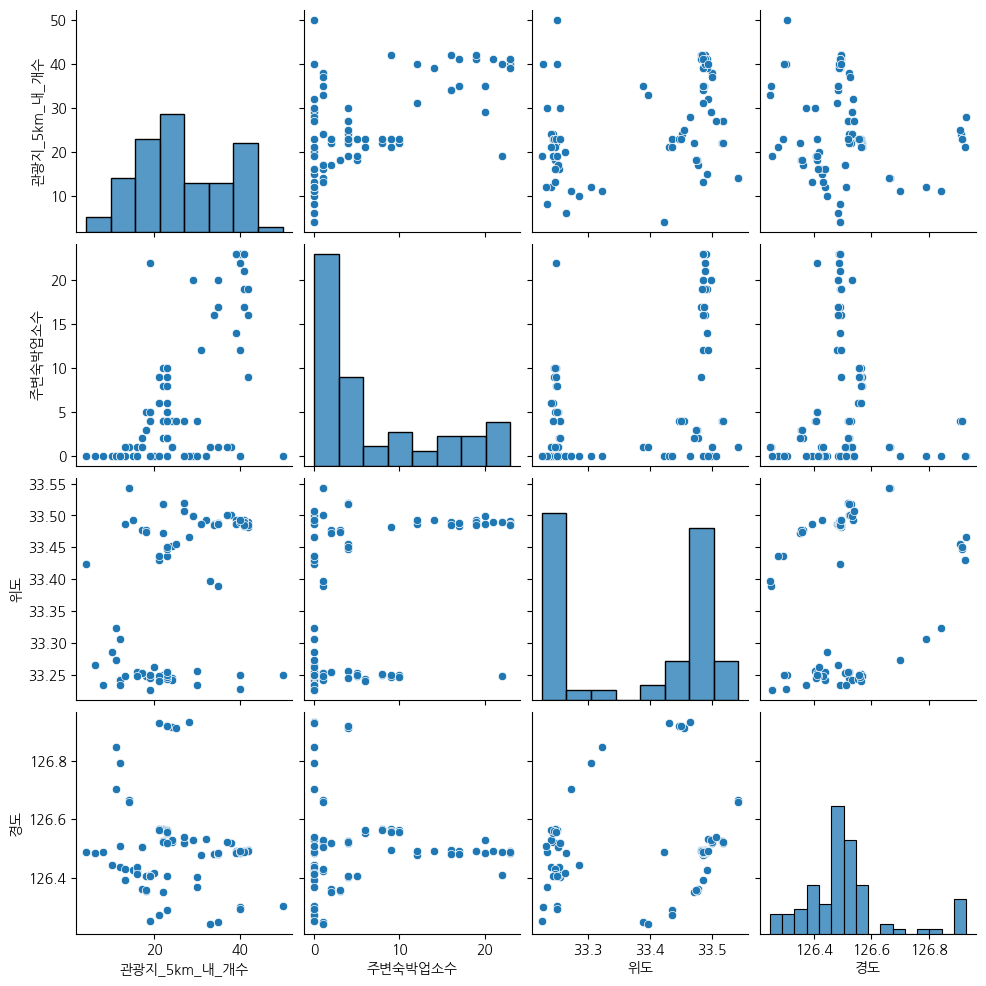

In [34]:
plt.rcParams['font.family'] = 'NanumGothic'
plt.figure(figsize=(20, 20))
sns.pairplot(Accommodation_Facility_Information_df[['관광지_5km_내_개수', '주변숙박업소수', '위도', '경도']])

In [35]:
# 스케일링

from sklearn.preprocessing import StandardScaler, MinMaxScaler

standard_columns = ['경도', '관광지_5km_내_개수']
minmax_columns = ['위도', '주변숙박업소수']

standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

Accommodation_Facility_Information_df[standard_columns] = standard_scaler.fit_transform(Accommodation_Facility_Information_df[standard_columns])
Accommodation_Facility_Information_df[minmax_columns] = minmax_scaler.fit_transform(Accommodation_Facility_Information_df[minmax_columns])

print(Accommodation_Facility_Information_df.head())

              숙박업명  주차장존재여부  식당존재여부  바여부  카페보유여부  피트니스센터여부  야외수영장여부  스파여부  \
0  히든 클리프 호텔 앤 네이처        1       1    1       1         1        1     1   
1        스위트 호텔 제주        1       1    1       1         1        1     1   
2         제주 신라 호텔        1       1    1       1         1        1     1   
3          롯데호텔 제주        1       1    1       1         1        1     1   
4         WE 호텔 제주        1       1    1       1         1        1     1   

   사우나여부  연회장여부  비즈니스센터여부  해변여부        위도        경도   주변숙박업소수  구군명_서귀포시  \
0      1      1         1     0  0.090889 -0.716923  0.173913       1.0   
1      1      1         1     1  0.073387 -0.676828  0.217391       1.0   
2      1      1         1     1  0.066549 -0.679735  0.217391       1.0   
3      1      1         1     1  0.070596 -0.662179  0.956522       0.0   
4      1      1         1     0  0.189417 -0.439605  0.000000       1.0   

   구군명_제주시  관광지_5km_내_개수  객실수_구간_소규모  객실수_구간_중간 규모  객실수_구간_초대규모  평균가격_구간_저가  \
0      

<Figure size 2000x2000 with 0 Axes>

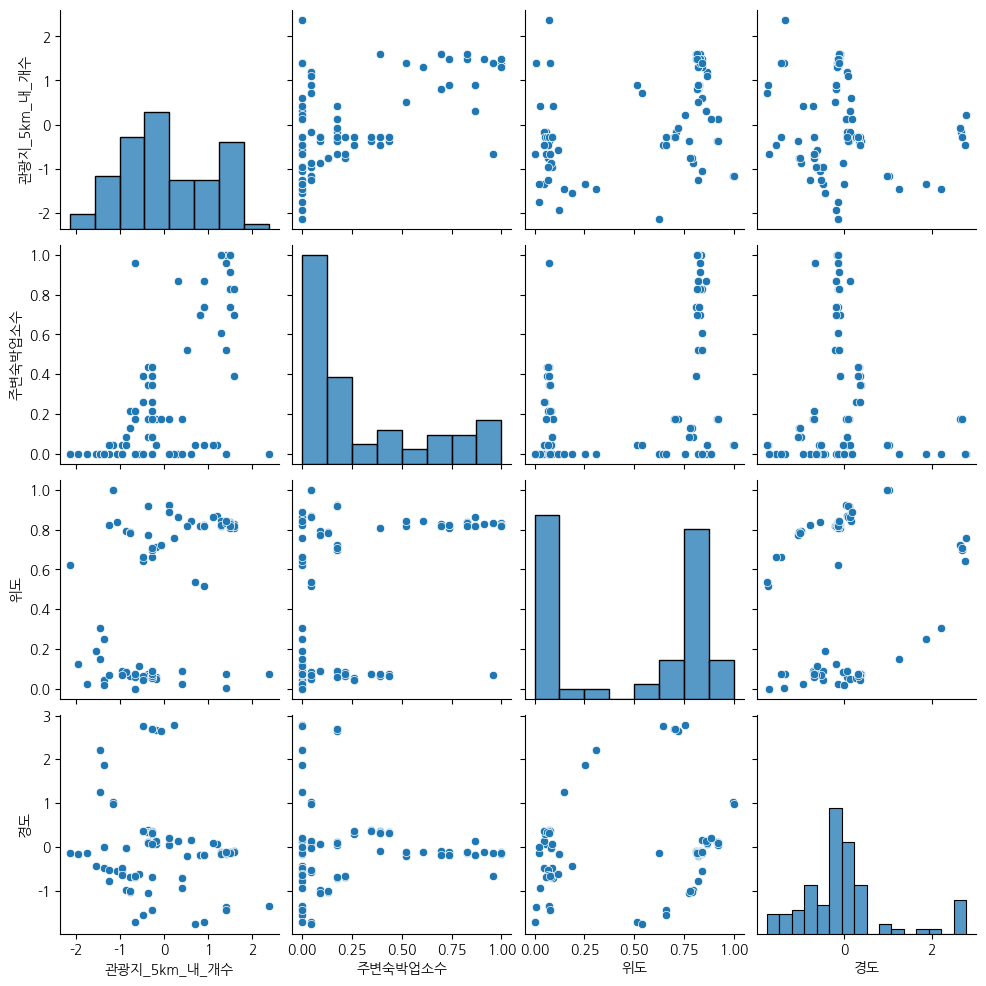

In [36]:
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(20, 20))
sns.pairplot(Accommodation_Facility_Information_df[['관광지_5km_내_개수', '주변숙박업소수', '위도', '경도']])

In [37]:
Accommodation_Facility_Information_df.columns

Index(['숙박업명', '주차장존재여부', '식당존재여부', '바여부', '카페보유여부', '피트니스센터여부', '야외수영장여부',
       '스파여부', '사우나여부', '연회장여부', '비즈니스센터여부', '해변여부', '위도', '경도', '주변숙박업소수',
       '구군명_서귀포시', '구군명_제주시', '관광지_5km_내_개수', '객실수_구간_소규모', '객실수_구간_중간 규모',
       '객실수_구간_초대규모', '평균가격_구간_저가', '평균가격_구간_중간가', '평균가격_구간_초고가',
       '공항과의거리_구간_매우 먼 거리', '공항과의거리_구간_원거리', '공항과의거리_구간_중간 거리'],
      dtype='object')

In [38]:
Accommodation_Facility_Information_df.head()

,숙박업명,주차장존재여부,식당존재여부,바여부,카페보유여부,피트니스센터여부,야외수영장여부,스파여부,사우나여부,연회장여부,비즈니스센터여부,해변여부,위도,경도,주변숙박업소수,구군명_서귀포시,구군명_제주시,관광지_5km_내_개수,객실수_구간_소규모,객실수_구간_중간 규모,객실수_구간_초대규모,평균가격_구간_저가,평균가격_구간_중간가,평균가격_구간_초고가,공항과의거리_구간_매우 먼 거리,공항과의거리_구간_원거리,공항과의거리_구간_중간 거리
0,히든 클리프 호텔 앤 네이처,1,1,1,1,1,1,1,1,1,1,0,0.090889,-0.716923,0.173913,1.0,0.0,0.411554,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,스위트 호텔 제주,1,1,1,1,1,1,1,1,1,1,1,0.073387,-0.676828,0.217391,1.0,0.0,-0.669544,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,제주 신라 호텔,1,1,1,1,1,1,1,1,1,1,1,0.066549,-0.679735,0.217391,1.0,0.0,-0.767825,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,롯데호텔 제주,1,1,1,1,1,1,1,1,1,1,1,0.070596,-0.662179,0.956522,0.0,1.0,-0.669544,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,WE 호텔 제주,1,1,1,1,1,1,1,1,1,1,0,0.189417,-0.439605,0.000000,1.0,0.0,-1.554079,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [39]:
clustering_features = [
       '주차장존재여부', '식당존재여부', '바여부', '카페보유여부', '피트니스센터여부', '야외수영장여부',
       '스파여부', '사우나여부', '연회장여부', '비즈니스센터여부', '해변여부', '위도', '경도', '주변숙박업소수',
       '구군명_서귀포시', '구군명_제주시', '관광지_5km_내_개수', '객실수_구간_소규모', '객실수_구간_중간 규모',
       '객실수_구간_초대규모', '평균가격_구간_저가', '평균가격_구간_중간가', '평균가격_구간_초고가',
       '공항과의거리_구간_매우 먼 거리', '공항과의거리_구간_원거리', '공항과의거리_구간_중간 거리'
]
X = Accommodation_Facility_Information_df[clustering_features]
X.head()
#차원수가 많기에 PCA 선택

,주차장존재여부,식당존재여부,바여부,카페보유여부,피트니스센터여부,야외수영장여부,스파여부,사우나여부,연회장여부,비즈니스센터여부,해변여부,위도,경도,주변숙박업소수,구군명_서귀포시,구군명_제주시,관광지_5km_내_개수,객실수_구간_소규모,객실수_구간_중간 규모,객실수_구간_초대규모,평균가격_구간_저가,평균가격_구간_중간가,평균가격_구간_초고가,공항과의거리_구간_매우 먼 거리,공항과의거리_구간_원거리,공항과의거리_구간_중간 거리
0,1,1,1,1,1,1,1,1,1,1,0,0.090889,-0.716923,0.173913,1.0,0.0,0.411554,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,1,1,1,1,1,1,1,1,1,1,0.073387,-0.676828,0.217391,1.0,0.0,-0.669544,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,1,1,1,1,1,1,1,1,1,1,0.066549,-0.679735,0.217391,1.0,0.0,-0.767825,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1,1,1,1,1,1,1,1,1,1,1,0.070596,-0.662179,0.956522,0.0,1.0,-0.669544,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1,1,1,1,1,1,1,1,1,1,0,0.189417,-0.439605,0.000000,1.0,0.0,-1.554079,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [40]:
# X.to_csv('/content/drive/MyDrive/Final_Project/제주/호텔(스케일링,인코딩완료).csv', index = False)

## PCA

In [41]:
from sklearn.decomposition import PCA

# 2차원 PCA
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X)

# 2차원 PCA 결과를 DataFrame으로 변환
df_pca_2d = pd.DataFrame(X_pca_2d, columns=['PC1', 'PC2'])

# 3차원 PCA
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X)

# 3차원 PCA 결과를 DataFrame으로 변환
df_pca_3d = pd.DataFrame(X_pca_3d, columns=['PC1', 'PC2', 'PC3'])

In [42]:
df_pca_2d['숙박업명'] = Accommodation_Facility_Information_df['숙박업명'].values

In [43]:
# df_pca_2d.to_csv('/content/drive/MyDrive/Final_Project/제주/PCA_2d.csv', index = False)

In [44]:
# 2차원 PCA 시각화
fig_2d = px.scatter(
    df_pca_2d,
    x='PC1',
    y='PC2',
    hover_name='숙박업명',  # 숙박업명 컬럼을 호버 텍스트로 사용
    title='2D PCA of Accommodation Facility Data'
)

# 그래프 표시
fig_2d.show()

In [45]:
df_pca_3d['숙박업명'] = Accommodation_Facility_Information_df['숙박업명'].values

In [46]:
# df_pca_3d.to_csv('/content/drive/MyDrive/Final_Project/제주/PCA_3d.csv', index = False)

In [47]:
# 3차원 PCA 시각화
fig_3d = px.scatter_3d(df_pca_3d, x='PC1', y='PC2', z='PC3', hover_name='숙박업명', title='3D PCA of Accommodation Facility Data')
fig_3d.update_traces(marker=dict(size=3))  # 모든 점의 크기를 조정합니다.
fig_3d.show()

In [48]:
df_pca_3d = df_pca_3d.drop(columns=['숙박업명'])

In [49]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Cluster_X = df_pca_3d

# 엘보우 방법을 이용해 최적의 클러스터 수 결정
inertia_list = []
for n_clusters in range(1, 11):  # 1 ~ 10 클러스터에 대해 KMeans 군집화 시도
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    kmeans.fit(Cluster_X)
    inertia_list.append(kmeans.inertia_)

# 실루엣 분석을 이용한 최적의 클러스터 수 결정
silhouette_scores = []
for n_clusters in range(2, 11):  # 2 ~ 10 클러스터에 대해 실루엣 점수 계산
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(Cluster_X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

In [50]:
cluster_range = range(1, 11)

# 엘보우 방법 결과 데이터프레임 생성
df_elbow = pd.DataFrame({
    'Number of Clusters': cluster_range,
    'Inertia': inertia_list
})

# 실루엣 분석 결과 데이터프레임 생성 (클러스터 수는 2부터 시작)
df_silhouette = pd.DataFrame({
    'Number of Clusters': range(2, 11),
    'Silhouette Score': silhouette_scores
})

# 데이터프레임 출력하여 확인
print(df_elbow)
print(df_silhouette)

   Number of Clusters     Inertia
0                   1  321.087767
1                   2  205.088220
2                   3  136.442498
3                   4   99.545052
4                   5   82.314729
5                   6   65.490459
6                   7   55.477642
7                   8   47.285931
8                   9   38.982322
9                  10   35.331471
   Number of Clusters  Silhouette Score
0                   2          0.341932
1                   3          0.400501
2                   4          0.398641
3                   5          0.318379
4                   6          0.288611
5                   7          0.256463
6                   8          0.296910
7                   9          0.252105
8                  10          0.262994


In [51]:
# df_elbow.to_csv('/content/drive/MyDrive/Final_Project/제주/df_elbow.csv', index = False)
# df_silhouette.to_csv('/content/drive/MyDrive/Final_Project/제주/df_silhouette.csv', index = False)

In [52]:
# 엘보우 방법
fig_elbow = px.line(x=range(1, 11), y=inertia_list, markers=True, labels={'x': 'Number of clusters', 'y': 'Inertia'})
fig_elbow.update_layout(title="Elbow Method with Plotly")
fig_elbow.show()

In [53]:
# 실루엣 분석
fig_silhouette = px.line(x=range(2, 11), y=silhouette_scores, markers=True, labels={'x': 'Number of clusters', 'y': 'Silhouette Score'})
fig_silhouette.update_layout(title="Silhouette Analysis with Plotly")
fig_silhouette.show()

4로 결정!

In [54]:
df_pca_3d['숙박업명'] = Accommodation_Facility_Information_df['숙박업명'].values

In [55]:
# 2차원 PCA 시각화
fig3_2d = px.scatter(
    df_pca_3d,
    x='PC1',
    y='PC2',
    hover_name='숙박업명',  # 숙박업명 컬럼을 호버 텍스트로 사용
    title='2D PCA of Accommodation Facility Data'
)

# 그래프 표시
fig3_2d.show()

In [56]:
df_pca_3d = df_pca_3d.drop(columns=['숙박업명'])

In [57]:
Cluster_X = df_pca_3d

In [62]:
!pip install hdbscan
!pip install minisom
!pip install fuzzy-c-means
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=289b10ae508e54505fc486612cd1203466f86a1ac88032afc867018ce3c967fa
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [74]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift, SpectralClustering, AffinityPropagation
from sklearn.mixture import GaussianMixture
from sklearn.cluster import Birch, OPTICS
from hdbscan import HDBSCAN
from fcmeans import FCM
from minisom import MiniSom
import plotly.graph_objects as go

# 데이터 전처리
Cluster_X_array = Cluster_X.to_numpy()  # numpy 배열로 변환

# 모델 리스트
models = {
    'KMeans': KMeans(n_clusters=6, random_state=42),
    'Hierarchical': AgglomerativeClustering(n_clusters=6),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
    'MeanShift': MeanShift(),
    'GMM': GaussianMixture(n_components=6, random_state=42),
    'SpectralClustering': SpectralClustering(n_clusters=6, random_state=42),
    'OPTICS': OPTICS(min_samples=5),
    'BIRCH': Birch(n_clusters=6),
    'AffinityPropagation': AffinityPropagation(random_state=42),
    'HDBSCAN': HDBSCAN(min_cluster_size=5),
    'FCM': FCM(n_clusters=6),
    'SOM': MiniSom(6, 1, Cluster_X_array.shape[1], sigma=0.3, learning_rate=0.5)
}

# 실루엣 스코어 저장용 딕셔너리
silhouette_scores = {}

# 모델 학습 및 평가
for model_name, model in models.items():
    try:
        if model_name == 'GMM':
            model.fit(Cluster_X)
            labels = model.predict(Cluster_X)
        elif model_name == 'FCM':
            model.fit(Cluster_X_array)
            labels = model.predict(Cluster_X_array)
        elif model_name == 'SOM':
            model.random_weights_init(Cluster_X_array)
            model.train_random(Cluster_X_array, 100)
            labels = np.array([model.winner(x)[0] for x in Cluster_X_array])
        else:
            model.fit(Cluster_X)
            if hasattr(model, 'labels_'):
                labels = model.labels_
            else:
                labels = model.predict(Cluster_X)

        # DBSCAN과 OPTICS의 경우, 모든 데이터 포인트가 군집에 포함되지 않을 수 있으므로, 실루엣 점수 계산 시 주의 필요
        if len(set(labels)) > 1:
            score = silhouette_score(Cluster_X, labels)
        else:
            score = -1  # 군집이 1개 이하인 경우 실루엣 점수를 -1로 설정
    except Exception as e:
        score = -1
        print(f"Error in {model_name}: {e}")

    silhouette_scores[model_name] = score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [75]:
# 실루엣 스코어 출력
for model_name, score in silhouette_scores.items():
    print(f'{model_name}: {score}')

KMeans: 0.39874257712391087
Hierarchical: 0.3382557234344545
DBSCAN: 0.03706275629754075
MeanShift: 0.3594415338351058
GMM: 0.3857876838980827
SpectralClustering: 0.3787654325810883
OPTICS: 0.1000619207475575
BIRCH: 0.3426387112637023
AffinityPropagation: 0.4246373464546474
HDBSCAN: 0.34689527777340273
FCM: 0.36377683060952304
SOM: 0.21434462811123786


In [ ]:
# clustered_pca_data.to_csv('/content/drive/MyDrive/Final_Project/제주/clustered_pca_data.csv', index = False)

In [76]:
# 실루엣 점수 시각화
fig = go.Figure()
fig.add_trace(go.Bar(
    x=list(silhouette_scores.keys()),
    y=list(silhouette_scores.values())
))
fig.update_layout(
    title="Silhouette Scores for Different Clustering Models",
    xaxis_title="Model",
    yaxis_title="Silhouette Score"
)
fig.show()

In [ ]:
from sklearn.metrics import calinski_harabasz_score

# K-Means 모델의 Calinski-Harabasz Index
ch_index_kmeans = calinski_harabasz_score(Cluster_X, kmeans_labels)
# GMM 모델의 Calinski-Harabasz Index
ch_index_gmm = calinski_harabasz_score(Cluster_X, gmm_labels)
# Spectral Clustering 모델의 Calinski-Harabasz Index
ch_index_spectral = calinski_harabasz_score(Cluster_X, spectral_labels)

# 실루엣 점수 시각화
fig = go.Figure()
fig.add_trace(go.Bar(x=["K-Means", "GMM", "Spectral"], y=[ch_index_kmeans, ch_index_gmm, ch_index_spectral]))
fig.update_layout(title="Calinski-Harabasz Index for Different Clustering Models", xaxis_title="Model", yaxis_title="Calinski-Harabasz Index")
fig.show()

In [ ]:
# Kmeans 군집화 실행
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
kmeans.fit(Cluster_X)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [ ]:
kmeans.labels_

array([3, 3, 3, 3, 3, 3, 1, 3, 0, 1, 1, 1, 3, 1, 1, 1, 3, 1, 0, 1, 1, 3,
       3, 3, 1, 3, 3, 0, 2, 0, 0, 1, 3, 3, 1, 3, 1, 2, 1, 2, 0, 2, 1, 1,
       3, 0, 3, 1, 1, 1, 1, 1, 2, 2, 0, 3, 3, 3, 3, 1, 1, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 2, 3, 3, 3, 1, 3, 1, 2, 3, 3, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 3, 1], dtype=int32)

In [ ]:
df_pca_3d['kmeans_cluster'] = kmeans.labels_
df_pca_3d

,PC1,PC2,PC3,kmeans_cluster
0,0.323959,-0.971181,0.888030,3
1,0.924911,-1.627109,0.649679,3
2,1.163946,-1.546122,0.978800,3
3,0.380706,-1.357483,1.359969,3
4,1.795028,-1.345058,0.721241,3
...,...,...,...,...
91,0.233585,-1.254127,-1.156053,0
92,-1.867725,-0.365086,-0.785187,1
93,-1.290050,-0.635994,-0.234223,1
94,0.631608,-1.261143,0.155657,3


In [ ]:
merged_df = pd.concat([Accommodation_Facility_Information_df, df_pca_3d], axis=1)
merged_df.head()

,숙박업명,주차장존재여부,식당존재여부,바여부,카페보유여부,피트니스센터여부,야외수영장여부,스파여부,사우나여부,연회장여부,비즈니스센터여부,해변여부,위도,경도,주변숙박업소수,구군명_서귀포시,구군명_제주시,관광지_5km_내_개수,객실수_구간_소규모,객실수_구간_중간 규모,객실수_구간_초대규모,평균가격_구간_저가,평균가격_구간_중간가,평균가격_구간_초고가,공항과의거리_구간_매우 먼 거리,공항과의거리_구간_원거리,공항과의거리_구간_중간 거리,PC1,PC2,PC3,kmeans_cluster
0,히든 클리프 호텔 앤 네이처,1,1,1,1,1,1,1,1,1,1,0,0.090889,-0.716923,0.173913,1.0,0.0,0.411554,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.323959,-0.971181,0.888030,3
1,스위트 호텔 제주,1,1,1,1,1,1,1,1,1,1,1,0.073387,-0.676828,0.217391,1.0,0.0,-0.669544,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.924911,-1.627109,0.649679,3
2,제주 신라 호텔,1,1,1,1,1,1,1,1,1,1,1,0.066549,-0.679735,0.217391,1.0,0.0,-0.767825,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.163946,-1.546122,0.978800,3
3,롯데호텔 제주,1,1,1,1,1,1,1,1,1,1,1,0.070596,-0.662179,0.956522,0.0,1.0,-0.669544,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.380706,-1.357483,1.359969,3
4,WE 호텔 제주,1,1,1,1,1,1,1,1,1,1,0,0.189417,-0.439605,0.000000,1.0,0.0,-1.554079,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.795028,-1.345058,0.721241,3


In [ ]:
# merged_df.to_csv('/content/drive/MyDrive/Final_Project/제주/PCA군집_최종.csv', index = False)

In [ ]:
# 2차원 PCA 시각화
fig_2d = px.scatter(
    merged_df,
    x='PC1',
    y='PC2',
    color = 'kmeans_cluster',
    hover_name='숙박업명',  # 숙박업명 컬럼을 호버 텍스트로 사용
    title='2D PCA of Accommodation Facility Data'
)

# 그래프 표시
fig_2d.show()

In [ ]:
clusters = merged_df['kmeans_cluster'].unique()
trace_data = {}
for cluster in clusters:
    cluster_data = merged_df[merged_df['kmeans_cluster'] == cluster]
    trace_data[cluster] = {
        'x': cluster_data['PC1'],
        'y': cluster_data['PC2'],
        'text': cluster_data['숙박업명']  # 숙박업명을 text 데이터로 추가
    }

fig = go.Figure()

# 색상 팔레트 생성
colors = px.colors.qualitative.Plotly  # 더 많은 색상이 필요하면 다른 팔레트 선택

# 각 군집별로 트레이스 추가
for idx, cluster in enumerate(clusters):
    color_index = idx % len(colors)  # 색상 반복 사용
    fig.add_trace(
        go.Scatter(
            x=trace_data[cluster]['x'],
            y=trace_data[cluster]['y'],
            mode="markers",
            marker=dict(color=colors[color_index]),
            name=f"Cluster {cluster}",
            text=trace_data[cluster]['text'],  # 호버 텍스트로 숙박업명 사용
            hoverinfo='text'  # 호버 정보를 텍스트로 제한
        )
    )

# 군집별 원형 표시를 위한 동적 버튼 추가
cluster_shapes = []
for idx, cluster in enumerate(clusters):
    x0, y0 = min(trace_data[cluster]['x']), min(trace_data[cluster]['y'])
    x1, y1 = max(trace_data[cluster]['x']), max(trace_data[cluster]['y'])
    color_index = idx % len(colors)  # 색상 반복 사용
    cluster_shapes.append(dict(type="circle",
                               xref="x", yref="y",
                               x0=x0, y0=y0,
                               x1=x1, y1=y1,
                               line=dict(color=colors[color_index])))

buttons = []
for idx, cluster in enumerate(clusters):
    buttons.append(
        dict(label=f"Cluster {cluster}",
             method="relayout",
             args=["shapes", [cluster_shapes[idx]]])
    )

buttons.append(
    dict(label="All",
         method="relayout",
         args=["shapes", cluster_shapes])
)

fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            buttons=buttons
        )
    ],
    title_text="Highlight Clusters with 2D PCA",
    showlegend=True
)

fig.show()

In [ ]:
# 3차원 PCA 시각화
fig_3d = px.scatter_3d(merged_df, x='PC1', y='PC2', z='PC3', color = 'kmeans_cluster', hover_name='숙박업명', title='3D PCA of Accommodation Facility Data')
fig_3d.update_traces(marker=dict(size=3))  # 모든 점의 크기를 조정합니다.
fig_3d.show()

silhouette score는 군집의 일관성을 측정하는 지표 중 하나. 이 값은 -1에서 1 사이의 값을 가지며, 1에 가까울수록 군집 내의 샘플이 잘 매칭되어 있고 다른 군집과 잘 구분되어 있다는 것을 의미합니다. 반면 0에 가까울수록 군집 간의 구분이 명확하지 않음을, -1에 가까울수록 잘못 군집화되었음

군집화 모델을 선택할 때는 silhouette score 외에도 다음과 같은 요소를 고려해야

군집의 해석 가능성: 모델이 생성한 군집이 실제 데이터의 구조를 잘 반영하고, 명확한 해석을 가능하게 하는지 여부.
군집의 안정성: 다양한 데이터 샘플이나 초기 조건에서도 일관된 군집 결과를 제공하는지 여부.
실제 사용 사례와의 부합: 군집화 결과가 실제 비즈니스 문제나 사용 사례의 목적에 부합하는지 여부.

최종 모델을 결정하기 전에 다음과 같은 추가적인 검토가 필요합니다:

각 모델의 군집 결과를 실제 도메인 지식과 대조해 볼 것.
다른 평가 지표나 시각화 기법을 사용해 군집의 질을 검토할 것.
비즈니스 목적에 부합하는지, 해석 가능한 결과를 제공하는지 확인할 것.

## t-sne

In [ ]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits

In [ ]:
tsne_2d = TSNE(n_components=2, random_state=42)
X_tsne_2d = tsne_2d.fit_transform(X)

tsne_3d = TSNE(n_components=3, random_state=42)
X_tsne_3d = tsne_3d.fit_transform(X)

df_tsne_2d = pd.DataFrame(X_tsne_2d, columns=['TSNE1', 'TSNE2'])
df_tsne_3d = pd.DataFrame(X_tsne_3d, columns=['TSNE1', 'TSNE2', 'TSNE3'])

In [ ]:
df_tsne_2d['숙박업명'] = Accommodation_Facility_Information_df['숙박업명'].values

In [ ]:
# 2차원 PCA 시각화
fig_2d = px.scatter(
    df_tsne_2d,
    x='TSNE1',
    y='TSNE2',
    hover_name='숙박업명',  # 숙박업명 컬럼을 호버 텍스트로 사용
    title='2D TSNE of Accommodation Facility Data'
)

# 그래프 표시
fig_2d.show()

In [ ]:
df_tsne_3d['숙박업명'] = Accommodation_Facility_Information_df['숙박업명'].values

In [ ]:
# 3차원 PCA 시각화
fig_3d = px.scatter_3d(df_tsne_3d, x='TSNE1', y='TSNE2', z='TSNE3', hover_name='숙박업명', title='3D TSNE of Accommodation Facility Data')
fig_3d.update_traces(marker=dict(size=3))  # 모든 점의 크기를 조정합니다.
fig_3d.show()

In [ ]:
df_tsne_3d = df_tsne_3d.drop(columns=['숙박업명'])

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Cluster_X = df_tsne_3d

# 엘보우 방법을 이용해 최적의 클러스터 수 결정
inertia_list = []
for n_clusters in range(1, 11):  # 1 ~ 10 클러스터에 대해 KMeans 군집화 시도
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    kmeans.fit(Cluster_X)
    inertia_list.append(kmeans.inertia_)

# 실루엣 분석을 이용한 최적의 클러스터 수 결정
silhouette_scores = []
for n_clusters in range(2, 11):  # 2 ~ 10 클러스터에 대해 실루엣 점수 계산
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(Cluster_X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

In [ ]:
# 엘보우 방법
fig_elbow = px.line(x=range(1, 11), y=inertia_list, markers=True, labels={'x': 'Number of clusters', 'y': 'Inertia'})
fig_elbow.update_layout(title="Elbow Method with Plotly")
fig_elbow.show()

In [ ]:
# 실루엣 분석
fig_silhouette = px.line(x=range(2, 11), y=silhouette_scores, markers=True, labels={'x': 'Number of clusters', 'y': 'Silhouette Score'})
fig_silhouette.update_layout(title="Silhouette Analysis with Plotly")
fig_silhouette.show()

실루엣 점수가 양수가 아닌 것으로 보아 군집 간의 분리가 그리 잘 되지 않았음


**실루엣 점수는 개별 데이터 포인트가 얼마나 잘 군집화되었는지를 측정하는 지표. 실루엣 점수는 -1에서 1까지의 값**

**1에 가까운 값**: 데이터 포인트가 해당 군집에 잘 맞고, 다른 군집과는 잘 구분됨을 의미합니다.

**0에 가까운 값**: 데이터 포인트가 군집 경계에 위치하고 있음을 나타냅니다. 즉, 군집에 할당하기 애매한 상태입니다.

**-1에 가까운 값**: 데이터 포인트가 잘못된 군집에 할당되었음을 나타냅니다.
실루엣 점수가 양수가 아닌 경우, 즉 0에 가깝거나 음수인 경우는 다음과 같은 상황을 나타낼 수 있습니다:

군집 간 분리 부족: 각 군집이 서로 잘 분리되지 않고 겹치는 경우, 군집 내 데이터 포인트가 서로 인접한 군집의 데이터 포인트와 거의 동일한 정도로 가깝게 위치할 수 있습니다.

잘못된 군집화: 데이터 포인트가 잘못된 군집에 할당되었거나, 군집화 알고리즘이 데이터의 구조를 잘못 파악한 경우입니다.

군집 수 오류: 선택한 군집의 수가 데이터에 존재하는 자연 군집의 수와 맞지 않을 때, 군집화 성능이 떨어질 수 있습니다.

데이터 분포 특성: 데이터에 노이즈가 많거나, 군집을 구성하는 패턴이 복잡하고 중첩되는 경우, 군집화 알고리즘이 이러한 구조를 적절히 반영하지 못할 수 있습니다.

적절한 피처 선택의 부재: 사용된 피처가 군집화를 위한 적절한 대표성을 지니지 못하는 경우에도 군집화 성능이 낮아질 수 있습니다.

실루엣 점수가 낮은 것은 데이터를 군집화하는 데 있어서 알고리즘의 성능이 떨어지거나, 데이터 자체가 군집화하기 어려운 구조를 가지고 있음을 시사

## UMAP

In [77]:
pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.1 MB/s eta 0:00:00


In [85]:
import umap

umap_2d = umap.UMAP(n_components=2, random_state=42)
umap_3d = umap.UMAP(n_components=3, random_state=42)

X_umap_2d = umap_2d.fit_transform(X)
X_umap_3d = umap_3d.fit_transform(X)

df_umap_2d = pd.DataFrame(X_umap_2d, columns=['UMAP1', 'UMAP2'])
df_umap_3d = pd.DataFrame(X_umap_3d, columns=['UMAP1', 'UMAP2', 'UMAP3'])

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [86]:
df_umap_2d['숙박업명'] = Accommodation_Facility_Information_df['숙박업명'].values

In [ ]:
# df_umap_2d.to_csv('/content/drive/MyDrive/Final_Project/제주/df_umap_2d.csv', index = False)

In [87]:
# 2차원 PCA 시각화
fig_2d = px.scatter(
    df_umap_2d,
    x='UMAP1',
    y='UMAP2',
    hover_name='숙박업명',  # 숙박업명 컬럼을 호버 텍스트로 사용
    title='2D UMAP of Accommodation Facility Data'
)

# 그래프 표시
fig_2d.show()

In [88]:
df_umap_3d['숙박업명'] = Accommodation_Facility_Information_df['숙박업명'].values

In [82]:
# df_umap_3d.to_csv('/content/drive/MyDrive/Final_Project/제주/df_umap_3d.csv', index = False)

In [89]:
# 3차원 PCA 시각화
fig_3d = px.scatter_3d(df_umap_3d, x='UMAP1', y='UMAP2', z='UMAP3', hover_name='숙박업명', title='3D UMAP of Accommodation Facility Data')
fig_3d.update_traces(marker=dict(size=3))  # 모든 점의 크기를 조정합니다.
fig_3d.show()

In [90]:
df_umap_3d = df_umap_3d.drop(columns=['숙박업명'])

In [91]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Cluster_X = df_umap_3d

# 엘보우 방법을 이용해 최적의 클러스터 수 결정
inertia_list = []
for n_clusters in range(1, 11):  # 1 ~ 10 클러스터에 대해 KMeans 군집화 시도
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    kmeans.fit(Cluster_X)
    inertia_list.append(kmeans.inertia_)

# 실루엣 분석을 이용한 최적의 클러스터 수 결정
silhouette_scores = []
for n_clusters in range(2, 11):  # 2 ~ 10 클러스터에 대해 실루엣 점수 계산
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(Cluster_X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

In [92]:
cluster_range = range(1, 11)

# 엘보우 방법 결과 데이터프레임 생성
df_elbow_umap = pd.DataFrame({
    'Number of Clusters': cluster_range,
    'Inertia': inertia_list
})

# 실루엣 분석 결과 데이터프레임 생성 (클러스터 수는 2부터 시작)
df_silhouette_umap = pd.DataFrame({
    'Number of Clusters': range(2, 11),
    'Silhouette Score': silhouette_scores
})

# 데이터프레임 출력하여 확인
print(df_elbow_umap)
print(df_silhouette_umap)

   Number of Clusters     Inertia
0                   1  746.265686
1                   2  189.454239
2                   3  117.603493
3                   4   77.970833
4                   5   49.963600
5                   6   35.527672
6                   7   28.894741
7                   8   24.651524
8                   9   21.856888
9                  10   19.691984
   Number of Clusters  Silhouette Score
0                   2          0.552039
1                   3          0.396412
2                   4          0.415148
3                   5          0.503183
4                   6          0.462788
5                   7          0.368243
6                   8          0.384446
7                   9          0.345400
8                  10          0.323728


In [ ]:
# df_elbow_umap.to_csv('/content/drive/MyDrive/Final_Project/제주/df_elbow_umap.csv', index = False)
# df_silhouette_umap.to_csv('/content/drive/MyDrive/Final_Project/제주/df_silhouette_umap.csv', index = False)

In [93]:
# 엘보우 방법
fig_elbow = px.line(x=range(1, 11), y=inertia_list, markers=True, labels={'x': 'Number of clusters', 'y': 'Inertia'})
fig_elbow.update_layout(title="Elbow Method with Plotly")
fig_elbow.show()

In [94]:
# 실루엣 분석
fig_silhouette = px.line(x=range(2, 11), y=silhouette_scores, markers=True, labels={'x': 'Number of clusters', 'y': 'Silhouette Score'})
fig_silhouette.update_layout(title="Silhouette Analysis with Plotly")
fig_silhouette.show()

5로 결정!

In [96]:
Cluster_X = df_umap_3d

In [98]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift, SpectralClustering, AffinityPropagation
from sklearn.mixture import GaussianMixture
from sklearn.cluster import Birch, OPTICS
from hdbscan import HDBSCAN
from fcmeans import FCM
from minisom import MiniSom

# 데이터 전처리
Cluster_X_array = Cluster_X.to_numpy()  # numpy 배열로 변환

# 모델 리스트
models = {
    'KMeans': KMeans(n_clusters=6, random_state=42),
    'Hierarchical': AgglomerativeClustering(n_clusters=6),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
    'MeanShift': MeanShift(),
    'GMM': GaussianMixture(n_components=6, random_state=42),
    'SpectralClustering': SpectralClustering(n_clusters=6, random_state=42),
    'OPTICS': OPTICS(min_samples=5),
    'BIRCH': Birch(n_clusters=6),
    'AffinityPropagation': AffinityPropagation(random_state=42),
    'HDBSCAN': HDBSCAN(min_cluster_size=5),
    'FCM': FCM(n_clusters=6),
    'SOM': MiniSom(6, 1, Cluster_X_array.shape[1], sigma=0.3, learning_rate=0.5)
}

# 실루엣 스코어 저장용 딕셔너리
silhouette_scores = {}

# 모델 학습 및 평가
for model_name, model in models.items():
    try:
        if model_name == 'GMM':
            model.fit(Cluster_X)
            labels = model.predict(Cluster_X)
        elif model_name == 'FCM':
            model.fit(Cluster_X_array)
            labels = model.predict(Cluster_X_array)
        elif model_name == 'SOM':
            model.random_weights_init(Cluster_X_array)
            model.train_random(Cluster_X_array, 100)
            labels = np.array([model.winner(x)[0] for x in Cluster_X_array])
        else:
            model.fit(Cluster_X)
            if hasattr(model, 'labels_'):
                labels = model.labels_
            else:
                labels = model.predict(Cluster_X)

        # DBSCAN과 OPTICS의 경우, 모든 데이터 포인트가 군집에 포함되지 않을 수 있으므로, 실루엣 점수 계산 시 주의 필요
        if len(set(labels)) > 1:
            score = silhouette_score(Cluster_X, labels)
        else:
            score = -1  # 군집이 1개 이하인 경우 실루엣 점수를 -1로 설정
    except Exception as e:
        score = -1
        print(f"Error in {model_name}: {e}")

    silhouette_scores[model_name] = score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [99]:
# 실루엣 스코어 출력
for model_name, score in silhouette_scores.items():
    print(f'{model_name}: {score}')

KMeans: 0.5312854051589966
Hierarchical: 0.5266072154045105
DBSCAN: 0.33236566185951233
MeanShift: 0.6186148524284363
GMM: 0.531738817691803
SpectralClustering: 0.5316450595855713
OPTICS: 0.28426113724708557
BIRCH: 0.5297420024871826
AffinityPropagation: 0.5151957273483276
HDBSCAN: 0.4263652265071869
FCM: 0.5280464887619019
SOM: 0.5122339129447937


In [ ]:
# clustered_umap_data.to_csv('/content/drive/MyDrive/Final_Project/제주/clustered_umap_data.csv', index = False)

In [100]:
# 실루엣 점수 시각화
fig = go.Figure()
fig.add_trace(go.Bar(
    x=list(silhouette_scores.keys()),
    y=list(silhouette_scores.values())
))
fig.update_layout(
    title="Silhouette Scores for Different Clustering Models",
    xaxis_title="Model",
    yaxis_title="Silhouette Score"
)
fig.show()

In [ ]:
from sklearn.metrics import calinski_harabasz_score

# K-Means 모델의 Calinski-Harabasz Index
ch_index_kmeans = calinski_harabasz_score(Cluster_X, kmeans_labels)
# GMM 모델의 Calinski-Harabasz Index
ch_index_gmm = calinski_harabasz_score(Cluster_X, gmm_labels)
# Spectral Clustering 모델의 Calinski-Harabasz Index
ch_index_spectral = calinski_harabasz_score(Cluster_X, spectral_labels)

# 실루엣 점수 시각화
fig = go.Figure()
fig.add_trace(go.Bar(x=["K-Means", "GMM", "Spectral"], y=[ch_index_kmeans, ch_index_gmm, ch_index_spectral]))
fig.update_layout(title="Calinski-Harabasz Index for Different Clustering Models", xaxis_title="Model", yaxis_title="Calinski-Harabasz Index")
fig.show()

- MeanShift 선택

In [112]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 최적의 군집 수를 5개로 고정
optimal_clusters = 5

# KMeans의 초기화 방법과 반복 횟수를 다양하게 설정
init_methods = ['k-means++', 'random']
n_init_values = [10, 20, 30]
best_score = -1
best_params = None
silhouette_scores = []

# KMeans에 대해 각 초기화 방법과 n_init 값에 대한 실루엣 점수 계산
for init in init_methods:
    for n_init in n_init_values:
        kmeans = KMeans(n_clusters=optimal_clusters, init=init, n_init=n_init, random_state=42)
        kmeans_labels = kmeans.fit_predict(Cluster_X)

        if len(set(kmeans_labels)) > 1:  # 적어도 두 개 이상의 클러스터가 있을 때만 실루엣 점수를 계산
            score = silhouette_score(Cluster_X, kmeans_labels)
            silhouette_scores.append((init, n_init, score))

            if score > best_score:
                best_score = score
                best_params = (init, n_init)

print(f"Best parameters: {best_params}")
print(f"Best Silhouette Score: {best_score}")

Best parameters: ('k-means++', 20)
Best Silhouette Score: 0.5561266448748304


In [113]:
# 최적의 파라미터로 KMeans 클러스터링 수행
best_init, best_n_init = best_params
best_kmeans = KMeans(n_clusters=optimal_clusters, init=best_init, n_init=best_n_init, random_state=42)
best_kmeans_labels = best_kmeans.fit_predict(Cluster_X)

In [115]:
# 실루엣 점수 시각화
init_methods, n_init_values, scores = zip(*silhouette_scores)
fig = go.Figure()
for init_method in set(init_methods):
    subset = [(n, s) for (i, n, s) in zip(init_methods, n_init_values, scores) if i == init_method]
    n_init_vals, scs = zip(*subset)
    fig.add_trace(go.Scatter(
        x=n_init_vals,
        y=scs,
        mode='lines+markers',
        name=f'Init Method: {init_method}'
    ))
fig.update_layout(
    title="Silhouette Scores for Different KMeans Parameters (5 Clusters)",
    xaxis_title="n_init",
    yaxis_title="Silhouette Score"
)
fig.show()

In [116]:
best_kmeans_labels

array([4, 4, 4, 4, 4, 4, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2,
       2, 2, 1, 2, 2, 3, 0, 3, 3, 2, 2, 2, 1, 2, 1, 0, 1, 0, 3, 0, 1, 1,
       2, 3, 2, 1, 1, 1, 1, 1, 0, 0, 3, 4, 4, 4, 2, 1, 1, 0, 3, 3, 3, 3,
       3, 3, 3, 0, 0, 2, 3, 0, 4, 4, 0, 1, 4, 2, 0, 4, 3, 1, 1, 3, 3, 3,
       3, 3, 3, 3, 1, 1, 4, 2], dtype=int32)

In [117]:
df_umap_3d['UMAP_cluster'] = best_kmeans_labels
df_umap_3d

,UMAP1,UMAP2,UMAP3,UMAP_cluster
0,9.868669,8.417746,0.497139,4
1,10.275237,8.554955,0.230632,4
2,9.796725,8.420808,0.238042,4
3,9.463305,8.388819,0.308418,4
4,9.961840,8.916928,0.405709,4
...,...,...,...,...
91,11.452575,9.415361,0.110855,3
92,5.427748,7.062334,-0.144698,1
93,5.599342,7.439981,0.154226,1
94,10.878345,8.681321,0.092519,4


In [149]:
Accommodation_Facility_Information_df.head()

,숙박업명,시도명,구군명,주변숙박업목록내용,1분기평균가격,2분기평균가격,주차장존재여부,식당존재여부,바여부,카페보유여부,피트니스센터여부,야외수영장여부,스파여부,사우나여부,연회장여부,비즈니스센터여부,해변여부,위도,경도,주변숙박업소수,관광지_5km_내_개수,객실수_구간,평균가격_구간,공항과의거리_구간
0,히든 클리프 호텔 앤 네이처,제주,서귀포시,"스위트 호텔 제주, 제주 신라 호텔, 그랜드 조선 제주, 블룸 호텔",263604,297748,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,N,33.254885,126.402341,4,30,중간 규모,고가,원거리
1,스위트 호텔 제주,제주,서귀포시,"히든 클리프 호텔 앤 네이처, 제주 신라 호텔, 그랜드 조선 제주, 파르나스 호텔 ...",209336,250179,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,33.249332,126.408394,5,19,소규모,고가,원거리
2,제주 신라 호텔,제주,서귀포시,"히든 클리프 호텔 앤 네이처, 스위트 호텔 제주, 그랜드 조선 제주, 파르나스 호텔...",470924,521480,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,33.247163,126.407955,5,18,대규모,초고가,원거리
3,롯데호텔 제주,제주,제주시,"엠버시티호텔(구.아이비호텔), 엠버호텔, 롯데시티호텔 제주, 신라스테이제주, 어반아...",453097,474860,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,33.248447,126.410606,22,19,대규모,초고가,원거리
4,WE 호텔 제주,제주,서귀포시,없음,257843,299299,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,N,33.286140,126.444209,0,10,중간 규모,고가,원거리


In [150]:
columns_to_exclude = ['시도명', '주변숙박업목록내용', '1분기평균가격', '2분기평균가격']
Accommodation_Facility_Information_df = Accommodation_Facility_Information_df.drop(columns=columns_to_exclude)

Accommodation_Facility_Information_df.head()

,숙박업명,구군명,주차장존재여부,식당존재여부,바여부,카페보유여부,피트니스센터여부,야외수영장여부,스파여부,사우나여부,연회장여부,비즈니스센터여부,해변여부,위도,경도,주변숙박업소수,관광지_5km_내_개수,객실수_구간,평균가격_구간,공항과의거리_구간
0,히든 클리프 호텔 앤 네이처,서귀포시,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,N,33.254885,126.402341,4,30,중간 규모,고가,원거리
1,스위트 호텔 제주,서귀포시,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,33.249332,126.408394,5,19,소규모,고가,원거리
2,제주 신라 호텔,서귀포시,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,33.247163,126.407955,5,18,대규모,초고가,원거리
3,롯데호텔 제주,제주시,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,33.248447,126.410606,22,19,대규모,초고가,원거리
4,WE 호텔 제주,서귀포시,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,N,33.286140,126.444209,0,10,중간 규모,고가,원거리


In [153]:
Accommodation_Facility_Information_df['군집'] = df_umap_3d['UMAP_cluster']

In [154]:
Accommodation_Facility_Information_df.head()

,숙박업명,구군명,주차장존재여부,식당존재여부,바여부,카페보유여부,피트니스센터여부,야외수영장여부,스파여부,사우나여부,연회장여부,비즈니스센터여부,해변여부,위도,경도,주변숙박업소수,관광지_5km_내_개수,객실수_구간,평균가격_구간,공항과의거리_구간,군집
0,히든 클리프 호텔 앤 네이처,서귀포시,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,N,33.254885,126.402341,4,30,중간 규모,고가,원거리,4
1,스위트 호텔 제주,서귀포시,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,33.249332,126.408394,5,19,소규모,고가,원거리,4
2,제주 신라 호텔,서귀포시,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,33.247163,126.407955,5,18,대규모,초고가,원거리,4
3,롯데호텔 제주,제주시,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,33.248447,126.410606,22,19,대규모,초고가,원거리,4
4,WE 호텔 제주,서귀포시,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,N,33.286140,126.444209,0,10,중간 규모,고가,원거리,4


In [155]:
Accommodation_Facility_Information_df.to_csv('/content/drive/MyDrive/Final_Project/제주/공모전_군집분석.csv', index = False)

In [158]:
merged_df = pd.concat([Accommodation_Facility_Information_df, df_umap_3d], axis=1)
merged_df.head()

,숙박업명,구군명,주차장존재여부,식당존재여부,바여부,카페보유여부,피트니스센터여부,야외수영장여부,스파여부,사우나여부,연회장여부,비즈니스센터여부,해변여부,위도,경도,주변숙박업소수,관광지_5km_내_개수,객실수_구간,평균가격_구간,공항과의거리_구간,군집,UMAP1,UMAP2,UMAP3,UMAP_cluster
0,히든 클리프 호텔 앤 네이처,서귀포시,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,N,33.254885,126.402341,4,30,중간 규모,고가,원거리,4,9.868669,8.417746,0.497139,4
1,스위트 호텔 제주,서귀포시,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,33.249332,126.408394,5,19,소규모,고가,원거리,4,10.275237,8.554955,0.230632,4
2,제주 신라 호텔,서귀포시,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,33.247163,126.407955,5,18,대규모,초고가,원거리,4,9.796725,8.420808,0.238042,4
3,롯데호텔 제주,제주시,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,33.248447,126.410606,22,19,대규모,초고가,원거리,4,9.463305,8.388819,0.308418,4
4,WE 호텔 제주,서귀포시,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,N,33.286140,126.444209,0,10,중간 규모,고가,원거리,4,9.961840,8.916928,0.405709,4


In [159]:
# 2차원 PCA 시각화
fig_2d = px.scatter(
    merged_df,
    x='UMAP1',
    y='UMAP3',
    color = 'UMAP_cluster',
    hover_name='숙박업명',  # 숙박업명 컬럼을 호버 텍스트로 사용
    title='2D UMAP of Accommodation Facility Data'
)

# 그래프 표시
fig_2d.show()

In [160]:
clusters = merged_df['UMAP_cluster'].unique()
trace_data = {}
for cluster in clusters:
    cluster_data = merged_df[merged_df['UMAP_cluster'] == cluster]
    trace_data[cluster] = {
        'x': cluster_data['UMAP1'],
        'y': cluster_data['UMAP3'],
        'text': cluster_data['숙박업명']  # 숙박업명을 text 데이터로 추가
    }

fig = go.Figure()

# 색상 팔레트 생성
colors = px.colors.qualitative.Plotly  # 더 많은 색상이 필요하면 다른 팔레트 선택

# 각 군집별로 트레이스 추가
for idx, cluster in enumerate(clusters):
    color_index = idx % len(colors)  # 색상 반복 사용
    fig.add_trace(
        go.Scatter(
            x=trace_data[cluster]['x'],
            y=trace_data[cluster]['y'],
            mode="markers",
            marker=dict(color=colors[color_index]),
            name=f"Cluster {cluster}",
            text=trace_data[cluster]['text'],  # 호버 텍스트로 숙박업명 사용
            hoverinfo='text'  # 호버 정보를 텍스트로 제한
        )
    )

# 군집별 원형 표시를 위한 동적 버튼 추가
cluster_shapes = []
for idx, cluster in enumerate(clusters):
    x0, y0 = min(trace_data[cluster]['x']), min(trace_data[cluster]['y'])
    x1, y1 = max(trace_data[cluster]['x']), max(trace_data[cluster]['y'])
    color_index = idx % len(colors)  # 색상 반복 사용
    cluster_shapes.append(dict(type="circle",
                               xref="x", yref="y",
                               x0=x0, y0=y0,
                               x1=x1, y1=y1,
                               line=dict(color=colors[color_index])))

buttons = []
for idx, cluster in enumerate(clusters):
    buttons.append(
        dict(label=f"Cluster {cluster}",
             method="relayout",
             args=["shapes", [cluster_shapes[idx]]])
    )

buttons.append(
    dict(label="All",
         method="relayout",
         args=["shapes", cluster_shapes])
)

fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            buttons=buttons
        )
    ],
    title_text="Highlight Clusters with 2D UMAP",
    showlegend=True
)

fig.show()

In [161]:
# 3차원 PCA 시각화
fig_3d = px.scatter_3d(merged_df, x='UMAP1', y='UMAP2', z='UMAP3', color = 'UMAP_cluster', hover_name='숙박업명', title='3D UMAP of Accommodation Facility Data')
fig_3d.update_traces(marker=dict(size=3))  # 모든 점의 크기를 조정합니다.
fig_3d.show()

In [164]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   숙박업명          96 non-null     object  
 1   구군명           96 non-null     object  
 2   주차장존재여부       96 non-null     object  
 3   식당존재여부        96 non-null     object  
 4   바여부           96 non-null     object  
 5   카페보유여부        96 non-null     object  
 6   피트니스센터여부      96 non-null     object  
 7   야외수영장여부       96 non-null     object  
 8   스파여부          96 non-null     object  
 9   사우나여부         96 non-null     object  
 10  연회장여부         96 non-null     object  
 11  비즈니스센터여부      96 non-null     object  
 12  해변여부          96 non-null     object  
 13  위도            96 non-null     float64 
 14  경도            96 non-null     float64 
 15  주변숙박업소수       96 non-null     int64   
 16  관광지_5km_내_개수  96 non-null     int64   
 17  객실수_구간        96 non-null     category
 18  평균가격_구간     

In [165]:
merged_df['평균가격_구간'].value_counts()

평균가격_구간
저가     38
중간가    34
고가     16
초고가     8
Name: count, dtype: int64

In [ ]:
Accommodation_Facility_Information_df['가격(\)'] = Accommodation_Facility_Information_df[['1분기평균가격', '2분기평균가격']].mean(axis=1)
Accommodation_Facility_Information_df.head()

In [167]:
amenities_descriptions1 = {
    0: "주차장, 바, 야외수영장은 대부분 존재, 피트니스센터, 스파, 사우나 비율이 상대적으로 낮음.",
    1: "주차장, 식당, 비즈니스센터가 높은 비율로 존재, 바와 해변 접근성은 낮음.",
    2: "주차장, 식당, 바, 카페, 비즈니스센터 존재 비율이 높음, 피트니스센터와 야외수영장 비율이 중간 정도",
    3: "주차장, 바, 비즈니스센터는 대부분 존재, 피트니스센터와 야외수영장 비율이 낮음",
    4: "주차장, 식당, 바, 카페, 피트니스센터, 야외수영장, 스파, 사우나 비율이 매우 높음"
}

amenities_descriptions2 = {
    0: "평균 관광지 수 (5km 내): 18.42개",
    1: "평균 관광지 수 (5km 내): 38.81개",
    2: "평균 관광지 수 (5km 내): 22개",
    3: "평균 관광지 수 (5km 내): 20.27개",
    4: "평균 관광지 수 (5km 내): 21.5개"
}

amenities_descriptions3 = {
    0: "가격대: 중간가 (보통)",
    1: "가격대: 저가",
    2: "가격대: 중간가 (보통)",
    3: "가격대: 저가",
    4: "가격대: 높음"
}

amenities_descriptions4 = {
    0: "공항과의 거리: 매우 먼 거리",
    1: "공항과의 거리: 근접",
    2: "공항과의 거리: 근접",
    3: "공항과의 거리: 원거리",
    4: "공항과의 거리: 원거리"
}



# '편의시설' 컬럼 추가
Accommodation_Facility_Information_df['편의시설'] = Accommodation_Facility_Information_df['군집'].map(amenities_descriptions1)
Accommodation_Facility_Information_df['주변 관광지'] = Accommodation_Facility_Information_df['군집'].map(amenities_descriptions2)
Accommodation_Facility_Information_df['가격대'] = Accommodation_Facility_Information_df['군집'].map(amenities_descriptions3)
Accommodation_Facility_Information_df['공항과의 거리'] = Accommodation_Facility_Information_df['군집'].map(amenities_descriptions4)

# 결과 확인
Accommodation_Facility_Information_df.head()

,숙박업명,구군명,주차장존재여부,식당존재여부,바여부,카페보유여부,피트니스센터여부,야외수영장여부,스파여부,사우나여부,연회장여부,비즈니스센터여부,해변여부,위도,경도,주변숙박업소수,관광지_5km_내_개수,객실수_구간,평균가격_구간,공항과의거리_구간,군집,편의시설,주변 관광지,가격대,공항과의 거리
0,히든 클리프 호텔 앤 네이처,서귀포시,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,N,33.254885,126.402341,4,30,중간 규모,고가,원거리,4,"주차장, 식당, 바, 카페, 피트니스센터, 야외수영장, 스파, 사우나 비율이 매우 높음",평균 관광지 수 (5km 내): 21.5개,가격대: 높음,공항과의 거리: 원거리
1,스위트 호텔 제주,서귀포시,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,33.249332,126.408394,5,19,소규모,고가,원거리,4,"주차장, 식당, 바, 카페, 피트니스센터, 야외수영장, 스파, 사우나 비율이 매우 높음",평균 관광지 수 (5km 내): 21.5개,가격대: 높음,공항과의 거리: 원거리
2,제주 신라 호텔,서귀포시,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,33.247163,126.407955,5,18,대규모,초고가,원거리,4,"주차장, 식당, 바, 카페, 피트니스센터, 야외수영장, 스파, 사우나 비율이 매우 높음",평균 관광지 수 (5km 내): 21.5개,가격대: 높음,공항과의 거리: 원거리
3,롯데호텔 제주,제주시,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,33.248447,126.410606,22,19,대규모,초고가,원거리,4,"주차장, 식당, 바, 카페, 피트니스센터, 야외수영장, 스파, 사우나 비율이 매우 높음",평균 관광지 수 (5km 내): 21.5개,가격대: 높음,공항과의 거리: 원거리
4,WE 호텔 제주,서귀포시,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,N,33.286140,126.444209,0,10,중간 규모,고가,원거리,4,"주차장, 식당, 바, 카페, 피트니스센터, 야외수영장, 스파, 사우나 비율이 매우 높음",평균 관광지 수 (5km 내): 21.5개,가격대: 높음,공항과의 거리: 원거리


In [168]:
Accommodation_Facility_Information_df.to_csv('/content/drive/MyDrive/Final_Project/제주/공모전_군집분석_최종완성끝끝끝!!.csv', index = False)

In [ ]:
import folium

# 제주도의 중심 좌표
jeju_center = [33.3617, 126.5292]

# Folium을 사용하여 지도 생성
map_jeju = folium.Map(location=jeju_center, zoom_start=10)

# 분류명별로 마커 색상과 모양을 지정 (임의 지정)
marker_colors = {
    0: 'blue',
    1: 'green',
    2: 'red',
    3: 'purple',
    4: 'orange',
    5: 'darkblue',
    6: 'darkgreen',
    7: 'darkred',
}

# 데이터에 따라 마커 추가
for idx, row in Accommodation_Facility_Information_df.iterrows():
    color = marker_colors.get(row['군집'], 'gray')  # 색상 선택
    popup_text = f"<strong>{row['숙박업명']}</strong><br>" \
                 f"이용료: {row['가격']}<br>" \
                 f"{row['가격대']}<br>" \
                 f"{row['편의시설']}"

    # 마커 아이콘 설정
    icon = folium.Icon(color=color)
    marker = folium.Marker([row['위도'], row['경도']],
                           popup=folium.Popup(popup_text, max_width=300),
                           icon=icon)

    # 마커 지도에 추가
    marker.add_to(map_jeju)

# 지도 표시
map_jeju

# 도영님 파트

In [ ]:
Consume_month_df = pd.read_csv('/content/drive/MyDrive/Final_Project/제주/관광 소비행태 데이터_공영 관광지 입장_월.csv')
Consume_month_df.head()

# 1. 월별 입장객 변화 추세 분석
# 시간에 따른 방문자 수 변화: 월별 입장객 수의 변화를 분석하여 관광지의 인기도가 시간에 따라 어떻게 변화하는지 파악.
# 계절별 관광객 변화: 계절별로 방문객 수의 변화를 분석, 어떤 계절에 가장 많은 관광객이 방문하는지 파악.
# 2. 관광지별 비교 분석
# 인기 관광지 식별: 각 관광지별 방문객 수를 비교하여 가장 인기 있는 관광지를 식별.
# 관광지 유형별 방문객 수 분석: 자연, 문화, 역사 등 관광지의 유형별로 방문객 수를 비교 분석.
# 4. 외부 요인의 영향 분석
# 외부 요인 분석: 공휴일, 축제, 코로나19와 같은 외부 요인이 관광지 방문에 미치는 영향을 분석.

In [ ]:
Interest_df = pd.read_csv('/content/drive/MyDrive/Final_Project/제주/국내 여행지역 관심도.csv')
Interest_df.head()

# 1. 전국 여행지 관심도 분석
# 제주도가 얼마나 관심있는 지역인지 분석 / 성별로 AB테스트 가능
# 2. 계절별 월별 관심도 분석

In [ ]:
Consume_day_df = pd.read_csv('/content/drive/MyDrive/Final_Project/제주/관광 소비행태 데이터_공영 관광지 입장_일.csv')
Consume_day_df.head()
# 위와 같음

In [ ]:
Silver_travelers_df = pd.read_csv('/content/drive/MyDrive/Final_Project/제주/실버여행객들을 위한 여행정보.csv')
Silver_travelers_df.head()

# 고령화 시대를 고려하여 실버 여행객을 위한 관광정보 분삭

In [ ]:
Spending_trends_df = pd.read_csv('/content/drive/MyDrive/Final_Project/제주/여가관련 지출 동향 및 의향.csv')
Spending_trends_df.head()

# 1. 여가 지출 동향 분석
# 지출 변화 추세 분석: 시간에 따른 여가 관련 지출 동향을 분석

In [ ]:
Restaurant_preference_df = pd.read_csv('/content/drive/MyDrive/Final_Project/제주/제주 숙박시설 주변 식당 선호도 정보.csv')
Restaurant_preference_df.head()
# 1. 숙박시설 주변 식당 선호도 분석
# 식당 유형별 선호도: 숙박시설 주변 식당의 유형(예: 한식, 중식, 일식, 이색 음식점 등)별 선호도를 분석.
# 가격대별 선호도: 식당의 가격대(저가, 중가, 고가)별로 숙박시설 주변의 식당 선호도를 분석.
# 2. 지역별 식당 선호도 비교
# 지역별 선호 식당 유형 파악: 제주도 내 다양한 지역(예: 제주시, 서귀포시 등)에서 선호하는 식당 유형의 차이를 분석.
# 지역별 선호 가격대 분석: 각 지역별로 선호하는 식당의 가격대를 분석하여, 지역별 소비 성향을 파악.
# 3. 숙박시설 및 식당의 상관관계 분석
# 숙박시설 등급과 식당 선호도의 관계: 숙박시설의 등급(예: 별점, 럭셔리, 부티크 등)과 주변 식당의 선호도 사이의 상관관계를 분석.
# 숙박시설 특성과 식당 선호도의 연관성: 숙박시설의 특정 특성(예: 가족 친화적, 비즈니스, 휴양지 등)이 주변 식당 선호도에 미치는 영향을 분석.
# 4. 식당 추천 시스템 개발
# 맞춤형 식당 추천: 숙박시설을 예약하는 방문객의 선호도와 프로필을 기반으로 주변 식당을 추천하는 시스템을 개발.